# A - Préparation de l'environnement

### Importation des packages

In [1]:
library(corrplot)
library(ggplot2)
library(lattice)
library(rpart)
library(partykit)
library(randomForest)
library(ROCR)
library(missForest)
library(reshape2)
library(FactoMineR)
library(factoextra)
#library(rgl)
library(plotly)
library(dplyr)
library(gridExtra)
library(bestglm)
library(MASS)
library(VGAM)
library(e1071)
library(glmnet)
library(broom)
library(gbm)
library(bestglm)
library(adabag)
library(caret)

corrplot 0.84 loaded
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: grid
Loading required package: libcoin
Loading required package: mvtnorm
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

Loading required package: gplots
Warning message:
“package ‘gplots’ was built under R version 3.6.2”
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: foreach
Loading required package: itertools
Loading required package: iterators
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The fol

### Importation des données <br>


http://archive.ics.uci.edu/ml/datasets/Energy+efficiency

In [2]:
data.complet <- read.csv('DataEnergy.csv')
x <- data.complet
head(x)

Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.8909102            558.6037     314.9162  121.8437  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 East        -9.386813e-03 0                  34.58975 B                
3 South       -6.974937e-04 0                  38.77805 C                
4 West         9.554434e-06 0                  37.94781 C                
5 North       -6.592326e-03 0                  47.67586 D                
6 East        -1.612145e-02 0                  41.90847 C

## **Résumé des variables :**

* **Relative compactness** : Compacité relative (propriété liée à la forme du batiment et sa surface)
* **Surface area** : Superficie totale du batiment
* **Wall area** : Surface des murs
* **Roof area** : Surface du toit
* **Overal height** : Hauteur du batiment (Qualitative ordonnée: 3,5m et 7m)
* **Orientation** : Orientation du batiment (North, East, South, West)
* **Glazing area** : Surface totale des vitrages du batiment 
* **Glazing area distr** : Orientation des vitrages du batiment (55% East, 55% South, etc)
* **Energy** : quantifie les performances énergétique du batiment 
* **Energy efficiency** : Lettre de classification des performances énergétique du batiment

<br>

### Transformation des variables

In [3]:
str(x)

'data.frame':	768 obs. of  10 variables:
 $ Relative.compactness: num  0.983 0.984 0.979 0.978 0.903 ...
 $ Surface.area        : num  530 520 516 519 553 ...
 $ Wall.area           : num  306 300 303 293 316 ...
 $ Roof.area           : num  112 110 106 113 118 ...
 $ Overall.height      : num  7 7 7 7 7 7 7 7 7 7 ...
 $ orientation         : Factor w/ 4 levels "East","North",..: 2 1 3 4 2 1 3 4 2 1 ...
 $ Glazing.area        : num  1.61e-02 -9.39e-03 -6.97e-04 9.55e-06 -6.59e-03 ...
 $ Glazing.area.distr  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Energy              : num  34.3 34.6 38.8 37.9 47.7 ...
 $ Energy.efficiency   : Factor w/ 7 levels "A","B","C","D",..: 2 2 3 3 4 3 3 3 4 4 ...


In [4]:
x$Glazing.area.distr <- as.factor(x$Glazing.area.distr)
levels(x$Glazing.area.distr) <- c("Uniform", "55% North", "55% East", 
                                  "55% South", "55% West", "No glazing")


x$Energy.efficiency <- factor(x$Energy.efficiency, ordered=TRUE)

In [5]:
summary(x)

 Relative.compactness  Surface.area     Wall.area       Roof.area    
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   Min.   :105.3  
 1st Qu.:0.6779       1st Qu.:598.7   1st Qu.:291.8   1st Qu.:137.4  
 Median :0.7517       Median :673.1   Median :315.8   Median :183.3  
 Mean   :0.7645       Mean   :671.3   Mean   :318.3   Mean   :176.5  
 3rd Qu.:0.8350       3rd Qu.:744.6   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9912       Max.   :826.0   Max.   :425.8   Max.   :225.8  
                                                                     
 Overall.height orientation  Glazing.area       Glazing.area.distr
 Min.   :3.50   East :192   Min.   :-0.02401   Uniform   : 48     
 1st Qu.:3.50   North:192   1st Qu.: 0.10306   55% North :144     
 Median :5.25   South:192   Median : 0.24752   55% East  :144     
 Mean   :5.25   West :192   Mean   : 0.23435   55% South :144     
 3rd Qu.:7.00               3rd Qu.: 0.39119   55% West  :144     
 Max.   :7.00               Max.   : 0

#### Commentaires : 

On remarque des valeurs négatives pour la variable Glazing Area, qui représente pourtant la surface totale des vitrages. En fait, ces valeurs négatives sont dues à un bruit ajouté. 
Regardons comment sont réparties ces valeurs négatives afin de leur appliquer une correction.

In [6]:
summary(x[which(x$Glazing.area<0),]$Glazing.area.distr)

Uniform  55% North   55% East  55% South   55% West No glazing 
        24          0          0          0          0          0

#### Commentaires : 

D'après le resultat ci-dessus, toutes les valeurs de Glazing.area inférieures à 0 n'appartiennent pas à la catégorie No glazing. On ne peut donc pas forcer leur valeur à 0. 

Ainsi, on va utiliser un algorithme de MissForest dans le but de se rapprocher au plus près de la valeure d'origine qui doit être supérieure à 0.

**A vérifier cette phrase** Car pour les données où y a "No glazing" glazing_area est différent de 0 (ce q'uest pas logique) cf case du dessous

In [7]:
head(x[x$Glazing.area.distr=='No glazing',])
head(x[x$Glazing.area.distr=='Uniform',])

Relative.compactness Surface.area Wall.area Roof.area Overall.height
241 0.9764996            514.3961     297.3535  108.5213  7             
242 0.9771630            509.2347     292.1936  108.5206  7             
243 0.9786930            518.5872     292.6035  112.9919  7             
244 0.9746806            512.0213     290.7705  110.6254  7             
245 0.8994682            549.8244     315.9214  116.9515  7             
246 0.9038555            556.6991     311.6272  122.5359  7             
    orientation Glazing.area Glazing.area.distr Energy   Energy.efficiency
241 North       0.1006834    No glazing         51.31153 D                
242 East        0.1050181    No glazing         48.59444 D                
243 South       0.1150900    No glazing         53.91605 D                
244 West        0.1020788    No glazing         47.67792 D                
245 North       0.1113355    No glazing         61.24974 E                
246 East        0.0948390    No glazing         56.90780 E

Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.8909102            558.6037     314.9162  121.8437  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 Uniform            34.26394 B                
2 East        -9.386813e-03 Uniform            34.58975 B                
3 South       -6.974937e-04 Uniform            38.77805 C                
4 West         9.554434e-06 Uniform            37.94781 C                
5 North       -6.592326e-03 Uniform            47.67586 D                
6 East        -1.612145e-02 Uniform            41.90847 C

In [8]:
options(repr.plot.width = 6, repr.plot.height = 5) 

## ATTENTION RUN UNE FOIS SEULEMENT 
xcop <- x
xcop$Glazing.area[xcop$Glazing.area<0] <- NA
cat(sum(is.na(xcop$Glazing.area))/length(xcop$Glazing.area)*100, 
    "% données manquantes dans la variable Glazing area \n\n")
Xna <- missForest(xcop)

3.125 % données manquantes dans la variable Glazing area 

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!


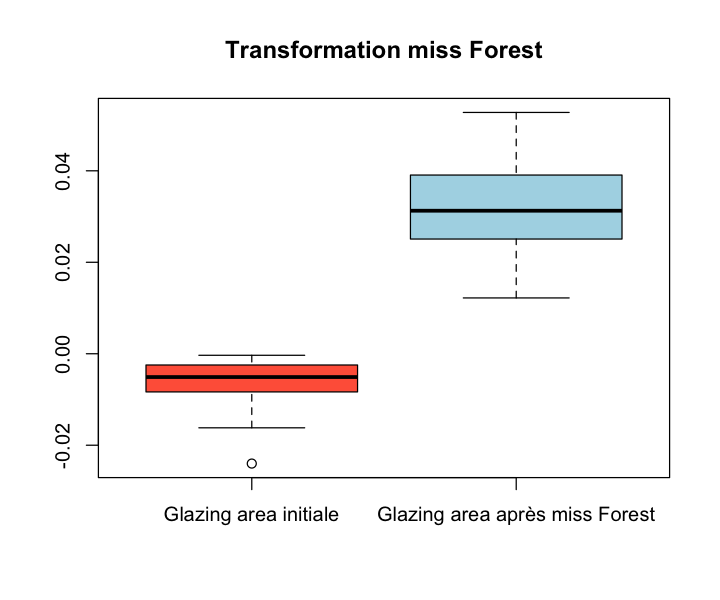

In [9]:
a <- which(is.na(xcop$Glazing.area))
boxplot(x$Glazing.area[a], Xna$ximp$Glazing.area[a], 
        main = "Transformation miss Forest", col=c('tomato1','lightblue'), 
        names=c('Glazing area initiale', 'Glazing area après miss Forest')) 
x<- Xna$ximp

#### Commentaires : 

Les valeurs initialement inférieures à 0 ont bien été réajustées par des valeurs supérieures à 0. Dans la suite de notre analyse, nous prendrons en considération uniquement ces nouvelles valeurs qui semblent plus cohérentes avec les valeurs attendues de la variable Gazing Area.

<br>

# B - Analyse des données

## 1) Statistiques descriptives univariées

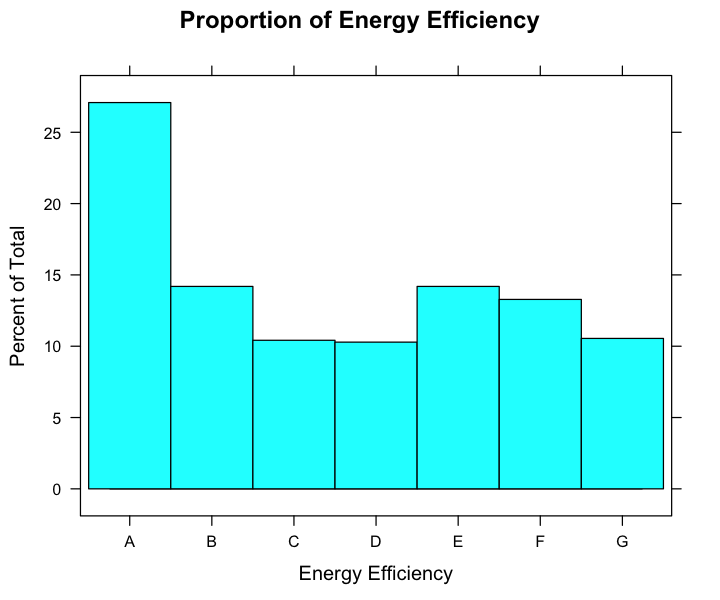

In [10]:
histogram(x$Energy.efficiency, freq=FALSE, xlab="Energy Efficiency", 
          main="Proportion of Energy Efficiency")

#### Commentaires :

La répartition des données par classe énergie est plutot uniforme. On observe cependant  que la classe A est majoritaire dans ce jeu de données.

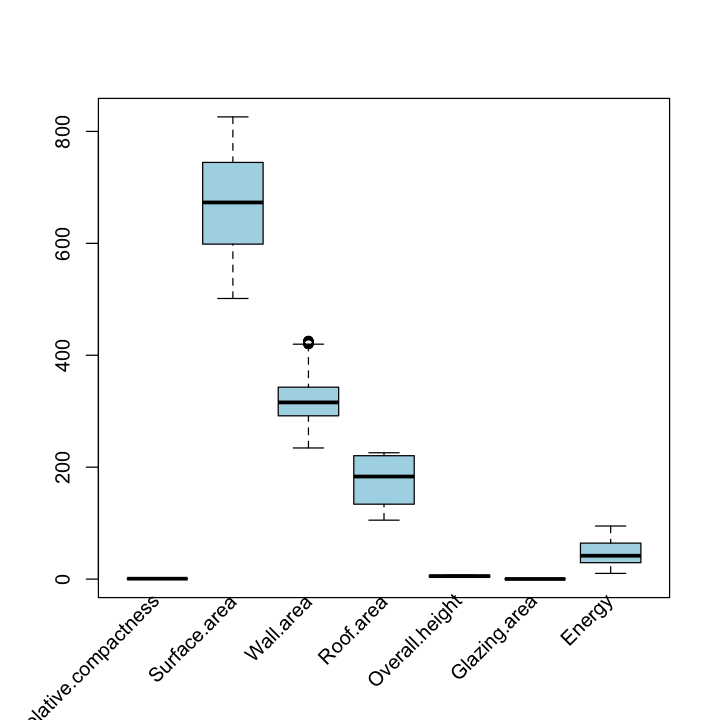

In [11]:
options(repr.plot.width = 6, repr.plot.height = 6) 
boxplot(x[,-c(6,8,10,11)], col='lightblue', xaxt = "n") #Add legend Add inclinaison
#Pas dans le même ordre de grandeur -> norm = True pendant ACP
text(seq_along(x[,-c(6,8,10,11)]), par("usr")[3] - 0.5, labels = names(x[,-c(6,8,10,11)]), srt = 45, adj = 1, xpd = TRUE);

#### Commentaires :

Les variables ne sont pas toutes de même ordre de grandeur mais les distributions semblent homogènes. Etant donné les ordres de grandeurs bien différents, une attention particulière sera accordée lors de la réalisation de l'ACP.

Il faut maintenant étudier plus précisemment la répartition des variables mal représentées sur le graphique.

DEMANDER AU PROF

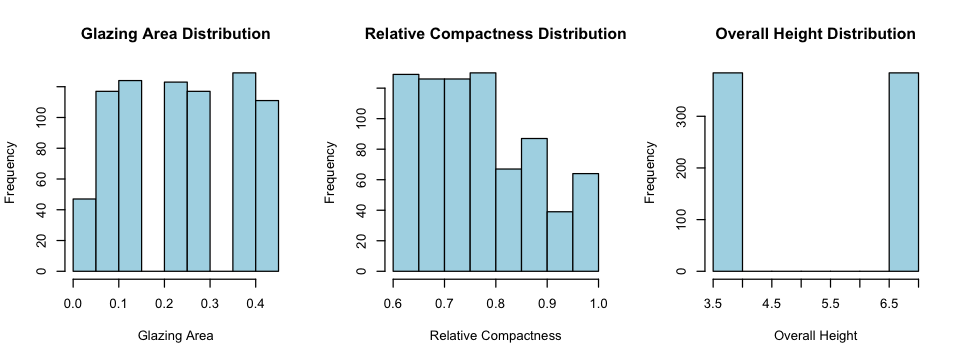

In [12]:
par(mfrow=c(1,3))
options(repr.plot.width = 8, repr.plot.height = 3) 

hist(x$Glazing.area, xlab='Glazing Area', main='Glazing Area Distribution',col='lightblue')
hist(x$Relative.compactness,,xlab= 'Relative Compactness' ,main = 'Relative Compactness Distribution',col='lightblue')
hist(x$Overall.height, xlab ='Overall Height',  main = 'Overall Height Distribution',col='lightblue')

#### Commentaires :

Au premier abord, il n'y a pas de transformation de variables nécessaires car les distributions sont "symétriques".

CF PROF

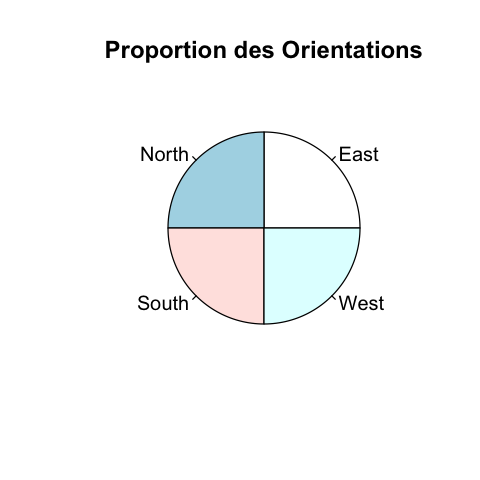

In [13]:
options(repr.plot.width = 4, repr.plot.height = 4) 
pie(table(x$orientation), main = "Proportion des Orientations")

#### Commentaires : 

La répartition des orientations des bâtiments est uniforme pour le jeu de données.

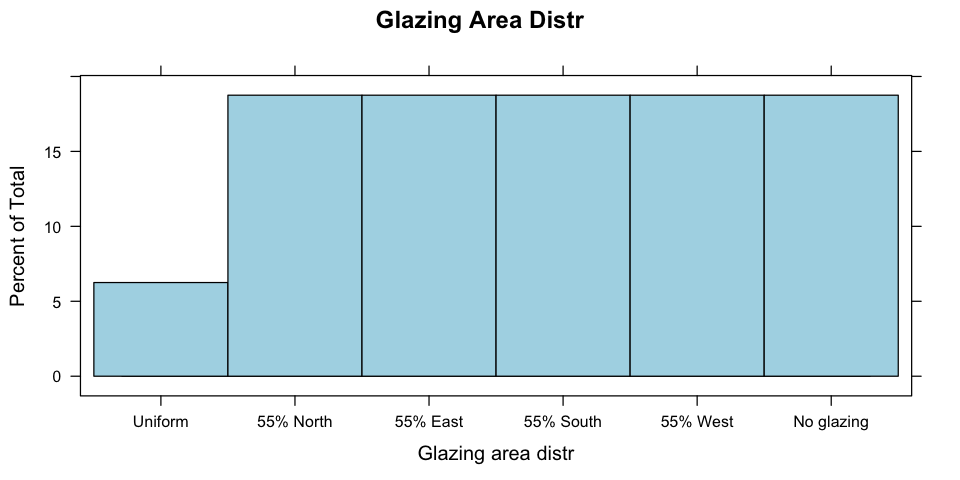

In [14]:
options(repr.plot.width = 8, repr.plot.height = 4) 
histogram(x$Glazing.area.distr,xlab= 'Glazing area distr' ,main = 'Glazing Area Distr',col='lightblue')

#### Commentaires : 

La répartition des orientations des vitrages est équitable entre les différentes classes (55% Nord, 55% Est, 55% Sud, 55% Ouest et sans vitrage). Cependant, l'orientation des vitrages de type "uniform" est minoritaire.

<br>

## 2) Statistiques descriptives multivariées

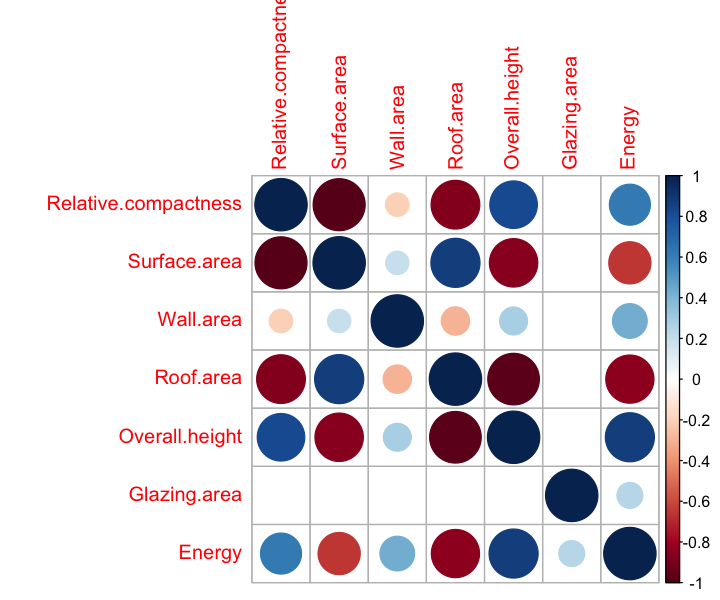

In [15]:
options(repr.plot.width = 6, repr.plot.height = 5) 
M <- cor(x[,-c(6,8,10,11)])
corrplot(M)

**Commentaire :**

Les variables sont globalement très corrélées entre elles. 

   * **Relative compactness** est très fortement correlé négativement avec Surface area (-0.98) et Roof Area (-0.87). Relative compactness est également correlé positivement avec Overall.height. Il doit exister un lien numérique entre ces variables que nous étudierons par la suite.

   * **Overall.height** est très corrélé avec Energy 
    
Il est difficile de tirer des conclusions avec le graphique des corrélations. Regardons la matrice de scatterplots.

*(%A confirmer Une hypothèse serait que les batiments ont la même forme, ainsi seule la surface influe sur cette propriété.*

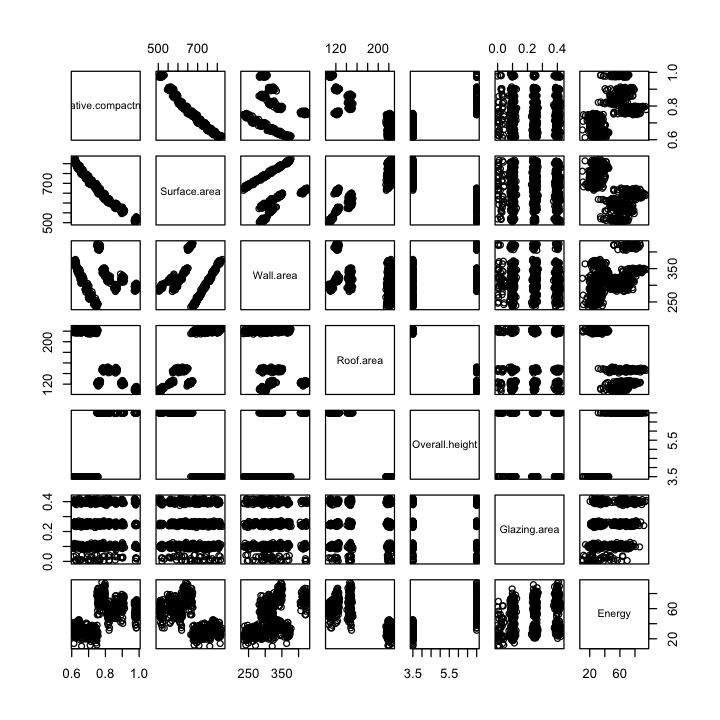

In [16]:
options(repr.plot.width = 6, repr.plot.height = 6)
pairs(x[,-c(6,8,10,11)])

On remarque une relation linéaire entre Relative.compactness et Surface.area

On voit que Glazing.area, qui est une variable quantitative, est finalement répartie selon 4 intervalles.

In [17]:
fig <- plot_ly(x, x = ~Roof.area, y = ~Wall.area, z = ~Surface.area, color = ~Energy.efficiency)
fig <- fig %>% add_markers()
fig <- fig %>% layout(scene = list(xaxis = list(title = 'Roof Area'),
                     yaxis = list(title = 'Wall Area'),
                     zaxis = list(title = 'Surface Area')))

fig

Warning message:
“`arrange_()` is deprecated as of dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

HTML widgets cannot be represented in plain text (need html)

In [18]:
## On vérifie la relation Surface.area = Wall.area + 2*Roof.area
a=x$Surface.area-(x$Wall.area+2*x$Roof.area)
cat("Nombre de valeurs pour lesquelles la relation 'Surface.area = Wall.area + 2*Roof.area' n'est pas vérifié : ", length(which(round(a,3)!=0)))

Nombre de valeurs pour lesquelles la relation 'Surface.area = Wall.area + 2*Roof.area' n'est pas vérifié :  0

La surface est calculée en sommant la surface des murs et en ajoutant deux fois la surface du toit.

La relation étant vérifiée pour tous les points de notre jeu de donnée, nous allons pouvoir supprimer une ou plusieurs variables étant donné que les informations sont redondantes.

Pour continuer l'analyse, on va donc supprimer la surface totale qui regroupe deux informations importantes.
On voit en effet sur le plot suivant que ce sont la surface de mur et la surface de toit qui contiennent des informations.

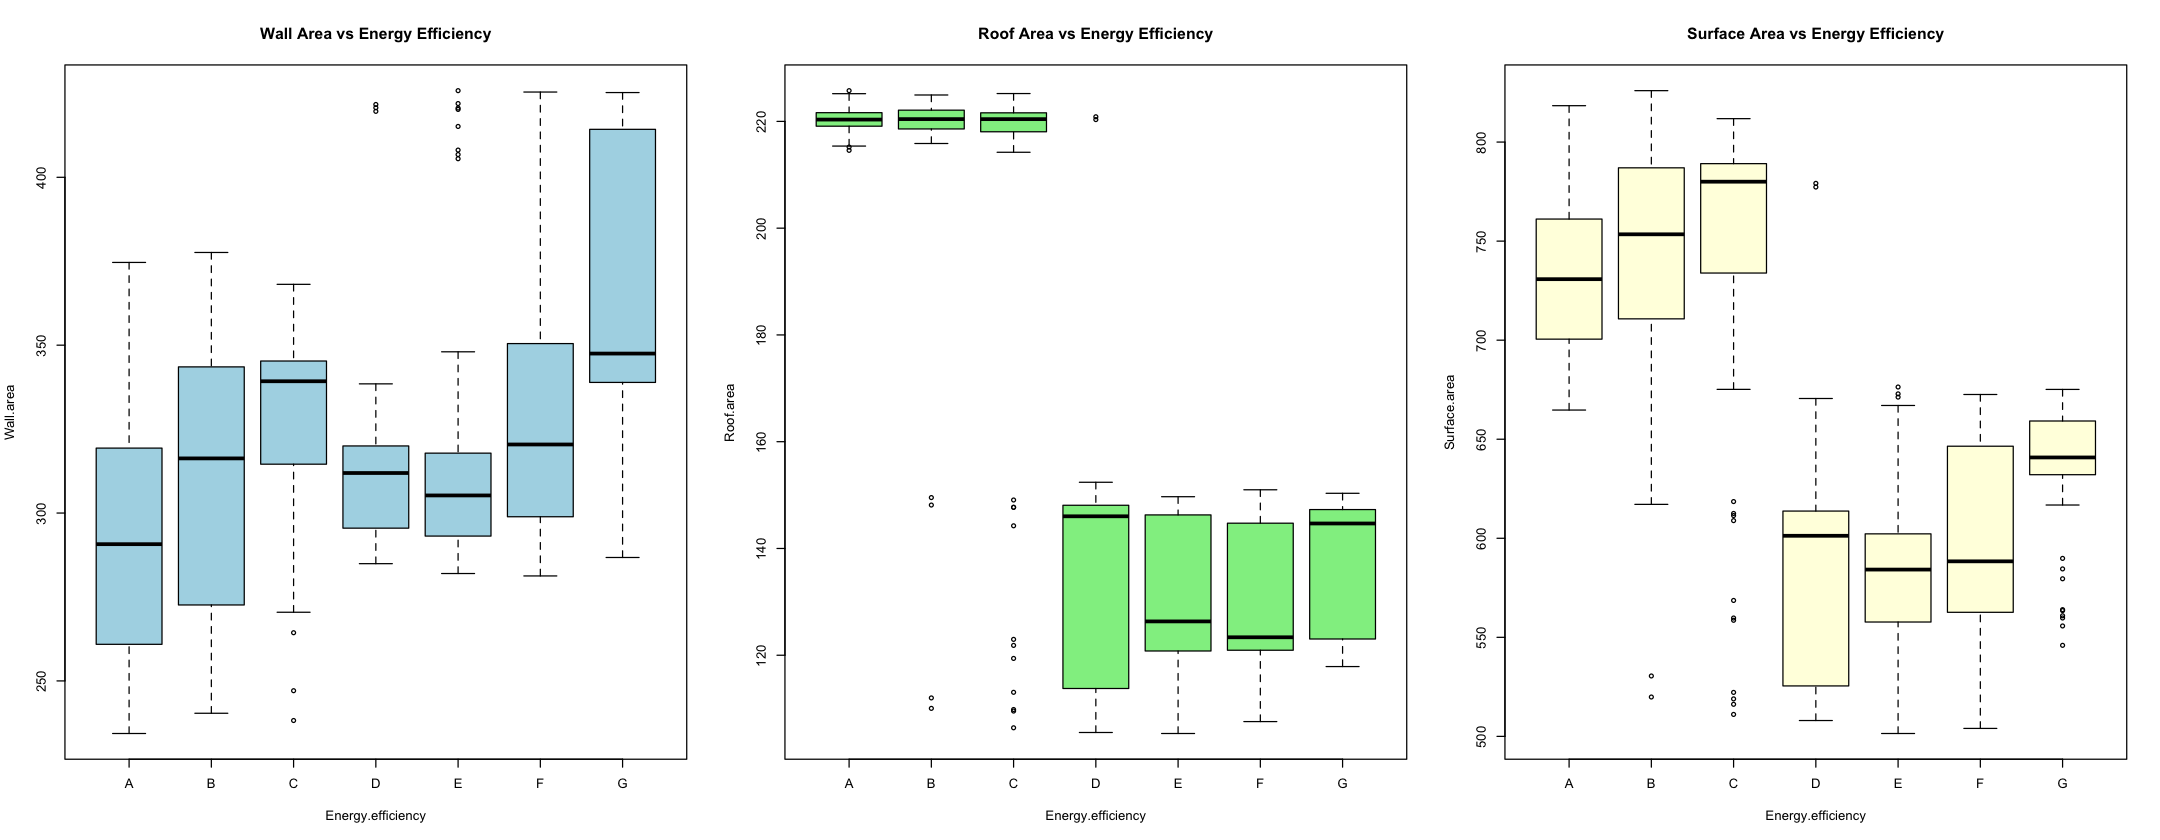

In [19]:
#En cours d'esai sera modifié prochaine séance
options(repr.plot.width = 18, repr.plot.height = 7) 

par(mfrow=c(1,3))
boxplot(Wall.area ~Energy.efficiency, data=x, col='lightblue', main="Wall Area vs Energy Efficiency")
boxplot(Roof.area ~Energy.efficiency, data=x, col='lightgreen', main="Roof Area vs Energy Efficiency")
boxplot(Surface.area ~Energy.efficiency, data=x, col='lightyellow', main="Surface Area vs Energy Efficiency")


On remarque sur ces graphiques que les classes A, B et C ont une surface de toît élevée. De la même façon, ces classes ont une surface totale élevée.

La tendance est inversée pour les classes D, E, F et G.

**On retire donc la variable Surface Area.**

In [20]:
head(x)

Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.8909102            558.6037     314.9162  121.8437  7             
  orientation Glazing.area Glazing.area.distr Energy   Energy.efficiency
1 North       1.609490e-02 Uniform            34.26394 B                
2 East        2.294522e-02 Uniform            34.58975 B                
3 South       2.414785e-02 Uniform            38.77805 C                
4 West        9.554434e-06 Uniform            37.94781 C                
5 North       2.912889e-02 Uniform            47.67586 D                
6 East        2.601517e-02 Uniform            41.90847 C

In [21]:
x <- dplyr::select(x,-Surface.area)
head(x)

Relative.compactness Wall.area Roof.area Overall.height orientation
1 0.9829276            306.4846  112.0027  7              North      
2 0.9835473            299.7763  110.0480  7              East       
3 0.9794535            303.3744  106.4084  7              South      
4 0.9777325            292.8122  113.0559  7              West       
5 0.9030294            316.2361  118.3664  7              North      
6 0.8909102            314.9162  121.8437  7              East       
  Glazing.area Glazing.area.distr Energy   Energy.efficiency
1 1.609490e-02 Uniform            34.26394 B                
2 2.294522e-02 Uniform            34.58975 B                
3 2.414785e-02 Uniform            38.77805 C                
4 9.554434e-06 Uniform            37.94781 C                
5 2.912889e-02 Uniform            47.67586 D                
6 2.601517e-02 Uniform            41.90847 C

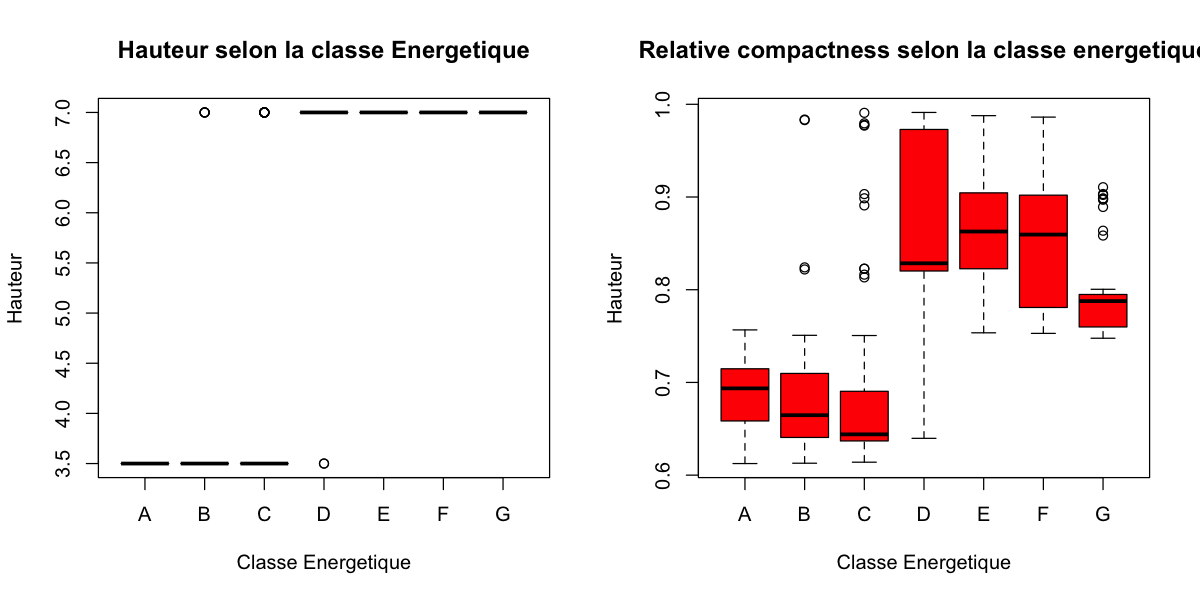

In [22]:
options(repr.plot.width = 10, repr.plot.height = 5) 

par(mfrow=c(1,2))
boxplot(x$Overall.height~ x$Energy.efficiency, main ="Hauteur selon la classe Energetique", xlab="Classe Energetique", ylab="Hauteur",col='red')
boxplot(x$Relative.compactness~ x$Energy.efficiency, main ="Relative compactness selon la classe energetique", xlab="Classe Energetique", ylab="Hauteur",col='red')


On remarque sur le graphique de gauche que les classes A, B et C ont majoritairement une hauteur de 3m50 tandis que les classes D, E, F et G ont principalement une hauteur plus élevé (7m).

De la même façon, on remarque que la Relative Compactness est plus faible pour les bonnes classes énergetiques par rapport aux moins bonnes.

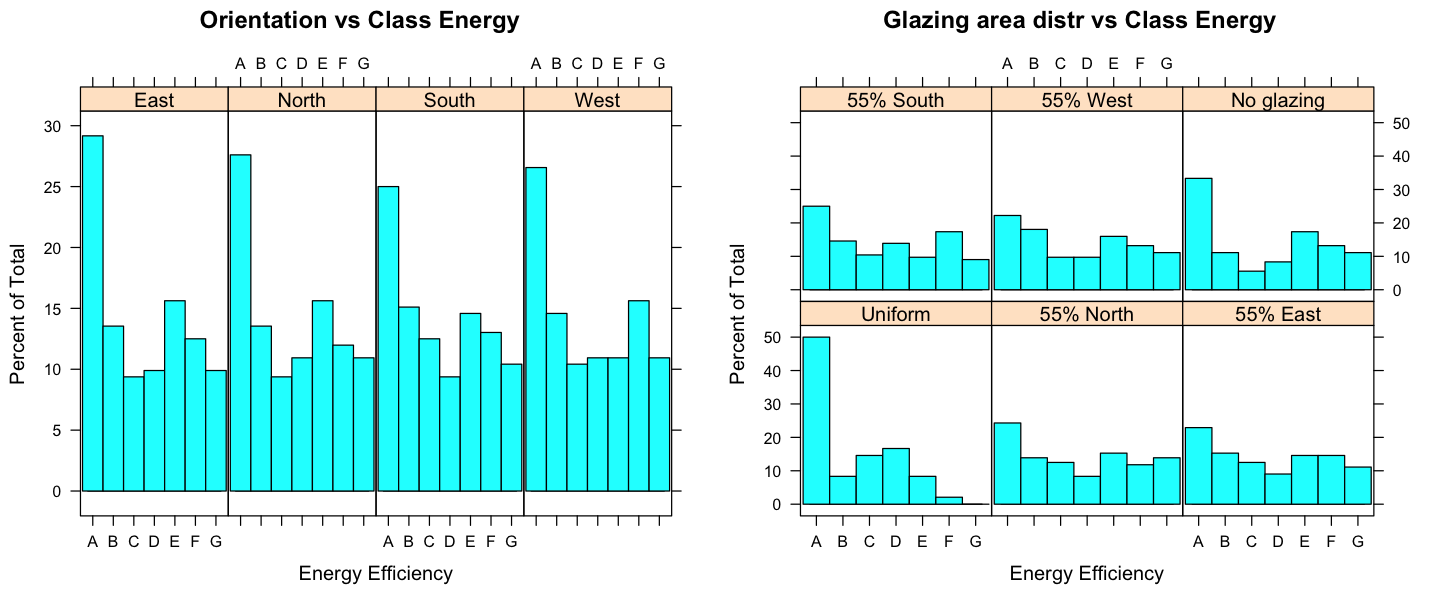

In [23]:
options(repr.plot.width = 12, repr.plot.height = 5) 
h1 = histogram(~Energy.efficiency | orientation , data=x, xlab= "Energy Efficiency",main="Orientation vs Class Energy",)
h2 = histogram(~Energy.efficiency | Glazing.area.distr, data=x,main="Glazing area distr vs Class Energy", xlab= "Energy Efficiency")
grid.arrange(h1, h2, nrow=1, ncol=2)
#histogram(~orientation | Energy.efficiency , data=x, xlab= "Energy Efficiency",main="Orientation vs Class Energy",)
#mosaicplot(table2, main="Glazing area distr vs Class Energy")

Les classes d'énergie sont uniformement réparties selon l'orientation du bâtiment et selon l'orientation des vitrages. L'orientation des bâtiments n'influe donc probablement pas l'appartenance à une certaine classe d'énergie.

En revanche, lorsqu'il y a pas de vitrage ou lorsque l'orientation des vitrages est uniforme, la classe A est majoritaire. (Logique, un batiment sans vitrage est mieux isolé)

## 3) Principal Component Analysis :

On enlève la variable Energy car c'est celle qu'on veut prédire.
On garde seulement les variables quantitatives.


**Remarque :** Les variables n'étant pas dans les mêmes unités, nous faisons une ACP réduite.

In [24]:
head(x)

Relative.compactness Wall.area Roof.area Overall.height orientation
1 0.9829276            306.4846  112.0027  7              North      
2 0.9835473            299.7763  110.0480  7              East       
3 0.9794535            303.3744  106.4084  7              South      
4 0.9777325            292.8122  113.0559  7              West       
5 0.9030294            316.2361  118.3664  7              North      
6 0.8909102            314.9162  121.8437  7              East       
  Glazing.area Glazing.area.distr Energy   Energy.efficiency
1 1.609490e-02 Uniform            34.26394 B                
2 2.294522e-02 Uniform            34.58975 B                
3 2.414785e-02 Uniform            38.77805 C                
4 9.554434e-06 Uniform            37.94781 C                
5 2.912889e-02 Uniform            47.67586 D                
6 2.601517e-02 Uniform            41.90847 C

In [25]:
X_acp <- dplyr::select(x,c(Relative.compactness, Roof.area, Wall.area,Overall.height, Glazing.area,Energy.efficiency))
head(X_acp)

Relative.compactness Roof.area Wall.area Overall.height Glazing.area
1 0.9829276            112.0027  306.4846  7              1.609490e-02
2 0.9835473            110.0480  299.7763  7              2.294522e-02
3 0.9794535            106.4084  303.3744  7              2.414785e-02
4 0.9777325            113.0559  292.8122  7              9.554434e-06
5 0.9030294            118.3664  316.2361  7              2.912889e-02
6 0.8909102            121.8437  314.9162  7              2.601517e-02
  Energy.efficiency
1 B                
2 B                
3 C                
4 C                
5 D                
6 C

In [26]:
res.pca <- PCA(X_acp, scale.unit=TRUE, quali.sup=6, graph = FALSE)

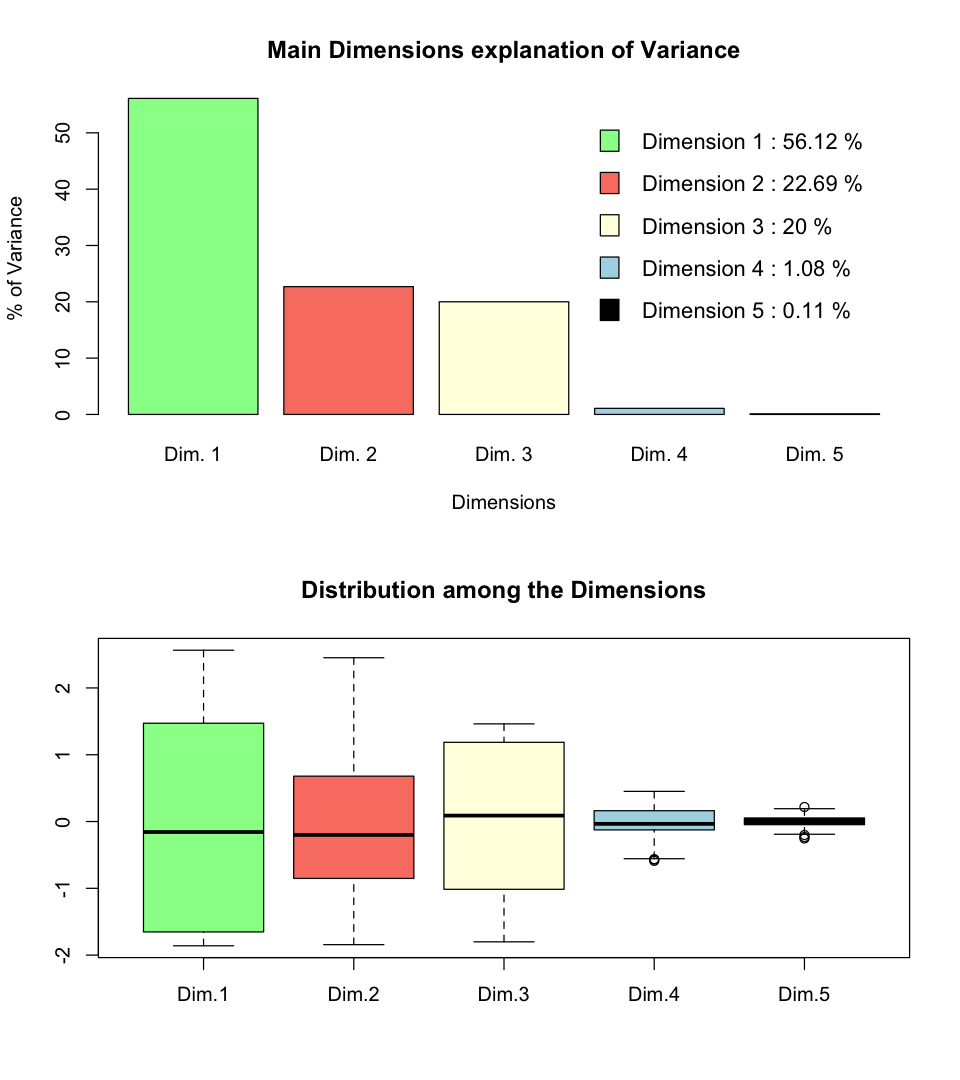

In [27]:
#fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50), new.plot=FALSE, graph.type="classic")
lbls = paste("Dimension",1:5, ":", round(res.pca$eig[,2],2), "%" )
coul = c('palegreen','salmon','lightyellow','lightblue','black')
options(repr.plot.width = 8, repr.plot.height = 9) 
par(mfrow=c(2,1))
barplot(res.pca$eig[,2],names.arg=paste("Dim.",1:nrow(res.pca$eig)), xlab="Dimensions", ylab = "% of Variance", col = coul,main="Main Dimensions explanation of Variance")
legend(x='topright',legend=lbls, fill= coul, bty='n', cex=1.1, text.font=0.5)
boxplot(res.pca$ind$coord, outlier=TRUE, col=coul, main = "Distribution among the Dimensions")

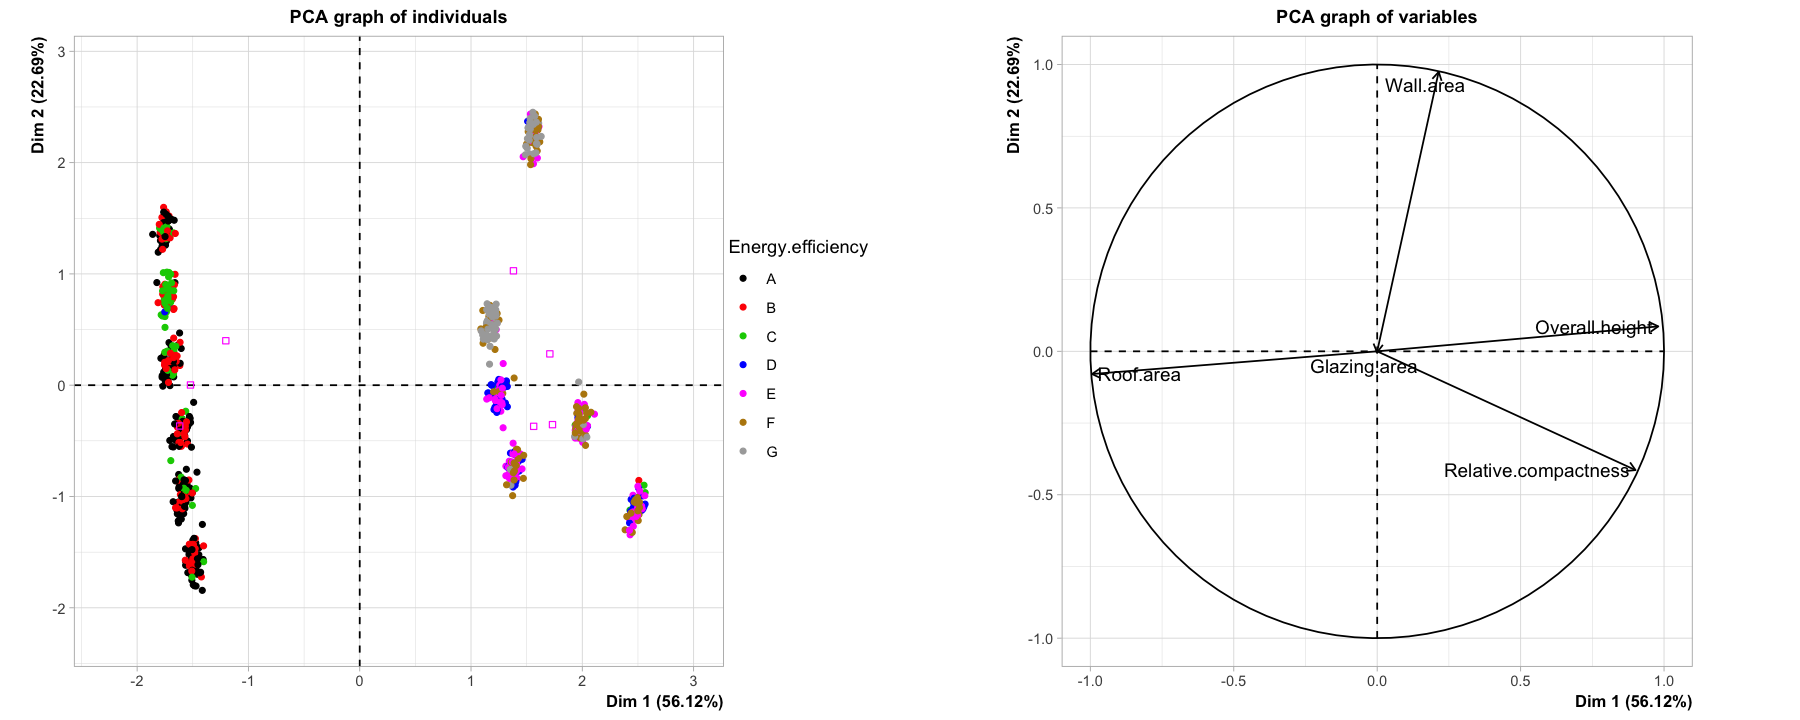

In [28]:
options(repr.plot.width = 15, repr.plot.height = 6) 
plot1 <- plot(res.pca,choix="ind", label="none", new.plot=FALSE, graph.type="ggplot",habillage=6)
plot2 <- plot(res.pca,choix="var", new.plot=FALSE, graph.type="ggplot")
grid.arrange(plot1, plot2, nrow=1, ncol=2)

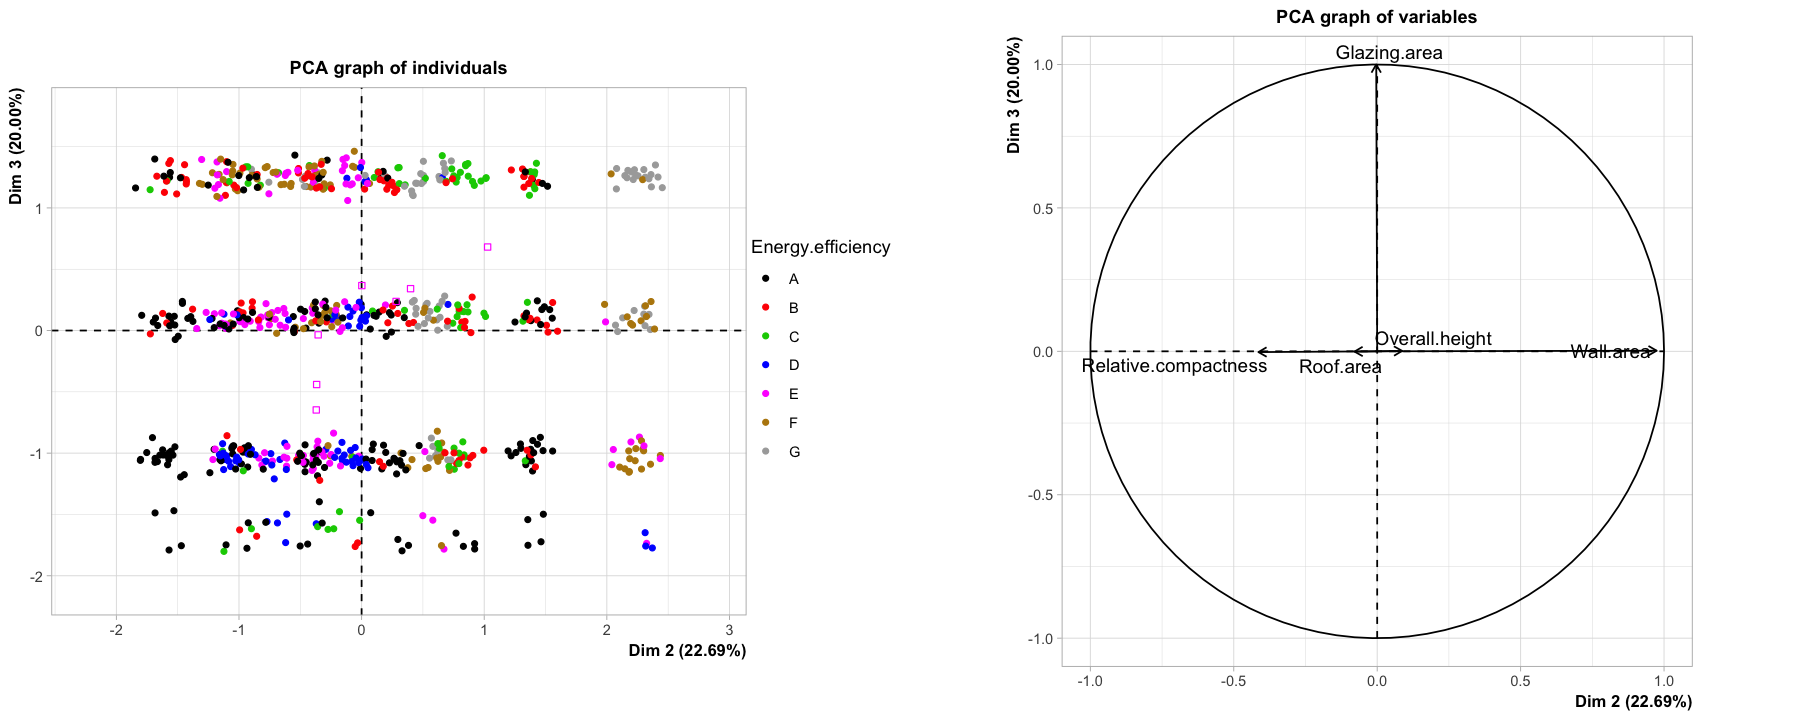

In [29]:
options(repr.plot.width = 15, repr.plot.height = 6) 
plot3 <- plot(res.pca,axes=c(2,3),choix="ind", label="none", new.plot=FALSE, graph.type="ggplot",habillage=6)
plot4 <- plot(res.pca,axes=c(2,3),choix="var", new.plot=FALSE, graph.type="ggplot")
grid.arrange(plot3, plot4, nrow=1, ncol=2)

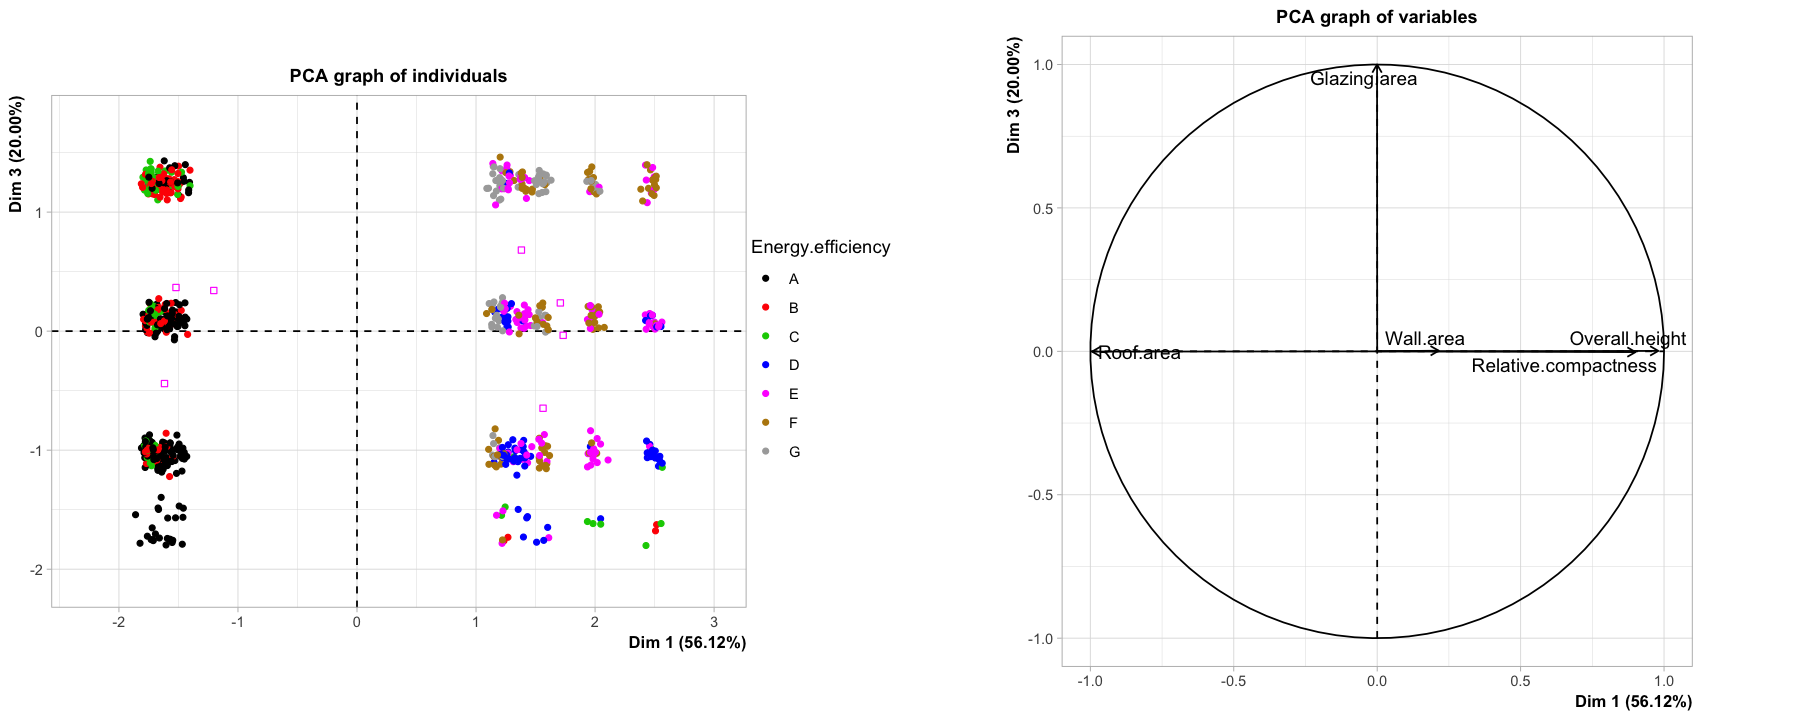

In [30]:
options(repr.plot.width = 15, repr.plot.height = 6) 
plot5 <- plot(res.pca, axes=c(1,3), choix="ind", label="none", new.plot=FALSE, graph.type="ggplot",habillage=6)
plot6 <- plot(res.pca, axes=c(1,3),choix="var", new.plot=FALSE, graph.type="ggplot")
grid.arrange(plot5, plot6, nrow=1, ncol=2)

**Interprétation** :

On observe des clusters dans les graphes des individus qui ne reflètent pas exactement les classes. Cependant On peut séparer les "bonnes classes" (A, B et C) des moins bonnes classes (D,E,F et G) par la première composante principale. En effet, les "bonnes classes" semblent se distinguer des "mauvaises classes" par une grande surface de toît, mais par une faible hauteur de batiment et faible Relative Compactness. 

La dimension 2 est principalement porté par la surface des murs. On ne distingue pas les différentes classes grâce à cette composante (et donc à cette variable).

La dimension 3 est principalement porté par la Glazing Area. Tout comme pour la dimension 2, on ne distingue pas les différentes classes.

Les conclusions de l'ACP correspondent aux caractéristiques montrées précedemment.

## 4) Clustering 

In [31]:
### k-means avec 7 clusters
x_num=dplyr::select(x, Relative.compactness, Wall.area,Roof.area,Overall.height, Glazing.area)
x_num_cr=scale(x_num)

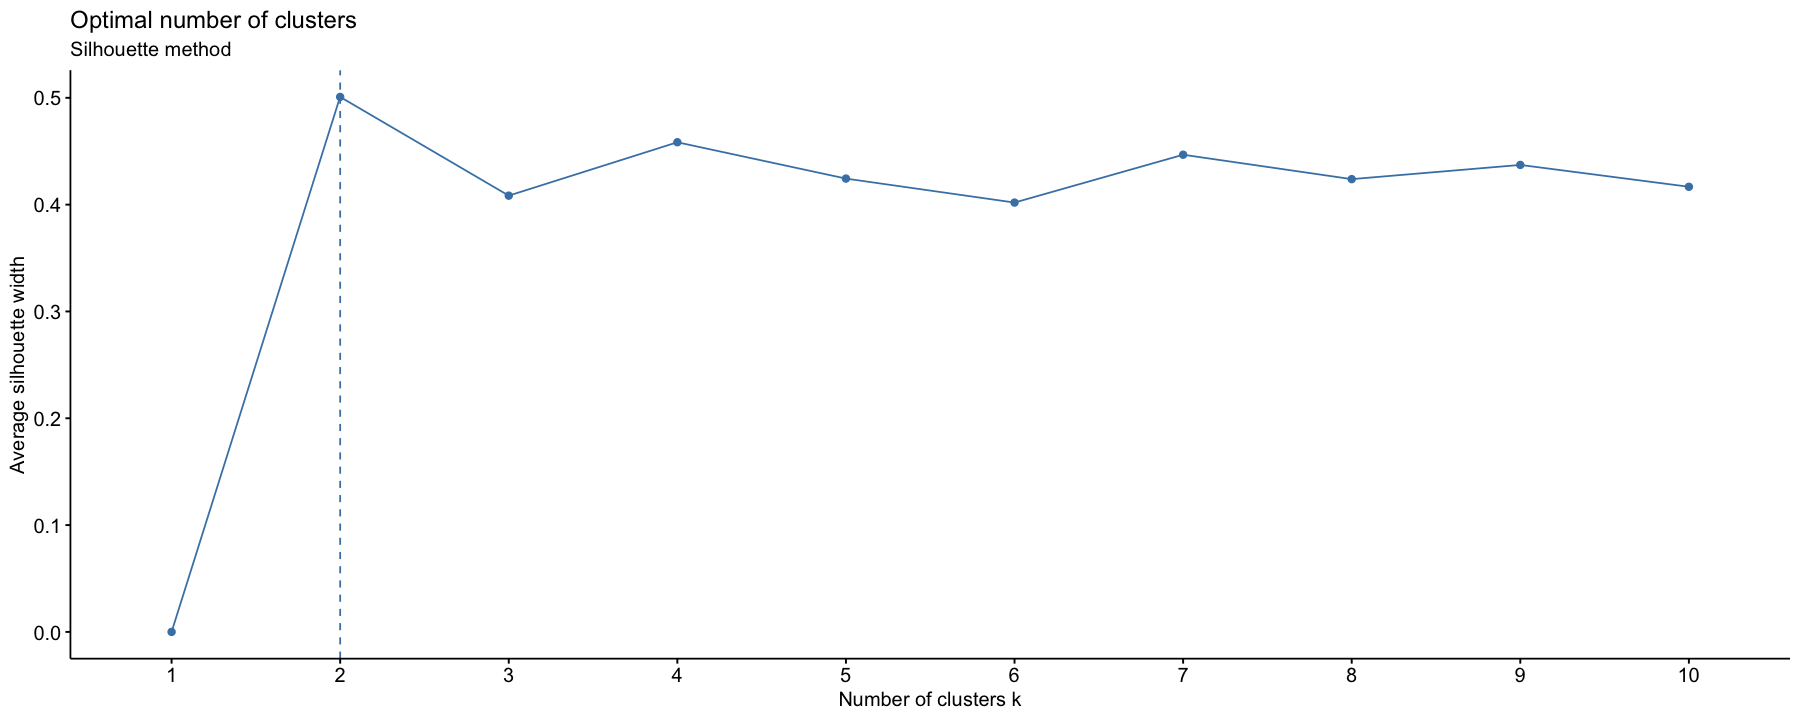

In [32]:
## Recherche du k optimum
# Silhouette method
fviz_nbclust(x_num_cr, kmeans, method = "silhouette")+
labs(subtitle = "Silhouette method")

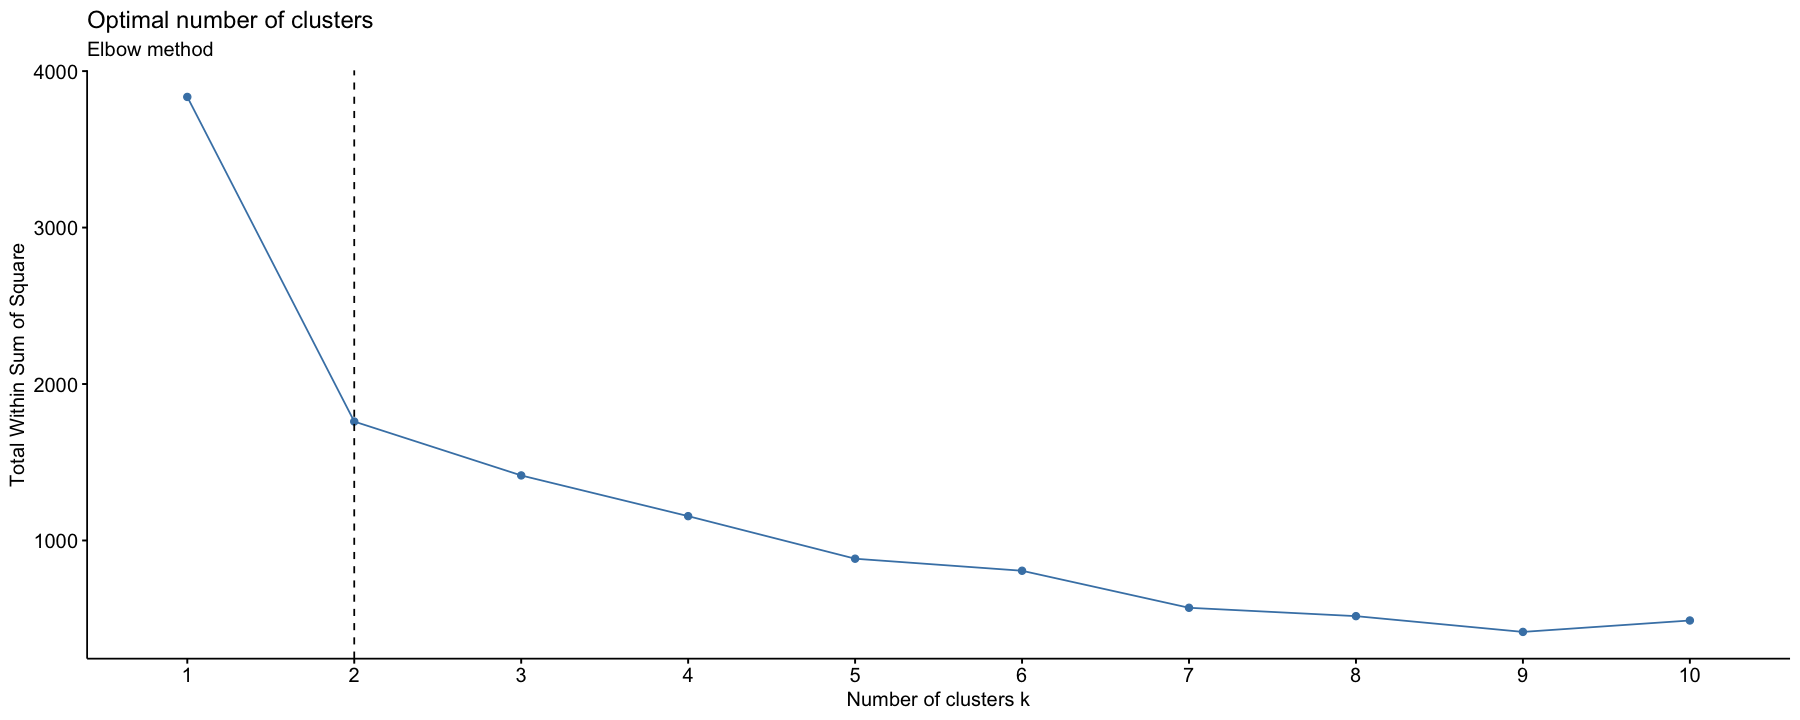

In [33]:
# Elbow method
fviz_nbclust(x_num_cr, kmeans, method = "wss") +
    geom_vline(xintercept = 2, linetype = 2)+
  labs(subtitle = "Elbow method")

Ces deux méthodes nous suggèrent 2 clusters, or on aimerait qu'il y en ai 7 (correspondant aux 7 classes énergétiques)

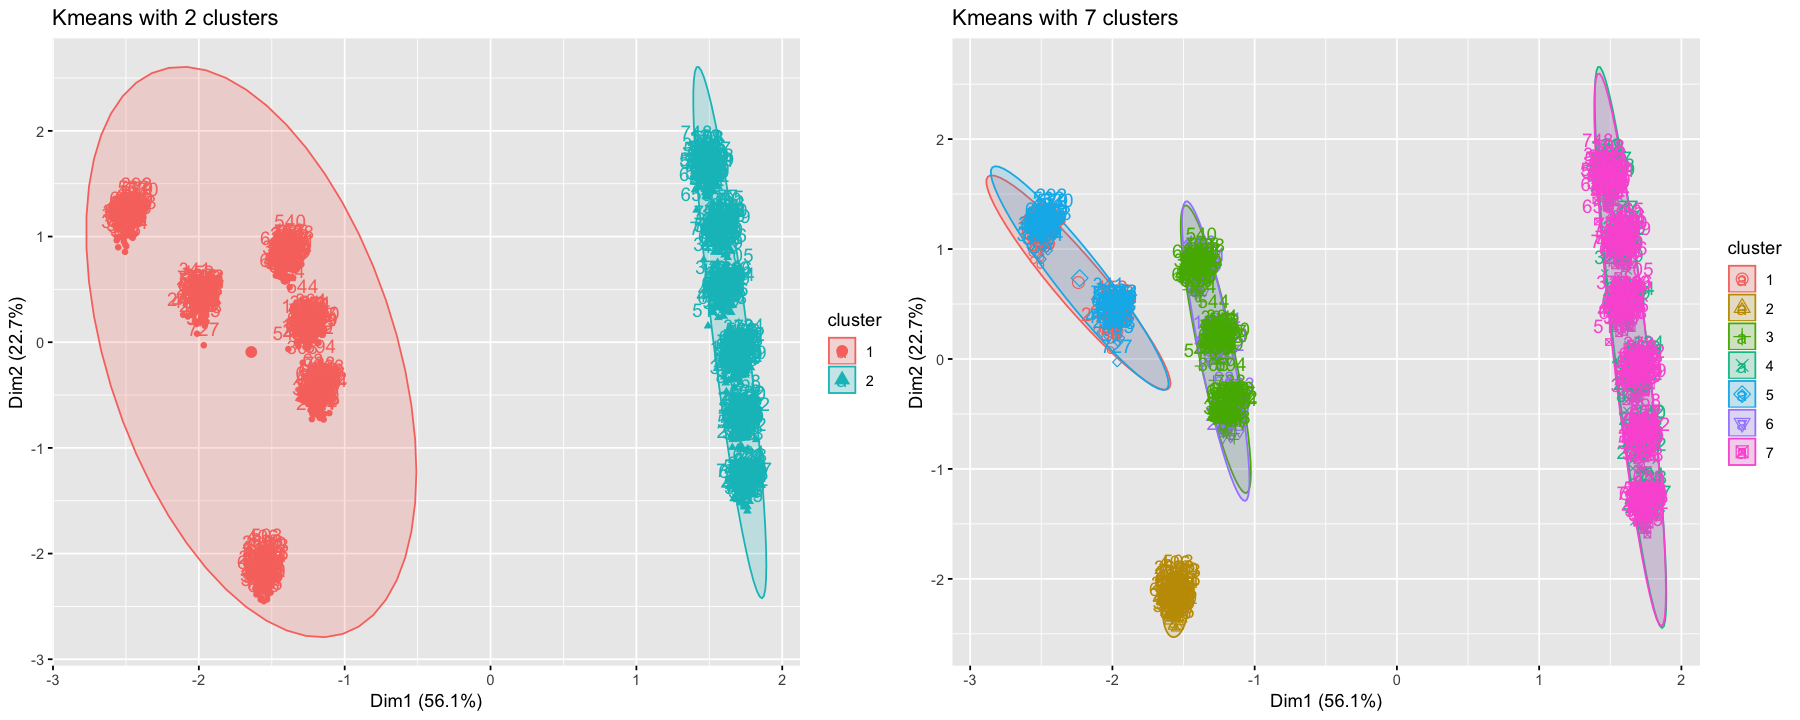

In [34]:
km.out2 = kmeans(x_num_cr,centers=2)
km.out7 = kmeans(x_num_cr,centers=7)
plot.kmean2<-fviz_cluster(km.out2, x_num_cr, ellipse.type = "norm", main='Kmeans with 2 clusters')
plot.kmean7<-fviz_cluster(km.out7, x_num_cr, ellipse.type = "norm", main='Kmeans with 7 clusters')
grid.arrange(plot.kmean2, plot.kmean7, nrow=1, ncol=2)

In [35]:
cat('Table de contingence avec 2 clusters :')

print(table(km.out2$cluster,x$Energy.efficiency))

cat(' \n\n ')
cat('Table de contingence avec 7 clusters :')
print(table(km.out7$cluster,x$Energy.efficiency))

Table de contingence avec 2 clusters :   
      A   B   C   D   E   F   G
  1   0   4  11  77 109 102  81
  2 208 105  69   2   0   0   0
 

 Table de contingence avec 7 clusters :   
      A   B   C   D   E   F   G
  1   0   2   7  18  18   3   0
  2   0   0   0   3   8  25  28
  3   0   0   0  19  40  22  39
  4 114  19  11   0   0   0   0
  5   0   0   0   5  29  39   7
  6   0   2   4  32  14  13   7
  7  94  86  58   2   0   0   0


kmeans ne semble pas adapté à notre problème. Cependant, cet algorithme suggère de regrouper les classes A,B et C ensemble ainsi que D,E,F,G (bonne consommation et mauvaise consommation).

**Pour la suite, il va donc sembler intéressant de faire un premier algorithme réalisant une regresion logistique binaire : Bonne consommation Energétique (A,B,C) vs Mauvaise Consommation Energétique (D,E,F,G) puis, sur ces nouveaux sous-datasets prédits, de mettre en place un modèle de prédiction plus fin.**

# C- Séparation des données :

On sépare les données en un ensemble d'apprentissage (train) et un ensemble test. Le modèle est entrainé sur l'échantillon train et il est évalué sur l'échantillon test.

Cette étape est nécessaire pour permettre d'évaluer le modèle déterminé avec les échantillons d'entrainement. En effet, on peut par exemple détecter un overfitting grâce à l'échantillon test (un très bon score avec l'échantillon d'entrainement ne signifie pas toujours que c'est un très bon modèle).

In [125]:
## 75% of the sample size
train_ratio=0.75
smp_size <- floor(train_ratio * nrow(x))

## set the seed to make your partition reproducible
set.seed(2512)
train_ind <- sample(seq_len(nrow(x)), size = smp_size)

train <- x[train_ind, ]
test <- x[-train_ind, ]

In [129]:
nrow(train)
nrow(test)

[1] 576

[1] 192

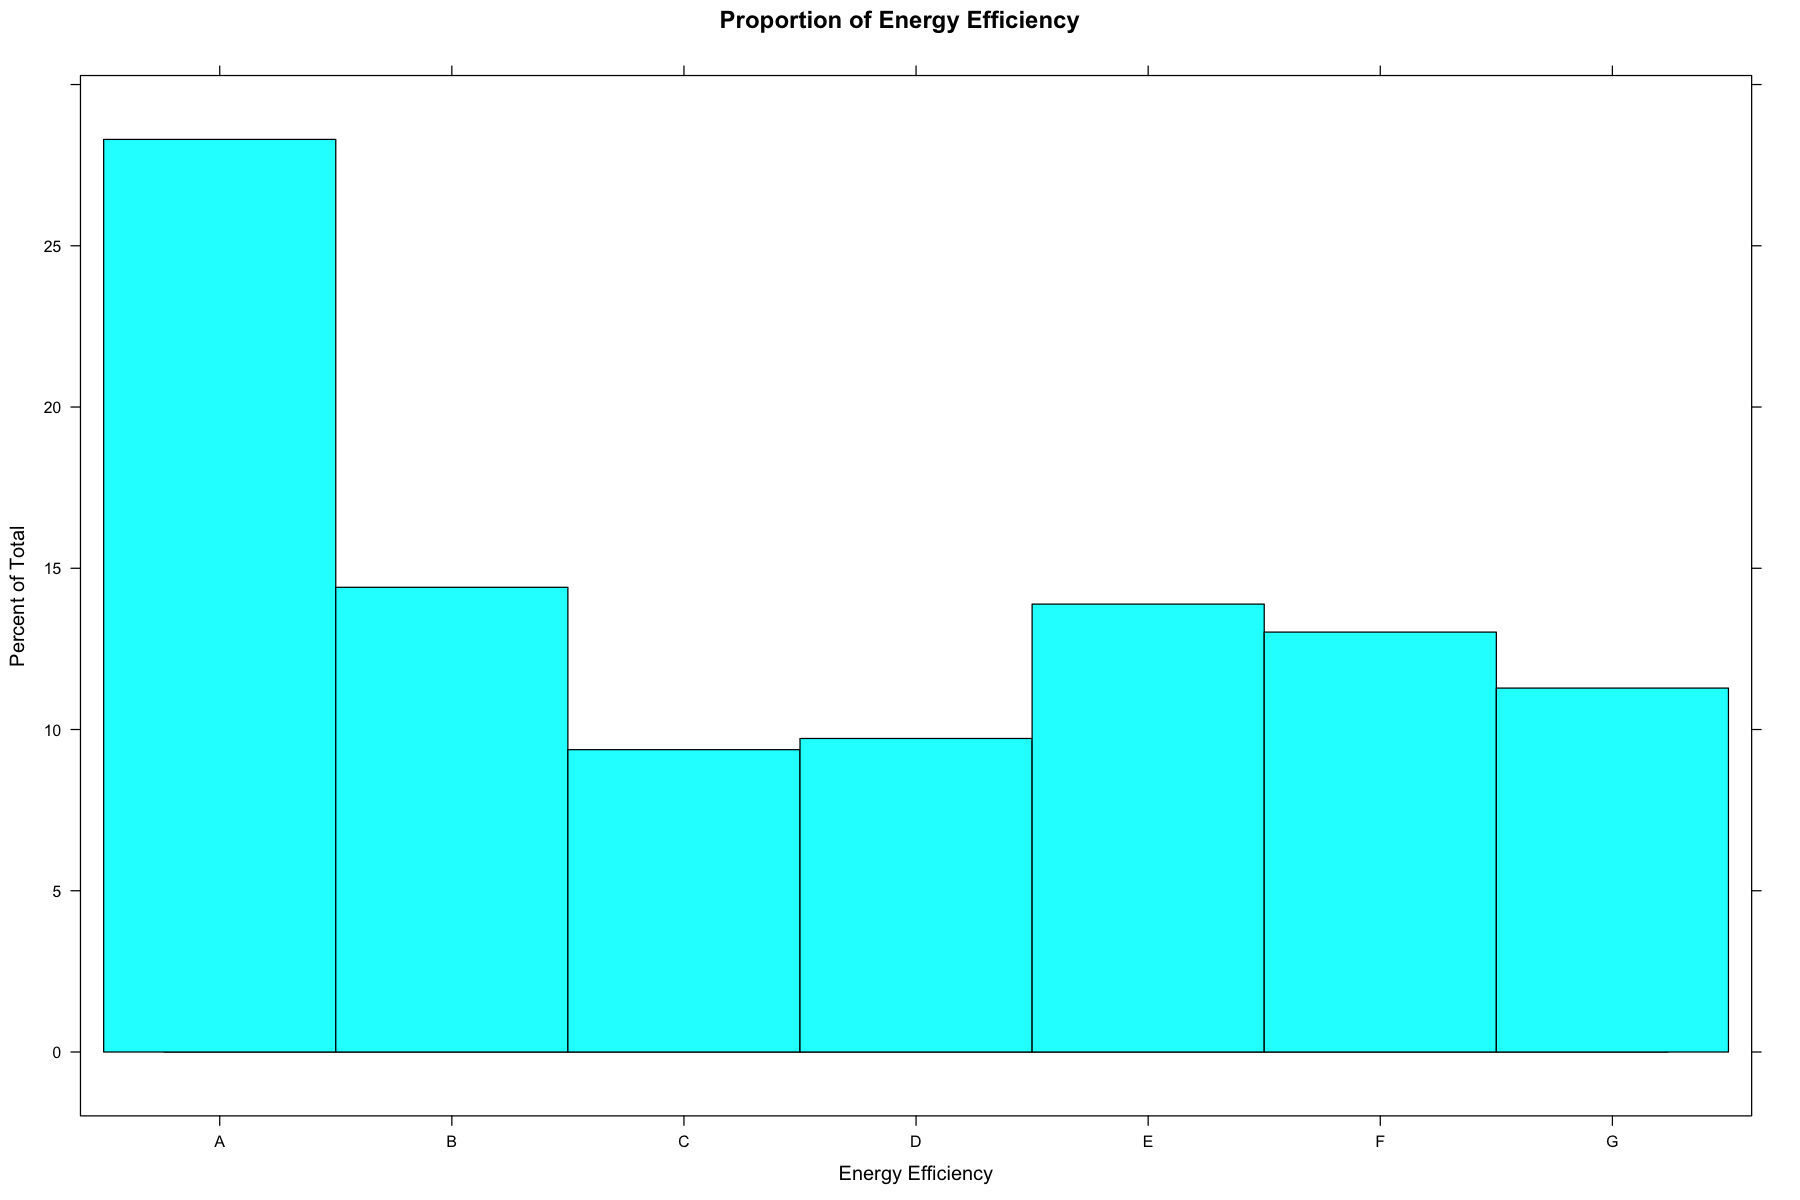

In [130]:
histogram(train$Energy.efficiency, freq=FALSE, xlab="Energy Efficiency", 
          main="Proportion of Energy Efficiency")

# D - Modélisation


**Note pour nous sur la normalisation des noms des modèles :**

c = classification : nom_model.c

r = regression : nom_model.r

Si objet pred=predict() : nom_model.c.pred

## Evaluation

**Pour évaluer les performances d'un modèle de classification, il faut définir des mesures traduisant son efficacité:**

In [37]:
#Première mesure intuitive : Quotient entre les biens prédits le nombre total de prédictions :
perf_model <- function(table_contingence){
    return( sum(diag(table_contingence))/sum(table_contingence))
}

Le défaut de cette première métrique est qu'elle ne prend pas en compte l'écart de classe quand on se trompe. En effet, imaginons que la vraie valeur soit la classe A ; l'erreur est bien plus grave si on prédit une consommation de type G que si l'on prédit une consommation de type B.

L'idée est alors de mettre en place une métrique prenant en compte cet écart de classe dans la prédiction.

In [38]:
perf_model_clever <- function(table){
    L = nrow(table)
    #Creation de la matrice de poids:
    W = table #initialisation pour avoir la meme shape
    
    for (ligne in 1:L){
        #remplissage de la lower triangular partie
        for (col in 1:ligne){
           W[ligne, col]=ligne-col
        }
        #remplissage de la upper triangular partie
        for (col in ligne:L){
            W[ligne,col] = col-ligne
        }
    }
    
    #on a maintenant notre matrice de poids, on l'applique à nos résultats : 
    table_erreur_ponder <- table*W #contient des 0 sur la diagonale pour ne tenir compte que des erreurs
    taux_erreur = sum(table_erreur_ponder)/(sum(W))
    score_perf = 1- taux_erreur
    return(score_perf)
}

In [39]:
perf_model_clever <- function(table){
    L = nrow(table)
    #Creation de la matrice de poids:
    W = table #initialisation pour avoir la meme shape
    
    for (ligne in 1:L){
        #remplissage de la lower triangular partie
        for (col in 1:ligne){
           W[ligne, col]=ligne-col
        }
        #remplissage de la upper triangular partie
        for (col in ligne:L){
            W[ligne,col] = col-ligne
        }
    }
    
    #on a maintenant notre matrice de poids, on l'applique à nos résultats : 
    table_erreur_ponder <- table*W #contient des 0 sur la diagonale pour ne tenir compte que des erreurs
    taux_erreur = sum(table_erreur_ponder)/(sum(W))
    score_perf = 1- taux_erreur
    return(score_perf)
}

In [40]:
#Definition des tableaux de score :
Tab_score_class = as.data.frame(setNames(replicate(3,numeric(0), simplify = F),c("Modele","Score1","Score2 ") ))
Tab_score_reg = as.data.frame(setNames(replicate(4,numeric(0), simplify = F),c("Modele","Score1","Score2", "RMSE") ))

#Function to automatically compute and display errors from a model prediction : 

#pred est la liste des prédictions sur le jeu de test
#quali est le type de la prediction

Compute_Error <- function(pred,quali=TRUE, name_model=""){ 
    
    if (quali){
        table_result = table(pred.reg = pred , observations = test$Energy.efficiency)
        cat("Table de contingence de", name_model, ": \n")
        print(table_result)
        score1 = perf_model(table_result)
        score2 = perf_model_clever(table_result)
        to_add <- data.frame(Modele=name_model, Score1=score1,Score2=score2) #on cree une df avec les mêmes noms de colonnes
        Tab_score_class = rbind(Tab_score_class,to_add) # on concatène ensuite
        return(Tab_score_class)
    }
    else{
        pred_class <- classify(pred)   
        table_result = table(pred.reg = pred_class , observations = test$Energy.efficiency)
        cat("Table de contingende de", name_model, ": \n")
        print(table_result)
        score1 = perf_model(table_result)
        score2 = perf_model_clever(table_result)
        rmse = sqrt( sum( (pred - test$Energy)^2 ) /nrow(test) )
        to_add <- data.frame(Modele=name_model, Score1=score1,Score2=score2, RMSE=rmse) #on cree une df avec les mêmes noms de colonnes
        Tab_score_reg = rbind(Tab_score_reg,to_add) # on concatène ensuite
        return(Tab_score_reg)        
        
    }
    
    
}

Now we consider the prediction problem with a machine learning point of view, i.e. by focusing on the model performance. What best performance can we expect? Below some guiding questions.

1. First of all, split the data into a training set and a test set. Why is this step necessary when we focus on performance? --> FAIT 

2. Here, we consider the classification problem directly. Compare the performance of a :
    * linear model (logistic regression) with penalization
    * linear model (logistic regression) without penalization FAIT
    * an optimal tree FAIT
    * random forest FAIT
    * boosting FAIT 
    * SVM FAIT 

    
Justify your choice (e.g. kernel for SVM), and tune carefully the parameters. Interpret the results and quantify the improvement brought by non-linear models.

3. Now, we first consider the regression problem and then classify using the given thresholds. Same question as before : (cf partie Regresion pour voir avancemetn)

Justify your choice (e.g. kernel for SVM), and tune carefully the parameters. Interpret the results and quantify the improvement brought by non-linear models.

4. What approach is the best to predict energy classes: direct classification or regression+thresholding?

5. Interpretation and come-back to data analysis. Are your results consistent with the preliminary data analysis, e.g. about non-linearities, influence of variables (or variable importance)?

## 1) Premier point de vue :  Classification

In this part we focus only on the classification problem, which is to predict in which energy Efficiency class an individual will be. Therefore, we remove the Variable Energy in this part.

In [41]:
train_class <- dplyr::select(train, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Energy.efficiency)
test_class <- dplyr::select(test, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Energy.efficiency)

In [42]:
x_train_class<-dplyr::select(train_class, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr)
y_train_class<-train_class$Energy.efficiency

x_test_class<-dplyr::select(test_class, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr)
y_test_class<-test_class$Energy.efficiency

### a) Régression Logistique Polythomiale : 

Nous allons réaliser une régression logistique polynomial ordonnée aussi appelée "polythomial regression".

Il y a deux moyens de le réaliser : additive logits and adjacents logits.

**Mise en place du modèle:**

In [43]:
#Additive Simple: 
vglm.c <- vglm(Energy.efficiency ~., data=train_class, family=cumulative(parallel=T, reverse=F))

**Résultats :**

In [44]:
p <- predict(vglm.c, newdata = test_class, type = "response") #matrice de proba d'appartenance à chaque classe
vglm.c.pred <- apply(p,1, which.max) 
Tab_score_class <-Compute_Error(vglm.c.pred,quali=TRUE,name_model = "Naive Logit");Tab_score_class

Table de contingence de Naive Logit : 
        observations
pred.reg  A  B  C  D  E  F  G
       1 38  9  5  0  0  0  0
       2  4 13  7  1  0  0  0
       3  3  3 12  1  0  0  0
       4  0  1  1  9  7  0  0
       5  0  0  1  8 14 10  1
       6  0  0  0  2  6 15  5
       7  0  0  0  2  2  2 10


Modele      Score1   Score2    
1 Naive Logit 0.578125 0.09821429

**Commentaire :** 

Le score de classification est relativement faible, cependant, les erreurs de classification sont majoritairement dans les classes voisines.

In [45]:
# A DEMANDER AU PROF SI ON UTILISE LES 2 METHODES 
#Adjacents simple: 
#m0_c <- vglm(Energy.efficiency ~., data=x_train_reg, family=acat(parallel=F, reverse=F))
#p <- predict(m0_c, newdata = x_test_reg, type = "response")
#prediction <- apply(p,1, which.max)
#result2 = table(pred.reg = prediction,observations = x_test_reg$Energy.efficiency); result2
#score_logit_2 = sum(diag(result2))/sum(result2); score_logit_2

In [46]:
# A LA MAIN DE MAX
#proba_m0_cumul = exp(m0@predictors)/(1+exp(m0@predictors))
#head(proba_m0_cumul) #attention ne pas tenir compte de l'en tête pour la sortie de cette commande,
#la vraie en-tête devrait juste être : P(Y<=1) P(Y<=2) ... P(Y<=6) P(Y<=7)
#La commande ne sort pas la dernière en tête car elle vaut tout simplement 1 - P(Y<=6)
#on calcule maintenant les probas d'être dans chaque classe :
#proba_m0 <- proba_m0_cumul[,1]
#M = dim(proba_m0_add_cumul)[2]
#for (j in seq(1,M-1)){
#proba_m0 <- cbind(proba_m0,proba_m0_cumul[,j+1]-proba_m0_cumul[,j])
#}
#proba_m0 <- cbind(proba_m0, (1-proba_m0_cumul[,M]))

### FAIRE METHODE CECILE ???

### b) Regression Logistique Pénalisée : 

**Mise en place du modèle :**

**Résultats :**

### c) Arbre de regression : 

**Mise en place du modèle :**

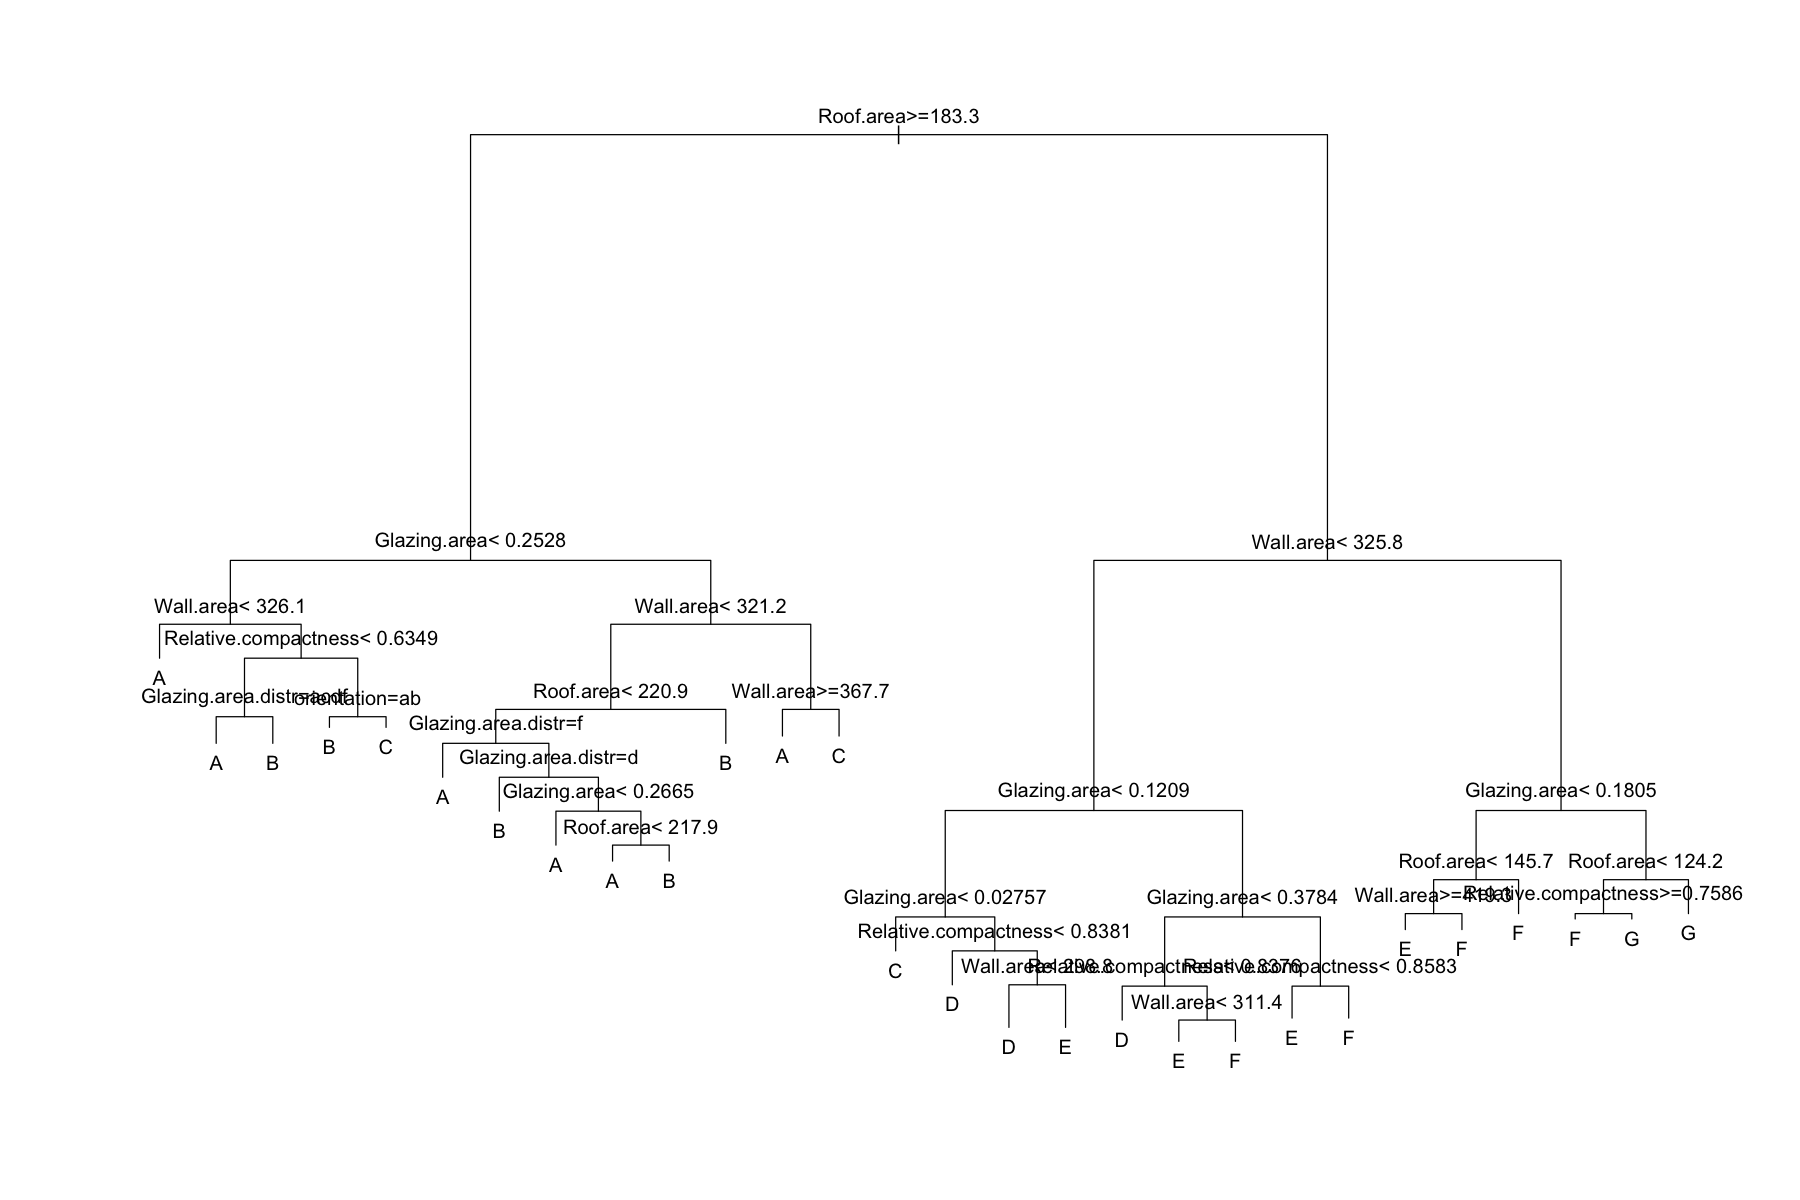

In [47]:
options(repr.plot.width = 15, repr.plot.height = 10)
tree.c=rpart(Energy.efficiency~.,data=train_class,control=rpart.control(cp=0.001))
# La commande ci-dessous fournit un descriptif de l'arbre obtenu

plot(tree.c)
text(tree.c)

On voit sur ce premier arbre que la variable Roof.area a une très grande influence sur la classification énergétique. 

Déterminons maintenant le meilleur paramètre de complexité (cp) qui a pour but d'élaguer l'arbre.

cp opti : 0.004193828

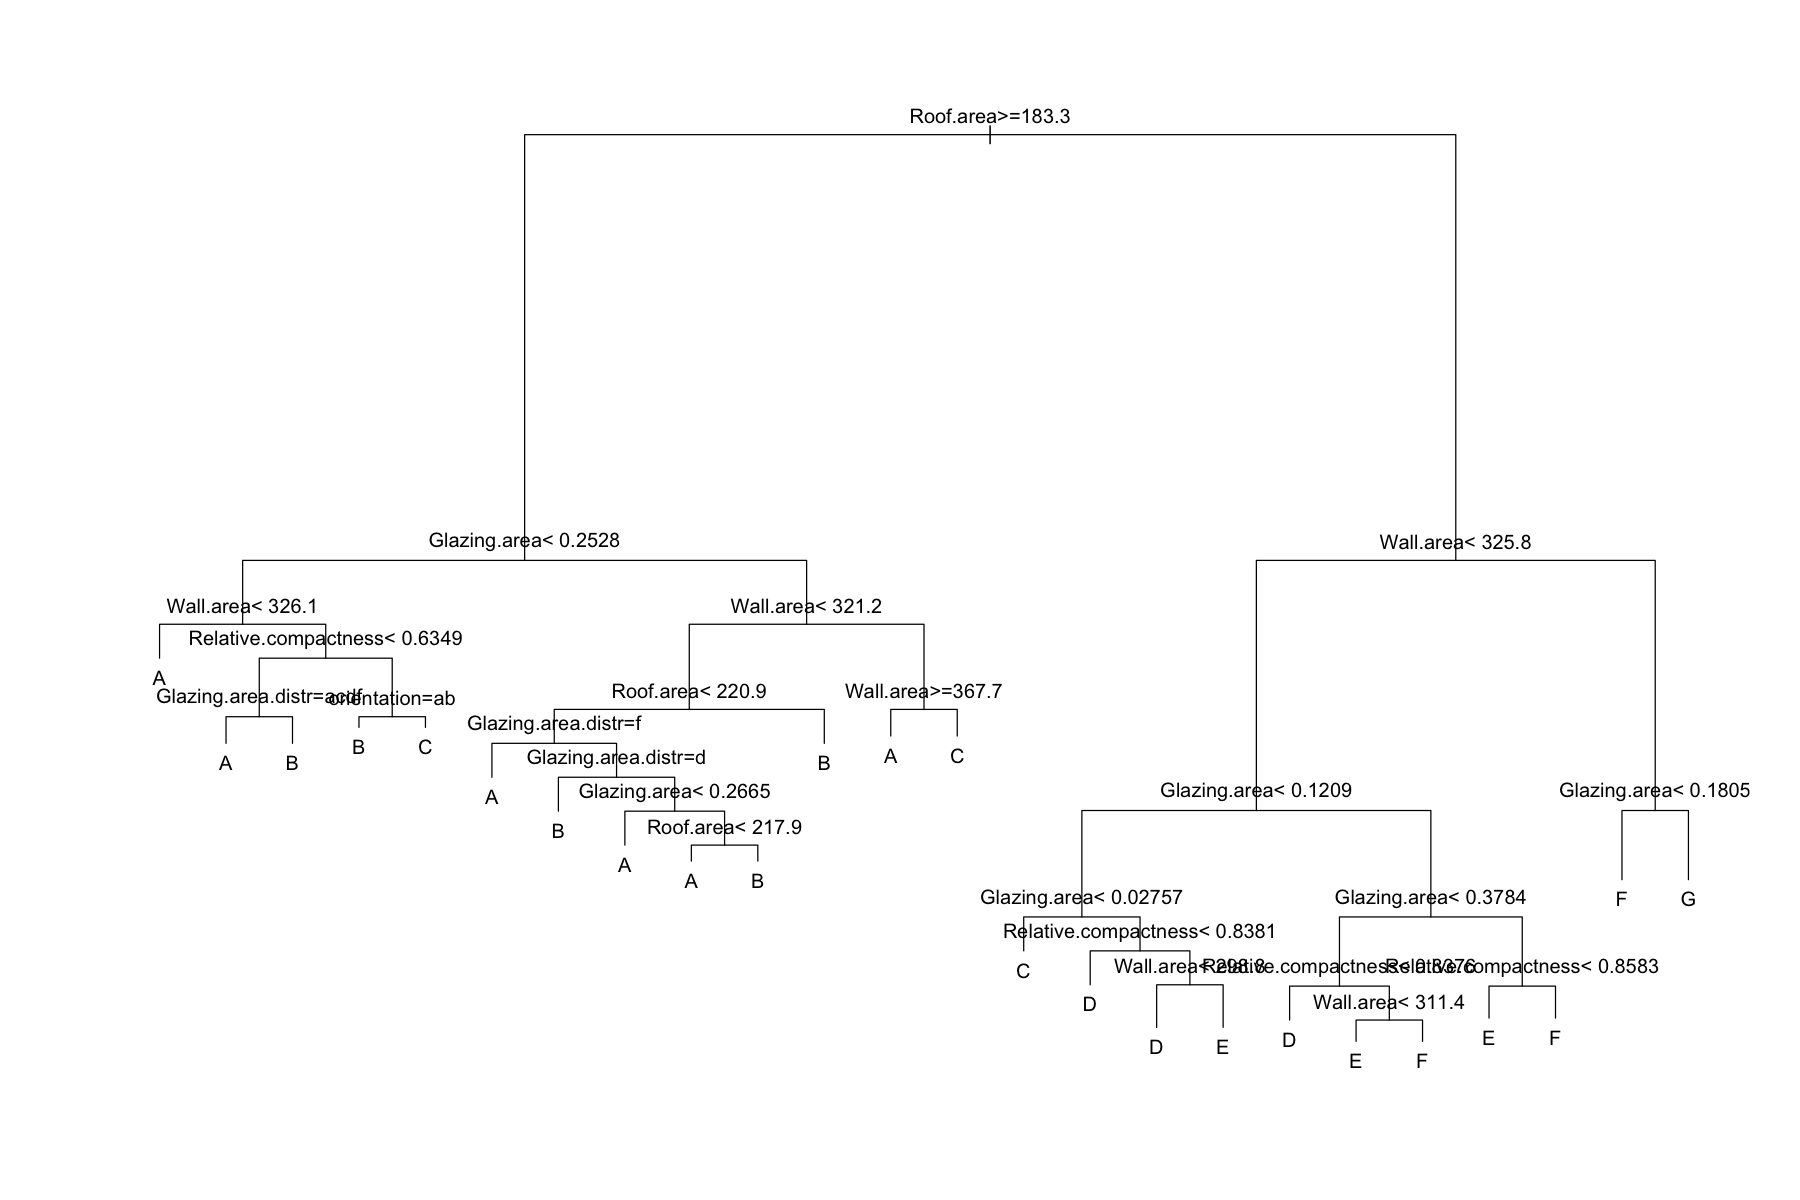

In [48]:
xmat=xpred.rpart(tree.c, xval = 10)
#levels(datappr[,"Survived"]) <- c(1,2)
xerr <- (xmat-as.numeric(y_train_class))^2
CVerr=apply(xerr,2,sum)
#CVerr  #    CP           erreur
cp_opti = as.numeric(attributes(which.min(CVerr))$names); 

cat('cp opti :', cp_opti)

tree.c.opti=rpart(Energy.efficiency~.,data=train_class,control=rpart.control(cp=cp_opti))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(tree.c.opti)
text(tree.c.opti)

**Commentaire :**
On remarque que la variable Roof.Area permet déja de classifier les extrêmes (classe A,B vs D,E,F,G), la délimitation dela classe C n'étant pas aussi nette.

**Résultats :**

In [49]:
tree.c.opti.reg <- predict(tree.c.opti, newdata = test_class, type = "class")
Tab_score_class <-Compute_Error(tree.c.opti.reg,quali=TRUE,name_model = "Tree opti");Tab_score_class
#tab2 = table(p, x_test_class[, "Energy.efficiency"]); tab2
#score_tree_opti_class = sum(diag(tab2)) / sum(tab2)
#cat("Score de Classification : ",score_tree_opti_class)

#On actualise le tableau des scores
#Tab_score = c(Tab_score,score_tree_opti_class)
#Name_model = c(Name_model, "Tree Opti")

Table de contingence de Tree opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 30  7  4  0  0  0  0
       B 12 11  6  0  0  0  0
       C  3  8 14  2  0  0  0
       D  0  0  2 13  3  0  0
       E  0  0  0  7 19  6  0
       F  0  0  0  1  6 19  2
       G  0  0  0  0  1  2 14


Modele      Score1   Score2    
1 Naive Logit 0.578125 0.09821429
2 Tree opti   0.625000 0.27678571

### d) Random Forest : 

**Mise en place du modèle :**

In [50]:
set.seed(69)
rf.c <- randomForest(Energy.efficiency ~ ., data = train_class, 
                       xtest = x_test_class, ytest = y_test_class,
                       ntree = 500,do.trace = 50, importance = TRUE)


ntree      OOB      1      2      3      4      5      6      7|    Test      1      2      3      4      5      6      7
   50:  40.28% 13.50% 62.65% 61.11% 41.07% 50.00% 60.00% 26.15%|  35.94% 22.22% 57.69% 50.00% 30.43% 27.59% 59.26%  0.00%
  100:  39.41% 11.66% 63.86% 55.56% 39.29% 51.25% 57.33% 29.23%|  31.77% 17.78% 61.54% 46.15% 30.43% 27.59% 37.04%  0.00%
  150:  38.72% 14.11% 56.63% 55.56% 35.71% 52.50% 57.33% 27.69%|  33.85% 17.78% 69.23% 50.00% 34.78% 27.59% 33.33%  6.25%
  200:  38.02% 13.50% 56.63% 53.70% 35.71% 56.25% 52.00% 26.15%|  33.33% 17.78% 69.23% 50.00% 30.43% 27.59% 33.33%  6.25%
  250:  37.33% 12.88% 54.22% 53.70% 33.93% 56.25% 52.00% 26.15%|  34.38% 17.78% 65.38% 50.00% 39.13% 31.03% 33.33%  6.25%
  300:  37.50% 13.50% 56.63% 53.70% 35.71% 53.75% 52.00% 24.62%|  33.85% 17.78% 65.38% 53.85% 30.43% 31.03% 33.33%  6.25%
  350:  37.85% 13.50% 54.22% 59.26% 35.71% 52.50% 52.00% 27.69%|  33.33% 17.78% 65.38% 53.85% 30.43% 31.03% 29.63%  6.25%
  400:  37.33% 14.11% 53

**Résultats :**

In [51]:
rf.c.pred <- rf.c$test$predicted
Tab_score_class <-Compute_Error(rf.c.pred,quali=TRUE,name_model = "Random Forest");Tab_score_class
#tab3 = table(pred.rf, x_test_class[, "Energy.efficiency"]); tab3
#score.randomForest.class = sum(diag(tab3)) / sum(tab3)
#cat("Score de classification : " , score.randomForest.class )

#On actualise le tableau de scores : 
#Tab_score = c(Tab_score,score.randomForest.class)
#Name_model = c(Name_model, "Random Forest")

Table de contingence de Random Forest : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 37  9  2  0  0  0  0
       B  7  9  9  0  0  0  0
       C  1  7 12  1  0  0  0
       D  0  1  3 15  2  0  0
       E  0  0  0  7 20  6  0
       F  0  0  0  0  6 19  1
       G  0  0  0  0  1  2 15


Modele        Score1    Score2    
1 Naive Logit   0.5781250 0.09821429
2 Tree opti     0.6250000 0.27678571
3 Random Forest 0.6614583 0.37500000

**Commentaire :** 
Nous remarquons dans un premier temps que le taux de classification est meilleur que tous celui obtenu avec l'arbre de décision.

Pour améliorer le taux de classification de Random Forest, nous pouvons essayer de modifier le paramètre __mtry__ correspondant au nombre de variables testées à chaque division.

Utilisons la librairie caret.


**Mise en place du modèle optimisé :**

In [52]:
set.seed(69)
cvControl <- trainControl(method = "cv", number = 10)
mtryTrials <- train(x_train_class, y_train_class, method = "rf", tuneLength = 6,
               trControl = cvControl, trace = FALSE)
mtryTrials

Random Forest 

576 samples
  7 predictor
  7 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 519, 518, 520, 521, 515, 518, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.6351225  0.5578966
  3     0.6334859  0.5565610
  4     0.6369038  0.5611815
  5     0.6368201  0.5614494
  6     0.6350949  0.5588533
  7     0.6281471  0.5512370

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.

In [53]:
set.seed(69)
rf.c.opti <- randomForest(Energy.efficiency ~ ., data = train_class, 
                       xtest = x_test_class, ytest = y_test_class,
                       ntree = 500,mtry=mtryTrials$bestTune$mtry,do.trace = 50, importance = TRUE)

ntree      OOB      1      2      3      4      5      6      7|    Test      1      2      3      4      5      6      7
   50:  37.50% 15.95% 54.22% 57.41% 23.21% 48.75% 54.67% 32.31%|  35.42% 22.22% 57.69% 57.69% 30.43% 34.48% 40.74%  0.00%
  100:  36.81% 15.95% 53.01% 53.70% 26.79% 47.50% 54.67% 29.23%|  35.94% 20.00% 61.54% 57.69% 34.78% 31.03% 44.44%  0.00%
  150:  36.81% 15.95% 50.60% 55.56% 30.36% 46.25% 56.00% 27.69%|  35.94% 17.78% 61.54% 57.69% 34.78% 31.03% 48.15%  0.00%
  200:  36.46% 15.95% 48.19% 53.70% 30.36% 47.50% 56.00% 27.69%|  34.90% 17.78% 61.54% 57.69% 34.78% 31.03% 40.74%  0.00%
  250:  36.46% 14.11% 51.81% 53.70% 30.36% 48.75% 53.33% 29.23%|  35.42% 17.78% 61.54% 57.69% 39.13% 31.03% 40.74%  0.00%
  300:  37.15% 14.72% 54.22% 53.70% 28.57% 48.75% 53.33% 32.31%|  34.90% 17.78% 61.54% 57.69% 39.13% 31.03% 37.04%  0.00%
  350:  36.63% 14.11% 53.01% 51.85% 26.79% 51.25% 53.33% 30.77%|  34.90% 17.78% 61.54% 57.69% 39.13% 31.03% 37.04%  0.00%
  400:  36.63% 14.11% 53

**Résultats du modèle optimisé :**

In [54]:
rf.c.opti.pred <- rf.c.opti$test$predicted
Tab_score_class <-Compute_Error(rf.c.opti.pred,quali=TRUE,name_model = "Random Forest Opti");Tab_score_class

#tab4 = table(pred.rf.opti, x_test_class[, "Energy.efficiency"]); tab4
#score_random_forest_opti = sum(diag(tab4)) / sum(tab4)
#cat("Score de classification : " , score_random_forest_opti )

#Actualisation du tableau de score :
#Tab_score = c(Tab_score,score_random_forest_opti)
#Name_model = c(Name_model, "Random Forest Opti")

Table de contingence de Random Forest Opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 37  9  1  0  0  0  0
       B  7 10 12  1  0  0  0
       C  1  7 11  1  0  0  0
       D  0  0  2 14  2  0  0
       E  0  0  0  7 20  7  0
       F  0  0  0  0  6 17  0
       G  0  0  0  0  1  3 16


Modele             Score1    Score2    
1 Naive Logit        0.5781250 0.09821429
2 Tree opti          0.6250000 0.27678571
3 Random Forest      0.6614583 0.37500000
4 Random Forest Opti 0.6510417 0.36607143

### e) Boosting 

**Mise en place du modèle :**

In [55]:
gbm.c <- gbm(Energy.efficiency ~ ., data=train_class,
        distribution = "multinomial",cv.folds = 10,shrinkage = .01,
       n.minobsinnode = 10, n.trees = 200)

Warning message:
“Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk.”Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

**Résultats :**

In [56]:
p = predict.gbm(object = gbm.c,
                   newdata = test_class,
                   n.trees = 200,
                   type = "response")

gbm.c.pred = colnames(p)[apply(p, 1, which.max)]

Tab_score_class <- Compute_Error(gbm.c.pred,quali = TRUE, name_model = "GBM"); Tab_score_class

Table de contingence de GBM : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 42 21 13  0  0  0  0
       B  2  1  1  0  0  0  0
       C  1  3  9  1  0  0  0
       D  0  1  2 10  1  0  0
       E  0  0  1 11 24 14  1
       F  0  0  0  1  1  6  0
       G  0  0  0  0  3  7 15


Modele             Score1    Score2    
1 Naive Logit        0.5781250 0.09821429
2 Tree opti          0.6250000 0.27678571
3 Random Forest      0.6614583 0.37500000
4 Random Forest Opti 0.6510417 0.36607143
5 GBM                0.5572917 0.05357143

**Mise en place du modèle optimisé :**

In [57]:
set.seed(2)
cvControlRandom = trainControl(method = "cv", number = 10, search='random')
gbm.opti.c = train(x_train_class, y_train_class,method = "gbm", tuneLength = 8,
               trControl = cvControl)

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2932
     2        1.7796             nan     0.1000    0.1941
     3        1.6629             nan     0.1000    0.1263
     4        1.5750             nan     0.1000    0.1118
     5        1.5056             nan     0.1000    0.0805
     6        1.4509             nan     0.1000    0.0770
     7        1.4033             nan     0.1000    0.0393
     8        1.3640             nan     0.1000    0.0496
     9        1.3252             nan     0.1000    0.0276
    10        1.2955             nan     0.1000    0.0155
    20        1.1044             nan     0.1000    0.0030
    40        0.9273             nan     0.1000   -0.0034
    60        0.8436             nan     0.1000   -0.0030
    80        0.7807             nan     0.1000   -0.0071
   100        0.7345             nan     0.1000   -0.0087
   120        0.6975             nan     0.1000   -0.0141
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3464
     2        1.7132             nan     0.1000    0.2257
     3        1.5628             nan     0.1000    0.1750
     4        1.4469             nan     0.1000    0.1145
     5        1.3597             nan     0.1000    0.0993
     6        1.2864             nan     0.1000    0.0563
     7        1.2335             nan     0.1000    0.0577
     8        1.1801             nan     0.1000    0.0439
     9        1.1330             nan     0.1000    0.0199
    10        1.0931             nan     0.1000    0.0388
    20        0.8783             nan     0.1000    0.0031
    40        0.6863             nan     0.1000   -0.0111
    60        0.5855             nan     0.1000   -0.0123
    80        0.5133             nan     0.1000   -0.0090
   100        0.4573             nan     0.1000   -0.0139
   120        0.4067             nan     0.1000   -0.0094
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3701
     2        1.6935             nan     0.1000    0.2498
     3        1.5119             nan     0.1000    0.1736
     4        1.3833             nan     0.1000    0.1146
     5        1.2811             nan     0.1000    0.1117
     6        1.1976             nan     0.1000    0.0615
     7        1.1347             nan     0.1000    0.0684
     8        1.0762             nan     0.1000    0.0285
     9        1.0297             nan     0.1000    0.0327
    10        0.9873             nan     0.1000    0.0262
    20        0.7469             nan     0.1000   -0.0122
    40        0.5522             nan     0.1000   -0.0169
    60        0.4418             nan     0.1000   -0.0163
    80        0.3626             nan     0.1000   -0.0120
   100        0.3009             nan     0.1000   -0.0142
   120        0.2546             nan     0.1000   -0.0114
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4158
     2        1.6731             nan     0.1000    0.2702
     3        1.4788             nan     0.1000    0.1763
     4        1.3417             nan     0.1000    0.1392
     5        1.2295             nan     0.1000    0.1073
     6        1.1367             nan     0.1000    0.0686
     7        1.0638             nan     0.1000    0.0476
     8        1.0106             nan     0.1000    0.0278
     9        0.9630             nan     0.1000    0.0225
    10        0.9170             nan     0.1000    0.0327
    20        0.6583             nan     0.1000   -0.0075
    40        0.4582             nan     0.1000   -0.0122
    60        0.3426             nan     0.1000   -0.0169
    80        0.2574             nan     0.1000   -0.0100
   100        0.2046             nan     0.1000   -0.0115
   120        0.1643             nan     0.1000   -0.0065
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4144
     2        1.6500             nan     0.1000    0.2317
     3        1.4701             nan     0.1000    0.1828
     4        1.3236             nan     0.1000    0.1404
     5        1.2112             nan     0.1000    0.1014
     6        1.1226             nan     0.1000    0.0664
     7        1.0448             nan     0.1000    0.0486
     8        0.9829             nan     0.1000    0.0580
     9        0.9251             nan     0.1000    0.0163
    10        0.8836             nan     0.1000    0.0147
    20        0.6196             nan     0.1000   -0.0114
    40        0.3971             nan     0.1000   -0.0197
    60        0.2798             nan     0.1000   -0.0098
    80        0.2016             nan     0.1000   -0.0109
   100        0.1524             nan     0.1000   -0.0070
   120        0.1164             nan     0.1000   -0.0068
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3913
     2        1.6475             nan     0.1000    0.2783
     3        1.4473             nan     0.1000    0.1679
     4        1.3020             nan     0.1000    0.1308
     5        1.1820             nan     0.1000    0.1145
     6        1.0844             nan     0.1000    0.0699
     7        1.0105             nan     0.1000    0.0273
     8        0.9509             nan     0.1000    0.0298
     9        0.8947             nan     0.1000    0.0284
    10        0.8439             nan     0.1000    0.0202
    20        0.5792             nan     0.1000   -0.0063
    40        0.3461             nan     0.1000   -0.0281
    60        0.2300             nan     0.1000   -0.0199
    80        0.1625             nan     0.1000   -0.0095
   100        0.1129             nan     0.1000   -0.0056
   120        0.0801             nan     0.1000   -0.0049
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3908
     2        1.6534             nan     0.1000    0.2956
     3        1.4356             nan     0.1000    0.1978
     4        1.2756             nan     0.1000    0.1209
     5        1.1650             nan     0.1000    0.1136
     6        1.0656             nan     0.1000    0.0844
     7        0.9855             nan     0.1000    0.0487
     8        0.9199             nan     0.1000    0.0226
     9        0.8694             nan     0.1000    0.0098
    10        0.8237             nan     0.1000    0.0120
    20        0.5505             nan     0.1000   -0.0151
    40        0.3101             nan     0.1000   -0.0171
    60        0.1901             nan     0.1000   -0.0119
    80        0.1247             nan     0.1000   -0.0091
   100        0.0842             nan     0.1000   -0.0041
   120        0.0583             nan     0.1000   -0.0034
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3775
     2        1.6420             nan     0.1000    0.2562
     3        1.4346             nan     0.1000    0.1542
     4        1.2904             nan     0.1000    0.1278
     5        1.1706             nan     0.1000    0.0670
     6        1.0799             nan     0.1000    0.0426
     7        1.0077             nan     0.1000    0.0408
     8        0.9327             nan     0.1000    0.0535
     9        0.8758             nan     0.1000    0.0215
    10        0.8265             nan     0.1000    0.0273
    20        0.5201             nan     0.1000   -0.0115
    40        0.2810             nan     0.1000   -0.0279
    60        0.1659             nan     0.1000   -0.0107
    80        0.1054             nan     0.1000   -0.0095
   100        0.0695             nan     0.1000   -0.0055
   120        0.0462             nan     0.1000   -0.0024
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2769
     2        1.7715             nan     0.1000    0.1969
     3        1.6535             nan     0.1000    0.1321
     4        1.5706             nan     0.1000    0.1052
     5        1.4988             nan     0.1000    0.0900
     6        1.4341             nan     0.1000    0.0557
     7        1.3920             nan     0.1000    0.0541
     8        1.3509             nan     0.1000    0.0369
     9        1.3165             nan     0.1000    0.0215
    10        1.2866             nan     0.1000    0.0337
    20        1.0879             nan     0.1000    0.0015
    40        0.9168             nan     0.1000   -0.0005
    60        0.8326             nan     0.1000   -0.0111
    80        0.7715             nan     0.1000   -0.0115
   100        0.7265             nan     0.1000   -0.0162
   120        0.6907             nan     0.1000   -0.0140
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3343
     2        1.7014             nan     0.1000    0.2152
     3        1.5454             nan     0.1000    0.1870
     4        1.4304             nan     0.1000    0.1143
     5        1.3423             nan     0.1000    0.0889
     6        1.2703             nan     0.1000    0.0732
     7        1.2096             nan     0.1000    0.0508
     8        1.1595             nan     0.1000    0.0264
     9        1.1169             nan     0.1000    0.0335
    10        1.0759             nan     0.1000    0.0256
    20        0.8593             nan     0.1000   -0.0046
    40        0.6845             nan     0.1000   -0.0248
    60        0.5861             nan     0.1000   -0.0154
    80        0.5157             nan     0.1000   -0.0149
   100        0.4578             nan     0.1000   -0.0173
   120        0.4027             nan     0.1000   -0.0126
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4187
     2        1.6651             nan     0.1000    0.2554
     3        1.4858             nan     0.1000    0.1572
     4        1.3635             nan     0.1000    0.1162
     5        1.2704             nan     0.1000    0.0730
     6        1.1956             nan     0.1000    0.0757
     7        1.1280             nan     0.1000    0.0704
     8        1.0707             nan     0.1000    0.0332
     9        1.0253             nan     0.1000    0.0480
    10        0.9825             nan     0.1000    0.0218
    20        0.7542             nan     0.1000   -0.0129
    40        0.5575             nan     0.1000   -0.0194
    60        0.4456             nan     0.1000   -0.0132
    80        0.3649             nan     0.1000   -0.0190
   100        0.3021             nan     0.1000   -0.0144
   120        0.2521             nan     0.1000   -0.0129
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3955
     2        1.6535             nan     0.1000    0.2519
     3        1.4634             nan     0.1000    0.1629
     4        1.3311             nan     0.1000    0.1382
     5        1.2242             nan     0.1000    0.0786
     6        1.1442             nan     0.1000    0.0798
     7        1.0714             nan     0.1000    0.0697
     8        1.0103             nan     0.1000    0.0418
     9        0.9596             nan     0.1000    0.0457
    10        0.9160             nan     0.1000    0.0194
    20        0.6682             nan     0.1000   -0.0222
    40        0.4614             nan     0.1000   -0.0181
    60        0.3461             nan     0.1000   -0.0167
    80        0.2701             nan     0.1000   -0.0176
   100        0.2104             nan     0.1000   -0.0109
   120        0.1635             nan     0.1000   -0.0079
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4312
     2        1.6420             nan     0.1000    0.2774
     3        1.4435             nan     0.1000    0.1550
     4        1.3095             nan     0.1000    0.1202
     5        1.2040             nan     0.1000    0.0880
     6        1.1171             nan     0.1000    0.0496
     7        1.0499             nan     0.1000    0.0491
     8        0.9886             nan     0.1000    0.0209
     9        0.9364             nan     0.1000    0.0245
    10        0.8890             nan     0.1000    0.0320
    20        0.6242             nan     0.1000   -0.0284
    40        0.3931             nan     0.1000   -0.0258
    60        0.2775             nan     0.1000   -0.0109
    80        0.2058             nan     0.1000   -0.0127
   100        0.1567             nan     0.1000   -0.0118
   120        0.1186             nan     0.1000   -0.0037
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3971
     2        1.6441             nan     0.1000    0.2435
     3        1.4406             nan     0.1000    0.1883
     4        1.2938             nan     0.1000    0.1445
     5        1.1792             nan     0.1000    0.0965
     6        1.0874             nan     0.1000    0.0615
     7        1.0104             nan     0.1000    0.0400
     8        0.9505             nan     0.1000    0.0411
     9        0.8966             nan     0.1000    0.0170
    10        0.8516             nan     0.1000    0.0146
    20        0.5761             nan     0.1000   -0.0127
    40        0.3445             nan     0.1000   -0.0186
    60        0.2247             nan     0.1000   -0.0108
    80        0.1562             nan     0.1000   -0.0128
   100        0.1114             nan     0.1000   -0.0082
   120        0.0821             nan     0.1000   -0.0051
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4189
     2        1.6267             nan     0.1000    0.2619
     3        1.4177             nan     0.1000    0.1832
     4        1.2748             nan     0.1000    0.1335
     5        1.1639             nan     0.1000    0.1046
     6        1.0647             nan     0.1000    0.0651
     7        0.9835             nan     0.1000    0.0428
     8        0.9178             nan     0.1000    0.0343
     9        0.8624             nan     0.1000    0.0112
    10        0.8155             nan     0.1000    0.0344
    20        0.5271             nan     0.1000   -0.0263
    40        0.3024             nan     0.1000   -0.0212
    60        0.1914             nan     0.1000   -0.0121
    80        0.1270             nan     0.1000   -0.0075
   100        0.0880             nan     0.1000   -0.0047
   120        0.0600             nan     0.1000   -0.0035
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4163
     2        1.6405             nan     0.1000    0.2950
     3        1.4315             nan     0.1000    0.1796
     4        1.2762             nan     0.1000    0.1300
     5        1.1576             nan     0.1000    0.1046
     6        1.0601             nan     0.1000    0.0737
     7        0.9797             nan     0.1000    0.0628
     8        0.9062             nan     0.1000    0.0271
     9        0.8539             nan     0.1000    0.0247
    10        0.8054             nan     0.1000   -0.0023
    20        0.5181             nan     0.1000   -0.0135
    40        0.2699             nan     0.1000   -0.0158
    60        0.1646             nan     0.1000   -0.0129
    80        0.1019             nan     0.1000   -0.0057
   100        0.0643             nan     0.1000   -0.0038
   120        0.0429             nan     0.1000   -0.0035
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2754
     2        1.7810             nan     0.1000    0.1790
     3        1.6579             nan     0.1000    0.1484
     4        1.5719             nan     0.1000    0.1220
     5        1.4978             nan     0.1000    0.0908
     6        1.4398             nan     0.1000    0.0746
     7        1.3896             nan     0.1000    0.0660
     8        1.3472             nan     0.1000    0.0430
     9        1.3128             nan     0.1000    0.0446
    10        1.2774             nan     0.1000    0.0291
    20        1.0866             nan     0.1000   -0.0046
    40        0.9238             nan     0.1000   -0.0019
    60        0.8399             nan     0.1000   -0.0110
    80        0.7737             nan     0.1000   -0.0070
   100        0.7297             nan     0.1000   -0.0129
   120        0.6889             nan     0.1000   -0.0152
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3206
     2        1.7424             nan     0.1000    0.2448
     3        1.5886             nan     0.1000    0.1855
     4        1.4621             nan     0.1000    0.1482
     5        1.3612             nan     0.1000    0.1036
     6        1.2831             nan     0.1000    0.0854
     7        1.2158             nan     0.1000    0.0730
     8        1.1602             nan     0.1000    0.0358
     9        1.1134             nan     0.1000    0.0330
    10        1.0778             nan     0.1000    0.0155
    20        0.8608             nan     0.1000   -0.0077
    40        0.6774             nan     0.1000   -0.0205
    60        0.5788             nan     0.1000   -0.0197
    80        0.5075             nan     0.1000   -0.0226
   100        0.4472             nan     0.1000   -0.0131
   120        0.4003             nan     0.1000   -0.0133
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3960
     2        1.6734             nan     0.1000    0.2252
     3        1.4939             nan     0.1000    0.1761
     4        1.3599             nan     0.1000    0.1106
     5        1.2634             nan     0.1000    0.1107
     6        1.1797             nan     0.1000    0.0786
     7        1.1137             nan     0.1000    0.0390
     8        1.0583             nan     0.1000    0.0542
     9        1.0083             nan     0.1000    0.0206
    10        0.9744             nan     0.1000    0.0111
    20        0.7435             nan     0.1000   -0.0100
    40        0.5455             nan     0.1000   -0.0140
    60        0.4335             nan     0.1000   -0.0153
    80        0.3604             nan     0.1000   -0.0190
   100        0.2993             nan     0.1000   -0.0127
   120        0.2502             nan     0.1000   -0.0109
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4234
     2        1.6431             nan     0.1000    0.2569
     3        1.4576             nan     0.1000    0.1807
     4        1.3188             nan     0.1000    0.1215
     5        1.2112             nan     0.1000    0.0940
     6        1.1232             nan     0.1000    0.0620
     7        1.0596             nan     0.1000    0.0623
     8        0.9974             nan     0.1000    0.0559
     9        0.9465             nan     0.1000    0.0298
    10        0.9023             nan     0.1000    0.0113
    20        0.6673             nan     0.1000   -0.0082
    40        0.4613             nan     0.1000   -0.0158
    60        0.3527             nan     0.1000   -0.0154
    80        0.2761             nan     0.1000   -0.0094
   100        0.2128             nan     0.1000   -0.0107
   120        0.1678             nan     0.1000   -0.0073
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4365
     2        1.6343             nan     0.1000    0.2259
     3        1.4601             nan     0.1000    0.1776
     4        1.3130             nan     0.1000    0.1268
     5        1.2063             nan     0.1000    0.0958
     6        1.1204             nan     0.1000    0.0552
     7        1.0490             nan     0.1000    0.0621
     8        0.9860             nan     0.1000    0.0338
     9        0.9338             nan     0.1000    0.0446
    10        0.8826             nan     0.1000    0.0171
    20        0.6101             nan     0.1000   -0.0042
    40        0.3874             nan     0.1000   -0.0199
    60        0.2720             nan     0.1000   -0.0124
    80        0.1984             nan     0.1000   -0.0106
   100        0.1481             nan     0.1000   -0.0080
   120        0.1120             nan     0.1000   -0.0056
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4590
     2        1.6275             nan     0.1000    0.2469
     3        1.4276             nan     0.1000    0.1601
     4        1.2918             nan     0.1000    0.1488
     5        1.1723             nan     0.1000    0.1000
     6        1.0793             nan     0.1000    0.0726
     7        0.9992             nan     0.1000    0.0638
     8        0.9311             nan     0.1000    0.0112
     9        0.8814             nan     0.1000    0.0190
    10        0.8362             nan     0.1000    0.0237
    20        0.5608             nan     0.1000   -0.0186
    40        0.3332             nan     0.1000   -0.0183
    60        0.2231             nan     0.1000   -0.0118
    80        0.1541             nan     0.1000   -0.0086
   100        0.1092             nan     0.1000   -0.0067
   120        0.0779             nan     0.1000   -0.0038
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4498
     2        1.6268             nan     0.1000    0.2415
     3        1.4253             nan     0.1000    0.1562
     4        1.2770             nan     0.1000    0.1151
     5        1.1565             nan     0.1000    0.1044
     6        1.0616             nan     0.1000    0.0789
     7        0.9837             nan     0.1000    0.0584
     8        0.9198             nan     0.1000    0.0256
     9        0.8616             nan     0.1000    0.0062
    10        0.8193             nan     0.1000    0.0150
    20        0.5358             nan     0.1000   -0.0303
    40        0.3035             nan     0.1000   -0.0132
    60        0.1905             nan     0.1000   -0.0107
    80        0.1196             nan     0.1000   -0.0056
   100        0.0812             nan     0.1000   -0.0062
   120        0.0556             nan     0.1000   -0.0043
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4038
     2        1.6342             nan     0.1000    0.2505
     3        1.4255             nan     0.1000    0.1902
     4        1.2716             nan     0.1000    0.1427
     5        1.1519             nan     0.1000    0.0816
     6        1.0595             nan     0.1000    0.0678
     7        0.9832             nan     0.1000    0.0447
     8        0.9172             nan     0.1000    0.0358
     9        0.8629             nan     0.1000    0.0200
    10        0.8152             nan     0.1000   -0.0021
    20        0.5243             nan     0.1000   -0.0098
    40        0.2824             nan     0.1000   -0.0189
    60        0.1694             nan     0.1000   -0.0100
    80        0.1050             nan     0.1000   -0.0072
   100        0.0686             nan     0.1000   -0.0043
   120        0.0447             nan     0.1000   -0.0037
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2644
     2        1.7922             nan     0.1000    0.1946
     3        1.6593             nan     0.1000    0.1483
     4        1.5672             nan     0.1000    0.1021
     5        1.4992             nan     0.1000    0.0860
     6        1.4407             nan     0.1000    0.0689
     7        1.3905             nan     0.1000    0.0527
     8        1.3451             nan     0.1000    0.0337
     9        1.3100             nan     0.1000    0.0260
    10        1.2777             nan     0.1000    0.0362
    20        1.0848             nan     0.1000    0.0025
    40        0.9132             nan     0.1000   -0.0089
    60        0.8200             nan     0.1000   -0.0076
    80        0.7601             nan     0.1000   -0.0097
   100        0.7150             nan     0.1000   -0.0112
   120        0.6734             nan     0.1000   -0.0099
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3253
     2        1.7285             nan     0.1000    0.2217
     3        1.5797             nan     0.1000    0.1754
     4        1.4510             nan     0.1000    0.1398
     5        1.3535             nan     0.1000    0.0974
     6        1.2855             nan     0.1000    0.0716
     7        1.2215             nan     0.1000    0.0316
     8        1.1786             nan     0.1000    0.0483
     9        1.1292             nan     0.1000    0.0414
    10        1.0892             nan     0.1000    0.0320
    20        0.8704             nan     0.1000    0.0012
    40        0.6796             nan     0.1000   -0.0204
    60        0.5760             nan     0.1000   -0.0217
    80        0.5084             nan     0.1000   -0.0217
   100        0.4523             nan     0.1000   -0.0093
   120        0.4066             nan     0.1000   -0.0132
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3861
     2        1.6938             nan     0.1000    0.2647
     3        1.5118             nan     0.1000    0.1743
     4        1.3796             nan     0.1000    0.1294
     5        1.2795             nan     0.1000    0.1006
     6        1.1978             nan     0.1000    0.0703
     7        1.1330             nan     0.1000    0.0626
     8        1.0741             nan     0.1000    0.0654
     9        1.0199             nan     0.1000    0.0304
    10        0.9765             nan     0.1000    0.0156
    20        0.7379             nan     0.1000   -0.0151
    40        0.5497             nan     0.1000   -0.0268
    60        0.4440             nan     0.1000   -0.0140
    80        0.3685             nan     0.1000   -0.0132
   100        0.3062             nan     0.1000   -0.0171
   120        0.2569             nan     0.1000   -0.0124
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3713
     2        1.6568             nan     0.1000    0.2755
     3        1.4595             nan     0.1000    0.1992
     4        1.3168             nan     0.1000    0.1436
     5        1.2099             nan     0.1000    0.0950
     6        1.1241             nan     0.1000    0.0896
     7        1.0524             nan     0.1000    0.0477
     8        0.9926             nan     0.1000    0.0370
     9        0.9470             nan     0.1000    0.0205
    10        0.9049             nan     0.1000    0.0185
    20        0.6569             nan     0.1000   -0.0135
    40        0.4533             nan     0.1000   -0.0174
    60        0.3469             nan     0.1000   -0.0151
    80        0.2695             nan     0.1000   -0.0132
   100        0.2132             nan     0.1000   -0.0147
   120        0.1686             nan     0.1000   -0.0078
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3911
     2        1.6540             nan     0.1000    0.2650
     3        1.4644             nan     0.1000    0.1844
     4        1.3162             nan     0.1000    0.1330
     5        1.2027             nan     0.1000    0.1017
     6        1.1077             nan     0.1000    0.0508
     7        1.0399             nan     0.1000    0.0675
     8        0.9770             nan     0.1000    0.0400
     9        0.9225             nan     0.1000    0.0373
    10        0.8724             nan     0.1000    0.0112
    20        0.6065             nan     0.1000   -0.0086
    40        0.3833             nan     0.1000   -0.0105
    60        0.2667             nan     0.1000   -0.0190
    80        0.1933             nan     0.1000   -0.0096
   100        0.1437             nan     0.1000   -0.0091
   120        0.1095             nan     0.1000   -0.0069
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4150
     2        1.6312             nan     0.1000    0.2540
     3        1.4311             nan     0.1000    0.1901
     4        1.2876             nan     0.1000    0.1299
     5        1.1757             nan     0.1000    0.1049
     6        1.0814             nan     0.1000    0.0713
     7        0.9990             nan     0.1000    0.0556
     8        0.9322             nan     0.1000    0.0461
     9        0.8728             nan     0.1000    0.0324
    10        0.8246             nan     0.1000    0.0219
    20        0.5608             nan     0.1000   -0.0275
    40        0.3337             nan     0.1000   -0.0211
    60        0.2204             nan     0.1000   -0.0141
    80        0.1512             nan     0.1000   -0.0102
   100        0.1099             nan     0.1000   -0.0088
   120        0.0808             nan     0.1000   -0.0049
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4061
     2        1.6352             nan     0.1000    0.2611
     3        1.4313             nan     0.1000    0.1527
     4        1.2879             nan     0.1000    0.1056
     5        1.1783             nan     0.1000    0.1150
     6        1.0732             nan     0.1000    0.0721
     7        0.9950             nan     0.1000    0.0488
     8        0.9276             nan     0.1000    0.0332
     9        0.8706             nan     0.1000    0.0146
    10        0.8212             nan     0.1000    0.0202
    20        0.5349             nan     0.1000   -0.0190
    40        0.2963             nan     0.1000   -0.0203
    60        0.1897             nan     0.1000   -0.0179
    80        0.1246             nan     0.1000   -0.0101
   100        0.0857             nan     0.1000   -0.0081
   120        0.0583             nan     0.1000   -0.0037
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4044
     2        1.6276             nan     0.1000    0.2552
     3        1.4247             nan     0.1000    0.1948
     4        1.2660             nan     0.1000    0.1477
     5        1.1407             nan     0.1000    0.0874
     6        1.0455             nan     0.1000    0.0614
     7        0.9697             nan     0.1000    0.0476
     8        0.9044             nan     0.1000    0.0350
     9        0.8441             nan     0.1000    0.0326
    10        0.7936             nan     0.1000    0.0125
    20        0.5055             nan     0.1000   -0.0225
    40        0.2776             nan     0.1000   -0.0194
    60        0.1672             nan     0.1000   -0.0129
    80        0.1081             nan     0.1000   -0.0059
   100        0.0694             nan     0.1000   -0.0070
   120        0.0467             nan     0.1000   -0.0042
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2744
     2        1.7878             nan     0.1000    0.2100
     3        1.6688             nan     0.1000    0.1521
     4        1.5807             nan     0.1000    0.1138
     5        1.5080             nan     0.1000    0.0768
     6        1.4544             nan     0.1000    0.0651
     7        1.4056             nan     0.1000    0.0683
     8        1.3632             nan     0.1000    0.0401
     9        1.3289             nan     0.1000    0.0215
    10        1.2994             nan     0.1000    0.0271
    20        1.1160             nan     0.1000    0.0082
    40        0.9341             nan     0.1000   -0.0022
    60        0.8498             nan     0.1000   -0.0145
    80        0.7867             nan     0.1000   -0.0028
   100        0.7343             nan     0.1000   -0.0102
   120        0.6941             nan     0.1000   -0.0056
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3176
     2        1.7387             nan     0.1000    0.2240
     3        1.6017             nan     0.1000    0.1837
     4        1.4685             nan     0.1000    0.1359
     5        1.3783             nan     0.1000    0.1056
     6        1.3040             nan     0.1000    0.0771
     7        1.2393             nan     0.1000    0.0612
     8        1.1849             nan     0.1000    0.0367
     9        1.1411             nan     0.1000    0.0287
    10        1.1050             nan     0.1000    0.0213
    20        0.8838             nan     0.1000   -0.0096
    40        0.6965             nan     0.1000   -0.0201
    60        0.5884             nan     0.1000   -0.0133
    80        0.5116             nan     0.1000   -0.0164
   100        0.4560             nan     0.1000   -0.0100
   120        0.4104             nan     0.1000   -0.0130
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3331
     2        1.7022             nan     0.1000    0.2511
     3        1.5220             nan     0.1000    0.1969
     4        1.3930             nan     0.1000    0.1396
     5        1.2904             nan     0.1000    0.1080
     6        1.2042             nan     0.1000    0.0779
     7        1.1387             nan     0.1000    0.0324
     8        1.0884             nan     0.1000    0.0438
     9        1.0404             nan     0.1000    0.0275
    10        0.9992             nan     0.1000    0.0378
    20        0.7519             nan     0.1000   -0.0045
    40        0.5663             nan     0.1000   -0.0141
    60        0.4520             nan     0.1000   -0.0190
    80        0.3682             nan     0.1000   -0.0160
   100        0.3092             nan     0.1000   -0.0149
   120        0.2587             nan     0.1000   -0.0132
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3717
     2        1.6526             nan     0.1000    0.2520
     3        1.4769             nan     0.1000    0.1820
     4        1.3370             nan     0.1000    0.1337
     5        1.2338             nan     0.1000    0.0955
     6        1.1521             nan     0.1000    0.0927
     7        1.0771             nan     0.1000    0.0508
     8        1.0203             nan     0.1000    0.0532
     9        0.9701             nan     0.1000    0.0223
    10        0.9284             nan     0.1000    0.0065
    20        0.6800             nan     0.1000   -0.0018
    40        0.4684             nan     0.1000   -0.0142
    60        0.3480             nan     0.1000   -0.0170
    80        0.2644             nan     0.1000   -0.0132
   100        0.2084             nan     0.1000   -0.0117
   120        0.1654             nan     0.1000   -0.0122
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4412
     2        1.6375             nan     0.1000    0.2721
     3        1.4370             nan     0.1000    0.1614
     4        1.3002             nan     0.1000    0.1434
     5        1.1909             nan     0.1000    0.0806
     6        1.1070             nan     0.1000    0.0577
     7        1.0380             nan     0.1000    0.0499
     8        0.9775             nan     0.1000    0.0241
     9        0.9289             nan     0.1000    0.0172
    10        0.8904             nan     0.1000    0.0063
    20        0.6132             nan     0.1000   -0.0105
    40        0.3926             nan     0.1000   -0.0129
    60        0.2750             nan     0.1000   -0.0194
    80        0.1978             nan     0.1000   -0.0067
   100        0.1485             nan     0.1000   -0.0086
   120        0.1120             nan     0.1000   -0.0075
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3931
     2        1.6560             nan     0.1000    0.2518
     3        1.4571             nan     0.1000    0.1801
     4        1.3051             nan     0.1000    0.1295
     5        1.1939             nan     0.1000    0.1143
     6        1.0918             nan     0.1000    0.0672
     7        1.0139             nan     0.1000    0.0406
     8        0.9429             nan     0.1000    0.0296
     9        0.8909             nan     0.1000    0.0022
    10        0.8482             nan     0.1000    0.0240
    20        0.5771             nan     0.1000   -0.0205
    40        0.3439             nan     0.1000   -0.0135
    60        0.2269             nan     0.1000   -0.0148
    80        0.1594             nan     0.1000   -0.0082
   100        0.1120             nan     0.1000   -0.0084
   120        0.0814             nan     0.1000   -0.0055
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4184
     2        1.6541             nan     0.1000    0.2437
     3        1.4492             nan     0.1000    0.1819
     4        1.2954             nan     0.1000    0.1296
     5        1.1809             nan     0.1000    0.0985
     6        1.0847             nan     0.1000    0.0825
     7        1.0027             nan     0.1000    0.0475
     8        0.9388             nan     0.1000    0.0361
     9        0.8804             nan     0.1000    0.0263
    10        0.8296             nan     0.1000    0.0202
    20        0.5543             nan     0.1000   -0.0178
    40        0.3159             nan     0.1000   -0.0123
    60        0.1941             nan     0.1000   -0.0120
    80        0.1286             nan     0.1000   -0.0116
   100        0.0879             nan     0.1000   -0.0074
   120        0.0611             nan     0.1000   -0.0059
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3972
     2        1.6437             nan     0.1000    0.2476
     3        1.4410             nan     0.1000    0.2092
     4        1.2802             nan     0.1000    0.1320
     5        1.1653             nan     0.1000    0.1037
     6        1.0673             nan     0.1000    0.0450
     7        0.9948             nan     0.1000    0.0556
     8        0.9203             nan     0.1000    0.0422
     9        0.8586             nan     0.1000    0.0237
    10        0.8082             nan     0.1000    0.0121
    20        0.5149             nan     0.1000   -0.0063
    40        0.2729             nan     0.1000   -0.0160
    60        0.1650             nan     0.1000   -0.0098
    80        0.1069             nan     0.1000   -0.0053
   100        0.0686             nan     0.1000   -0.0033
   120        0.0466             nan     0.1000   -0.0037
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2849
     2        1.7815             nan     0.1000    0.1985
     3        1.6666             nan     0.1000    0.1438
     4        1.5749             nan     0.1000    0.1056
     5        1.5043             nan     0.1000    0.0775
     6        1.4516             nan     0.1000    0.0671
     7        1.4015             nan     0.1000    0.0491
     8        1.3641             nan     0.1000    0.0317
     9        1.3305             nan     0.1000    0.0205
    10        1.3020             nan     0.1000    0.0345
    20        1.1036             nan     0.1000   -0.0019
    40        0.9303             nan     0.1000   -0.0057
    60        0.8389             nan     0.1000   -0.0060
    80        0.7749             nan     0.1000   -0.0067
   100        0.7266             nan     0.1000   -0.0145
   120        0.6904             nan     0.1000   -0.0112
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3420
     2        1.7123             nan     0.1000    0.2152
     3        1.5611             nan     0.1000    0.1781
     4        1.4433             nan     0.1000    0.1182
     5        1.3557             nan     0.1000    0.1018
     6        1.2777             nan     0.1000    0.0532
     7        1.2245             nan     0.1000    0.0540
     8        1.1679             nan     0.1000    0.0484
     9        1.1231             nan     0.1000    0.0309
    10        1.0803             nan     0.1000    0.0246
    20        0.8630             nan     0.1000   -0.0094
    40        0.6807             nan     0.1000   -0.0129
    60        0.5770             nan     0.1000   -0.0164
    80        0.5033             nan     0.1000   -0.0111
   100        0.4439             nan     0.1000   -0.0122
   120        0.3966             nan     0.1000   -0.0100
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3293
     2        1.6978             nan     0.1000    0.2328
     3        1.5217             nan     0.1000    0.1566
     4        1.3967             nan     0.1000    0.1273
     5        1.2981             nan     0.1000    0.0872
     6        1.2145             nan     0.1000    0.0789
     7        1.1407             nan     0.1000    0.0665
     8        1.0794             nan     0.1000    0.0363
     9        1.0320             nan     0.1000    0.0341
    10        0.9920             nan     0.1000    0.0230
    20        0.7554             nan     0.1000   -0.0090
    40        0.5620             nan     0.1000   -0.0161
    60        0.4456             nan     0.1000   -0.0118
    80        0.3692             nan     0.1000   -0.0197
   100        0.3110             nan     0.1000   -0.0111
   120        0.2580             nan     0.1000   -0.0070
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4076
     2        1.6704             nan     0.1000    0.2365
     3        1.4768             nan     0.1000    0.1466
     4        1.3435             nan     0.1000    0.1468
     5        1.2224             nan     0.1000    0.0778
     6        1.1469             nan     0.1000    0.0791
     7        1.0742             nan     0.1000    0.0559
     8        1.0147             nan     0.1000    0.0557
     9        0.9608             nan     0.1000    0.0388
    10        0.9139             nan     0.1000    0.0210
    20        0.6655             nan     0.1000   -0.0053
    40        0.4576             nan     0.1000   -0.0205
    60        0.3366             nan     0.1000   -0.0107
    80        0.2565             nan     0.1000   -0.0109
   100        0.2001             nan     0.1000   -0.0088
   120        0.1584             nan     0.1000   -0.0051
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4178
     2        1.6371             nan     0.1000    0.2602
     3        1.4407             nan     0.1000    0.1992
     4        1.2939             nan     0.1000    0.1408
     5        1.1765             nan     0.1000    0.1024
     6        1.0852             nan     0.1000    0.0757
     7        1.0136             nan     0.1000    0.0606
     8        0.9546             nan     0.1000    0.0369
     9        0.9017             nan     0.1000    0.0335
    10        0.8558             nan     0.1000    0.0100
    20        0.5932             nan     0.1000   -0.0281
    40        0.3779             nan     0.1000   -0.0203
    60        0.2637             nan     0.1000   -0.0149
    80        0.1905             nan     0.1000   -0.0111
   100        0.1423             nan     0.1000   -0.0069
   120        0.1051             nan     0.1000   -0.0063
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4129
     2        1.6418             nan     0.1000    0.2612
     3        1.4482             nan     0.1000    0.1825
     4        1.3046             nan     0.1000    0.1258
     5        1.1886             nan     0.1000    0.0995
     6        1.0961             nan     0.1000    0.0667
     7        1.0181             nan     0.1000    0.0516
     8        0.9483             nan     0.1000    0.0406
     9        0.8917             nan     0.1000    0.0316
    10        0.8431             nan     0.1000    0.0061
    20        0.5756             nan     0.1000   -0.0175
    40        0.3375             nan     0.1000   -0.0202
    60        0.2176             nan     0.1000   -0.0118
    80        0.1454             nan     0.1000   -0.0084
   100        0.1056             nan     0.1000   -0.0060
   120        0.0751             nan     0.1000   -0.0039
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4326
     2        1.6262             nan     0.1000    0.2577
     3        1.4254             nan     0.1000    0.1949
     4        1.2737             nan     0.1000    0.1245
     5        1.1595             nan     0.1000    0.0999
     6        1.0652             nan     0.1000    0.0671
     7        0.9883             nan     0.1000    0.0491
     8        0.9238             nan     0.1000    0.0370
     9        0.8652             nan     0.1000    0.0157
    10        0.8200             nan     0.1000    0.0033
    20        0.5302             nan     0.1000   -0.0228
    40        0.2951             nan     0.1000   -0.0134
    60        0.1820             nan     0.1000   -0.0139
    80        0.1225             nan     0.1000   -0.0067
   100        0.0834             nan     0.1000   -0.0084
   120        0.0568             nan     0.1000   -0.0045
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4086
     2        1.6315             nan     0.1000    0.2463
     3        1.4259             nan     0.1000    0.1790
     4        1.2687             nan     0.1000    0.1050
     5        1.1559             nan     0.1000    0.1062
     6        1.0589             nan     0.1000    0.0566
     7        0.9812             nan     0.1000    0.0814
     8        0.9082             nan     0.1000    0.0369
     9        0.8488             nan     0.1000    0.0283
    10        0.7991             nan     0.1000    0.0059
    20        0.5185             nan     0.1000   -0.0255
    40        0.2780             nan     0.1000   -0.0208
    60        0.1640             nan     0.1000   -0.0091
    80        0.1002             nan     0.1000   -0.0057
   100        0.0672             nan     0.1000   -0.0043
   120        0.0454             nan     0.1000   -0.0029
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2889
     2        1.7711             nan     0.1000    0.1912
     3        1.6531             nan     0.1000    0.1378
     4        1.5658             nan     0.1000    0.1171
     5        1.4939             nan     0.1000    0.0845
     6        1.4385             nan     0.1000    0.0811
     7        1.3850             nan     0.1000    0.0564
     8        1.3447             nan     0.1000    0.0380
     9        1.3072             nan     0.1000    0.0482
    10        1.2720             nan     0.1000    0.0234
    20        1.0893             nan     0.1000    0.0024
    40        0.9178             nan     0.1000   -0.0111
    60        0.8239             nan     0.1000   -0.0143
    80        0.7591             nan     0.1000   -0.0124
   100        0.7104             nan     0.1000   -0.0094
   120        0.6728             nan     0.1000   -0.0065
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3679
     2        1.7036             nan     0.1000    0.2252
     3        1.5650             nan     0.1000    0.1622
     4        1.4423             nan     0.1000    0.1450
     5        1.3469             nan     0.1000    0.0993
     6        1.2777             nan     0.1000    0.0663
     7        1.2169             nan     0.1000    0.0594
     8        1.1634             nan     0.1000    0.0330
     9        1.1241             nan     0.1000    0.0499
    10        1.0806             nan     0.1000    0.0372
    20        0.8531             nan     0.1000   -0.0031
    40        0.6697             nan     0.1000   -0.0095
    60        0.5642             nan     0.1000   -0.0097
    80        0.4973             nan     0.1000   -0.0151
   100        0.4413             nan     0.1000   -0.0101
   120        0.3893             nan     0.1000   -0.0111
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3901
     2        1.6772             nan     0.1000    0.2370
     3        1.5112             nan     0.1000    0.1762
     4        1.3788             nan     0.1000    0.1266
     5        1.2784             nan     0.1000    0.1091
     6        1.1914             nan     0.1000    0.0708
     7        1.1221             nan     0.1000    0.0463
     8        1.0697             nan     0.1000    0.0448
     9        1.0224             nan     0.1000    0.0266
    10        0.9742             nan     0.1000    0.0255
    20        0.7345             nan     0.1000   -0.0030
    40        0.5399             nan     0.1000   -0.0191
    60        0.4253             nan     0.1000   -0.0144
    80        0.3465             nan     0.1000   -0.0173
   100        0.2901             nan     0.1000   -0.0130
   120        0.2442             nan     0.1000   -0.0081
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3682
     2        1.6649             nan     0.1000    0.2615
     3        1.4684             nan     0.1000    0.1667
     4        1.3379             nan     0.1000    0.1199
     5        1.2352             nan     0.1000    0.1117
     6        1.1454             nan     0.1000    0.0795
     7        1.0718             nan     0.1000    0.0590
     8        1.0106             nan     0.1000    0.0216
     9        0.9653             nan     0.1000    0.0145
    10        0.9214             nan     0.1000    0.0277
    20        0.6587             nan     0.1000   -0.0159
    40        0.4418             nan     0.1000   -0.0125
    60        0.3334             nan     0.1000   -0.0155
    80        0.2538             nan     0.1000   -0.0152
   100        0.1960             nan     0.1000   -0.0078
   120        0.1552             nan     0.1000   -0.0056
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4145
     2        1.6387             nan     0.1000    0.2711
     3        1.4432             nan     0.1000    0.1890
     4        1.3014             nan     0.1000    0.1174
     5        1.1929             nan     0.1000    0.1065
     6        1.1040             nan     0.1000    0.0711
     7        1.0276             nan     0.1000    0.0635
     8        0.9651             nan     0.1000    0.0635
     9        0.9074             nan     0.1000    0.0320
    10        0.8613             nan     0.1000    0.0269
    20        0.5936             nan     0.1000   -0.0071
    40        0.3800             nan     0.1000   -0.0166
    60        0.2677             nan     0.1000   -0.0155
    80        0.1915             nan     0.1000   -0.0089
   100        0.1398             nan     0.1000   -0.0082
   120        0.1048             nan     0.1000   -0.0050
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3867
     2        1.6366             nan     0.1000    0.2141
     3        1.4562             nan     0.1000    0.1895
     4        1.3030             nan     0.1000    0.1146
     5        1.1871             nan     0.1000    0.1186
     6        1.0827             nan     0.1000    0.0688
     7        1.0026             nan     0.1000    0.0380
     8        0.9400             nan     0.1000    0.0514
     9        0.8823             nan     0.1000    0.0320
    10        0.8372             nan     0.1000    0.0059
    20        0.5614             nan     0.1000   -0.0183
    40        0.3332             nan     0.1000   -0.0159
    60        0.2183             nan     0.1000   -0.0130
    80        0.1461             nan     0.1000   -0.0109
   100        0.1032             nan     0.1000   -0.0057
   120        0.0736             nan     0.1000   -0.0045
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4244
     2        1.6427             nan     0.1000    0.2310
     3        1.4445             nan     0.1000    0.1903
     4        1.2784             nan     0.1000    0.1468
     5        1.1559             nan     0.1000    0.0863
     6        1.0700             nan     0.1000    0.0812
     7        0.9824             nan     0.1000    0.0584
     8        0.9182             nan     0.1000    0.0375
     9        0.8612             nan     0.1000    0.0468
    10        0.8059             nan     0.1000    0.0188
    20        0.5211             nan     0.1000   -0.0171
    40        0.2892             nan     0.1000   -0.0209
    60        0.1768             nan     0.1000   -0.0150
    80        0.1098             nan     0.1000   -0.0081
   100        0.0754             nan     0.1000   -0.0038
   120        0.0510             nan     0.1000   -0.0022
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4335
     2        1.6279             nan     0.1000    0.2824
     3        1.4185             nan     0.1000    0.1732
     4        1.2731             nan     0.1000    0.1273
     5        1.1512             nan     0.1000    0.0907
     6        1.0640             nan     0.1000    0.0718
     7        0.9854             nan     0.1000    0.0528
     8        0.9220             nan     0.1000    0.0540
     9        0.8573             nan     0.1000    0.0343
    10        0.8034             nan     0.1000    0.0028
    20        0.5140             nan     0.1000   -0.0119
    40        0.2660             nan     0.1000   -0.0149
    60        0.1579             nan     0.1000   -0.0068
    80        0.0984             nan     0.1000   -0.0044
   100        0.0617             nan     0.1000   -0.0046
   120        0.0404             nan     0.1000   -0.0032
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2857
     2        1.7764             nan     0.1000    0.1959
     3        1.6507             nan     0.1000    0.1449
     4        1.5640             nan     0.1000    0.1015
     5        1.4948             nan     0.1000    0.0684
     6        1.4415             nan     0.1000    0.0835
     7        1.3884             nan     0.1000    0.0511
     8        1.3500             nan     0.1000    0.0568
     9        1.3120             nan     0.1000    0.0422
    10        1.2788             nan     0.1000    0.0301
    20        1.0831             nan     0.1000    0.0049
    40        0.9117             nan     0.1000   -0.0094
    60        0.8230             nan     0.1000   -0.0144
    80        0.7602             nan     0.1000   -0.0101
   100        0.7160             nan     0.1000   -0.0102
   120        0.6775             nan     0.1000   -0.0067
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3542
     2        1.6997             nan     0.1000    0.2290
     3        1.5568             nan     0.1000    0.1709
     4        1.4360             nan     0.1000    0.1263
     5        1.3454             nan     0.1000    0.1114
     6        1.2682             nan     0.1000    0.0780
     7        1.2079             nan     0.1000    0.0636
     8        1.1569             nan     0.1000    0.0448
     9        1.1124             nan     0.1000    0.0466
    10        1.0703             nan     0.1000    0.0143
    20        0.8591             nan     0.1000   -0.0006
    40        0.6722             nan     0.1000   -0.0071
    60        0.5721             nan     0.1000   -0.0136
    80        0.4972             nan     0.1000   -0.0184
   100        0.4362             nan     0.1000   -0.0114
   120        0.3928             nan     0.1000   -0.0105
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4088
     2        1.6670             nan     0.1000    0.2315
     3        1.4981             nan     0.1000    0.1796
     4        1.3691             nan     0.1000    0.1287
     5        1.2755             nan     0.1000    0.1037
     6        1.1918             nan     0.1000    0.0750
     7        1.1274             nan     0.1000    0.0590
     8        1.0700             nan     0.1000    0.0571
     9        1.0190             nan     0.1000    0.0382
    10        0.9778             nan     0.1000    0.0167
    20        0.7438             nan     0.1000   -0.0097
    40        0.5458             nan     0.1000   -0.0148
    60        0.4352             nan     0.1000   -0.0201
    80        0.3481             nan     0.1000   -0.0141
   100        0.2832             nan     0.1000   -0.0101
   120        0.2388             nan     0.1000   -0.0115
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3802
     2        1.6862             nan     0.1000    0.3023
     3        1.4828             nan     0.1000    0.1752
     4        1.3498             nan     0.1000    0.1559
     5        1.2355             nan     0.1000    0.0853
     6        1.1483             nan     0.1000    0.0429
     7        1.0832             nan     0.1000    0.0541
     8        1.0277             nan     0.1000    0.0387
     9        0.9769             nan     0.1000    0.0340
    10        0.9302             nan     0.1000    0.0308
    20        0.6707             nan     0.1000   -0.0060
    40        0.4588             nan     0.1000   -0.0193
    60        0.3422             nan     0.1000   -0.0117
    80        0.2571             nan     0.1000   -0.0150
   100        0.2014             nan     0.1000   -0.0105
   120        0.1586             nan     0.1000   -0.0072
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4348
     2        1.6381             nan     0.1000    0.2534
     3        1.4470             nan     0.1000    0.1774
     4        1.3008             nan     0.1000    0.1224
     5        1.1902             nan     0.1000    0.1112
     6        1.0944             nan     0.1000    0.0750
     7        1.0182             nan     0.1000    0.0600
     8        0.9546             nan     0.1000    0.0335
     9        0.9021             nan     0.1000    0.0268
    10        0.8608             nan     0.1000    0.0005
    20        0.6071             nan     0.1000   -0.0129
    40        0.3813             nan     0.1000   -0.0198
    60        0.2625             nan     0.1000   -0.0171
    80        0.1886             nan     0.1000   -0.0100
   100        0.1375             nan     0.1000   -0.0104
   120        0.1049             nan     0.1000   -0.0058
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4127
     2        1.6457             nan     0.1000    0.2554
     3        1.4432             nan     0.1000    0.1771
     4        1.3013             nan     0.1000    0.1368
     5        1.1901             nan     0.1000    0.1127
     6        1.0917             nan     0.1000    0.0804
     7        1.0121             nan     0.1000    0.0587
     8        0.9487             nan     0.1000    0.0403
     9        0.8947             nan     0.1000    0.0320
    10        0.8475             nan     0.1000    0.0192
    20        0.5765             nan     0.1000   -0.0080
    40        0.3486             nan     0.1000   -0.0126
    60        0.2277             nan     0.1000   -0.0059
    80        0.1541             nan     0.1000   -0.0076
   100        0.1085             nan     0.1000   -0.0088
   120        0.0780             nan     0.1000   -0.0049
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4330
     2        1.6286             nan     0.1000    0.2233
     3        1.4397             nan     0.1000    0.1769
     4        1.2890             nan     0.1000    0.1188
     5        1.1719             nan     0.1000    0.0848
     6        1.0780             nan     0.1000    0.0641
     7        1.0000             nan     0.1000    0.0468
     8        0.9327             nan     0.1000    0.0332
     9        0.8764             nan     0.1000    0.0358
    10        0.8224             nan     0.1000    0.0059
    20        0.5357             nan     0.1000   -0.0103
    40        0.2973             nan     0.1000   -0.0133
    60        0.1816             nan     0.1000   -0.0109
    80        0.1190             nan     0.1000   -0.0082
   100        0.0804             nan     0.1000   -0.0053
   120        0.0548             nan     0.1000   -0.0033
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3949
     2        1.6341             nan     0.1000    0.2813
     3        1.4261             nan     0.1000    0.2282
     4        1.2646             nan     0.1000    0.1203
     5        1.1517             nan     0.1000    0.1156
     6        1.0474             nan     0.1000    0.0681
     7        0.9729             nan     0.1000    0.0482
     8        0.9095             nan     0.1000    0.0357
     9        0.8545             nan     0.1000    0.0094
    10        0.8080             nan     0.1000    0.0047
    20        0.5075             nan     0.1000   -0.0182
    40        0.2684             nan     0.1000   -0.0146
    60        0.1582             nan     0.1000   -0.0129
    80        0.0977             nan     0.1000   -0.0087
   100        0.0632             nan     0.1000   -0.0049
   120        0.0415             nan     0.1000   -0.0045
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2848
     2        1.7763             nan     0.1000    0.2093
     3        1.6601             nan     0.1000    0.1397
     4        1.5699             nan     0.1000    0.1227
     5        1.4964             nan     0.1000    0.0970
     6        1.4349             nan     0.1000    0.0676
     7        1.3859             nan     0.1000    0.0533
     8        1.3445             nan     0.1000    0.0447
     9        1.3111             nan     0.1000    0.0408
    10        1.2807             nan     0.1000    0.0330
    20        1.0874             nan     0.1000    0.0076
    40        0.9252             nan     0.1000   -0.0050
    60        0.8201             nan     0.1000   -0.0074
    80        0.7619             nan     0.1000   -0.0066
   100        0.7161             nan     0.1000   -0.0123
   120        0.6783             nan     0.1000   -0.0114
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3620
     2        1.7121             nan     0.1000    0.2234
     3        1.5518             nan     0.1000    0.1735
     4        1.4339             nan     0.1000    0.1237
     5        1.3449             nan     0.1000    0.0811
     6        1.2746             nan     0.1000    0.0648
     7        1.2131             nan     0.1000    0.0694
     8        1.1632             nan     0.1000    0.0452
     9        1.1195             nan     0.1000    0.0344
    10        1.0839             nan     0.1000    0.0310
    20        0.8618             nan     0.1000   -0.0018
    40        0.6768             nan     0.1000   -0.0072
    60        0.5638             nan     0.1000   -0.0135
    80        0.4899             nan     0.1000   -0.0112
   100        0.4364             nan     0.1000   -0.0137
   120        0.3898             nan     0.1000   -0.0126
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4059
     2        1.6780             nan     0.1000    0.2129
     3        1.5144             nan     0.1000    0.1820
     4        1.3832             nan     0.1000    0.1330
     5        1.2784             nan     0.1000    0.0927
     6        1.1957             nan     0.1000    0.0763
     7        1.1269             nan     0.1000    0.0681
     8        1.0714             nan     0.1000    0.0490
     9        1.0251             nan     0.1000    0.0344
    10        0.9841             nan     0.1000    0.0214
    20        0.7488             nan     0.1000   -0.0164
    40        0.5503             nan     0.1000   -0.0228
    60        0.4358             nan     0.1000   -0.0190
    80        0.3599             nan     0.1000   -0.0127
   100        0.2973             nan     0.1000   -0.0171
   120        0.2536             nan     0.1000   -0.0089
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4142
     2        1.6749             nan     0.1000    0.2635
     3        1.4902             nan     0.1000    0.1736
     4        1.3531             nan     0.1000    0.1509
     5        1.2367             nan     0.1000    0.0900
     6        1.1531             nan     0.1000    0.0696
     7        1.0849             nan     0.1000    0.0592
     8        1.0184             nan     0.1000    0.0452
     9        0.9647             nan     0.1000    0.0385
    10        0.9216             nan     0.1000    0.0179
    20        0.6610             nan     0.1000   -0.0064
    40        0.4524             nan     0.1000   -0.0203
    60        0.3337             nan     0.1000   -0.0148
    80        0.2588             nan     0.1000   -0.0070
   100        0.2048             nan     0.1000   -0.0081
   120        0.1604             nan     0.1000   -0.0105
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4211
     2        1.6484             nan     0.1000    0.2277
     3        1.4593             nan     0.1000    0.1675
     4        1.3117             nan     0.1000    0.1309
     5        1.2019             nan     0.1000    0.0979
     6        1.1133             nan     0.1000    0.0622
     7        1.0395             nan     0.1000    0.0391
     8        0.9789             nan     0.1000    0.0238
     9        0.9283             nan     0.1000    0.0392
    10        0.8785             nan     0.1000    0.0216
    20        0.6025             nan     0.1000   -0.0096
    40        0.3828             nan     0.1000   -0.0203
    60        0.2700             nan     0.1000   -0.0159
    80        0.2004             nan     0.1000   -0.0092
   100        0.1465             nan     0.1000   -0.0070
   120        0.1099             nan     0.1000   -0.0083
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4301
     2        1.6450             nan     0.1000    0.2491
     3        1.4458             nan     0.1000    0.1822
     4        1.3008             nan     0.1000    0.1469
     5        1.1780             nan     0.1000    0.1112
     6        1.0787             nan     0.1000    0.0630
     7        1.0082             nan     0.1000    0.0582
     8        0.9412             nan     0.1000    0.0364
     9        0.8870             nan     0.1000    0.0297
    10        0.8424             nan     0.1000    0.0045
    20        0.5662             nan     0.1000   -0.0135
    40        0.3382             nan     0.1000   -0.0227
    60        0.2238             nan     0.1000   -0.0148
    80        0.1564             nan     0.1000   -0.0096
   100        0.1079             nan     0.1000   -0.0081
   120        0.0767             nan     0.1000   -0.0044
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4081
     2        1.6258             nan     0.1000    0.2383
     3        1.4298             nan     0.1000    0.1944
     4        1.2811             nan     0.1000    0.1227
     5        1.1601             nan     0.1000    0.0843
     6        1.0668             nan     0.1000    0.0769
     7        0.9856             nan     0.1000    0.0519
     8        0.9219             nan     0.1000    0.0114
     9        0.8691             nan     0.1000    0.0350
    10        0.8211             nan     0.1000    0.0078
    20        0.5329             nan     0.1000   -0.0200
    40        0.2940             nan     0.1000   -0.0230
    60        0.1826             nan     0.1000   -0.0130
    80        0.1206             nan     0.1000   -0.0098
   100        0.0823             nan     0.1000   -0.0059
   120        0.0567             nan     0.1000   -0.0046
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4067
     2        1.6296             nan     0.1000    0.2493
     3        1.4283             nan     0.1000    0.1926
     4        1.2672             nan     0.1000    0.1378
     5        1.1463             nan     0.1000    0.0825
     6        1.0573             nan     0.1000    0.0603
     7        0.9801             nan     0.1000    0.0614
     8        0.9092             nan     0.1000    0.0580
     9        0.8468             nan     0.1000    0.0131
    10        0.7987             nan     0.1000    0.0151
    20        0.5084             nan     0.1000   -0.0178
    40        0.2717             nan     0.1000   -0.0210
    60        0.1628             nan     0.1000   -0.0107
    80        0.1004             nan     0.1000   -0.0069
   100        0.0652             nan     0.1000   -0.0045
   120        0.0434             nan     0.1000   -0.0045
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2811
     2        1.7769             nan     0.1000    0.1856
     3        1.6555             nan     0.1000    0.1390
     4        1.5676             nan     0.1000    0.1204
     5        1.4950             nan     0.1000    0.0888
     6        1.4387             nan     0.1000    0.0545
     7        1.3952             nan     0.1000    0.0405
     8        1.3539             nan     0.1000    0.0489
     9        1.3156             nan     0.1000    0.0363
    10        1.2846             nan     0.1000    0.0347
    20        1.0840             nan     0.1000   -0.0003
    40        0.9103             nan     0.1000   -0.0086
    60        0.8217             nan     0.1000   -0.0103
    80        0.7637             nan     0.1000   -0.0049
   100        0.7155             nan     0.1000   -0.0071
   120        0.6745             nan     0.1000   -0.0102
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3353
     2        1.7301             nan     0.1000    0.2527
     3        1.5659             nan     0.1000    0.1690
     4        1.4463             nan     0.1000    0.1274
     5        1.3497             nan     0.1000    0.1020
     6        1.2725             nan     0.1000    0.0658
     7        1.2140             nan     0.1000    0.0687
     8        1.1611             nan     0.1000    0.0431
     9        1.1176             nan     0.1000    0.0367
    10        1.0769             nan     0.1000    0.0302
    20        0.8441             nan     0.1000   -0.0119
    40        0.6601             nan     0.1000   -0.0191
    60        0.5598             nan     0.1000   -0.0074
    80        0.4889             nan     0.1000   -0.0113
   100        0.4321             nan     0.1000   -0.0194
   120        0.3882             nan     0.1000   -0.0087
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3890
     2        1.6726             nan     0.1000    0.2505
     3        1.4965             nan     0.1000    0.1890
     4        1.3582             nan     0.1000    0.1274
     5        1.2608             nan     0.1000    0.0895
     6        1.1826             nan     0.1000    0.0736
     7        1.1179             nan     0.1000    0.0590
     8        1.0611             nan     0.1000    0.0467
     9        1.0122             nan     0.1000    0.0390
    10        0.9698             nan     0.1000    0.0051
    20        0.7288             nan     0.1000   -0.0007
    40        0.5237             nan     0.1000   -0.0116
    60        0.4156             nan     0.1000   -0.0136
    80        0.3398             nan     0.1000   -0.0102
   100        0.2794             nan     0.1000   -0.0135
   120        0.2358             nan     0.1000   -0.0130
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4400
     2        1.6529             nan     0.1000    0.2612
     3        1.4595             nan     0.1000    0.1886
     4        1.3237             nan     0.1000    0.1343
     5        1.2136             nan     0.1000    0.0843
     6        1.1299             nan     0.1000    0.0877
     7        1.0520             nan     0.1000    0.0575
     8        0.9889             nan     0.1000    0.0290
     9        0.9416             nan     0.1000    0.0309
    10        0.9003             nan     0.1000    0.0288
    20        0.6527             nan     0.1000   -0.0175
    40        0.4493             nan     0.1000   -0.0184
    60        0.3310             nan     0.1000   -0.0160
    80        0.2494             nan     0.1000   -0.0131
   100        0.1921             nan     0.1000   -0.0074
   120        0.1506             nan     0.1000   -0.0092
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4345
     2        1.6523             nan     0.1000    0.2971
     3        1.4534             nan     0.1000    0.1668
     4        1.3083             nan     0.1000    0.1316
     5        1.1979             nan     0.1000    0.0939
     6        1.1114             nan     0.1000    0.0706
     7        1.0413             nan     0.1000    0.0694
     8        0.9733             nan     0.1000    0.0346
     9        0.9199             nan     0.1000    0.0287
    10        0.8729             nan     0.1000    0.0295
    20        0.5963             nan     0.1000   -0.0178
    40        0.3740             nan     0.1000   -0.0152
    60        0.2628             nan     0.1000   -0.0118
    80        0.1873             nan     0.1000   -0.0098
   100        0.1367             nan     0.1000   -0.0050
   120        0.1004             nan     0.1000   -0.0047
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4273
     2        1.6304             nan     0.1000    0.2838
     3        1.4220             nan     0.1000    0.1864
     4        1.2716             nan     0.1000    0.1278
     5        1.1578             nan     0.1000    0.1000
     6        1.0686             nan     0.1000    0.0757
     7        0.9924             nan     0.1000    0.0668
     8        0.9296             nan     0.1000    0.0340
     9        0.8788             nan     0.1000    0.0335
    10        0.8269             nan     0.1000    0.0243
    20        0.5534             nan     0.1000   -0.0105
    40        0.3254             nan     0.1000   -0.0176
    60        0.2159             nan     0.1000   -0.0143
    80        0.1445             nan     0.1000   -0.0073
   100        0.1021             nan     0.1000   -0.0077
   120        0.0726             nan     0.1000   -0.0044
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4022
     2        1.6484             nan     0.1000    0.2254
     3        1.4518             nan     0.1000    0.2077
     4        1.2869             nan     0.1000    0.1295
     5        1.1679             nan     0.1000    0.0996
     6        1.0708             nan     0.1000    0.0689
     7        0.9924             nan     0.1000    0.0516
     8        0.9238             nan     0.1000    0.0375
     9        0.8679             nan     0.1000    0.0262
    10        0.8199             nan     0.1000    0.0146
    20        0.5297             nan     0.1000   -0.0160
    40        0.2890             nan     0.1000   -0.0082
    60        0.1769             nan     0.1000   -0.0130
    80        0.1132             nan     0.1000   -0.0053
   100        0.0775             nan     0.1000   -0.0042
   120        0.0520             nan     0.1000   -0.0028
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4200
     2        1.6371             nan     0.1000    0.2765
     3        1.4186             nan     0.1000    0.1666
     4        1.2729             nan     0.1000    0.1139
     5        1.1582             nan     0.1000    0.0827
     6        1.0690             nan     0.1000    0.0792
     7        0.9835             nan     0.1000    0.0484
     8        0.9137             nan     0.1000    0.0373
     9        0.8501             nan     0.1000    0.0287
    10        0.8009             nan     0.1000    0.0099
    20        0.4990             nan     0.1000   -0.0183
    40        0.2634             nan     0.1000   -0.0137
    60        0.1512             nan     0.1000   -0.0118
    80        0.0951             nan     0.1000   -0.0042
   100        0.0615             nan     0.1000   -0.0040
   120        0.0400             nan     0.1000   -0.0034
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3849
     2        1.6721             nan     0.1000    0.2423
     3        1.5024             nan     0.1000    0.1746
     4        1.3769             nan     0.1000    0.1156
     5        1.2719             nan     0.1000    0.1001
     6        1.1938             nan     0.1000    0.0886
     7        1.1241             nan     0.1000    0.0573
     8        1.0702             nan     0.1000    0.0359
     9        1.0263             nan     0.1000    0.0401
    10        0.9834             nan     0.1000    0.0272
    20        0.7553             nan     0.1000   -0.0125
    40        0.5651             nan     0.1000   -0.0128
    50        0.5047             nan     0.1000   -0.0189



**Résultats :**

In [58]:
gbm.opti.c.pred = predict(gbm.opti.c, newdata = x_test_class)

In [59]:
Tab_score_class <- Compute_Error(gbm.opti.c.pred,quali = TRUE, name_model = "GBM opti"); Tab_score_class

Table de contingence de GBM opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 33  9  4  0  0  0  0
       B 10  9  6  0  0  0  0
       C  2  7 13  1  0  0  0
       D  0  1  3 16  3  0  0
       E  0  0  0  4 20  7  0
       F  0  0  0  2  6 16  2
       G  0  0  0  0  0  4 14


Modele             Score1    Score2    
1 Naive Logit        0.5781250 0.09821429
2 Tree opti          0.6250000 0.27678571
3 Random Forest      0.6614583 0.37500000
4 Random Forest Opti 0.6510417 0.36607143
5 GBM                0.5572917 0.05357143
6 GBM opti           0.6302083 0.28571429

### f) Support Vector Machine (SVM) 

**Mise en place du modèle :**

In [60]:
svm.c=svm(Energy.efficiency~., data=train_class, kernel="linear")

**Résultats :**

In [61]:
svm.c.pred=predict(svm.c, newdata=test_class, type = "class")
Tab_score_class <- Compute_Error(svm.c.pred,quali = TRUE, name_model = "SVM cost"); Tab_score_class

Table de contingence de SVM cost : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 39 15  8  0  0  0  0
       B  2  7  9  1  0  0  0
       C  4  3  6  0  0  0  0
       D  0  1  3 11 10  4  0
       E  0  0  0  7 12  6  2
       F  0  0  0  2  2 12  1
       G  0  0  0  2  5  5 13


Modele             Score1    Score2     
1 Naive Logit        0.5781250  0.09821429
2 Tree opti          0.6250000  0.27678571
3 Random Forest      0.6614583  0.37500000
4 Random Forest Opti 0.6510417  0.36607143
5 GBM                0.5572917  0.05357143
6 GBM opti           0.6302083  0.28571429
7 SVM cost           0.5208333 -0.09821429

**Mise en place du modèle optimisé :**

In [62]:
svm.c.tune <- tune.svm(Energy.efficiency~., data=train_class, type = "C",cost=c(1,1.25,1.5,1.75,2),gamma = seq(0.1, 2, by = 0.2))
#                         gamma = seq(0.1, 2, by = 0.2), 
#                         cost = c(1, 50, 100, 200, 1000))

In [63]:
summary(svm.c.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.3    1

- best performance: 0.4163944 

- Detailed performance results:
   gamma cost     error dispersion
1    0.1 1.00 0.4304295 0.03652602
2    0.3 1.00 0.4163944 0.04632575
3    0.5 1.00 0.4423472 0.05786653
4    0.7 1.00 0.4804900 0.06570337
5    0.9 1.00 0.5136419 0.05830080
6    1.1 1.00 0.5604356 0.04965937
7    1.3 1.00 0.5848457 0.04043298
8    1.5 1.00 0.6091047 0.04822874
9    1.7 1.00 0.6334241 0.04443464
10   1.9 1.00 0.6734422 0.04230454
11   0.1 1.25 0.4269208 0.03548421
12   0.3 1.25 0.4250756 0.04506721
13   0.5 1.25 0.4562916 0.05254502
14   0.7 1.25 0.4909558 0.06287541
15   0.9 1.25 0.5344828 0.05308508
16   1.1 1.25 0.5639443 0.05084314
17   1.3 1.25 0.5952208 0.05001004
18   1.5 1.25 0.6108893 0.04245447
19   1.7 1.25 0.6264973 0.04490898
20   1.9 1.25 0.6474289 0.04133067
21   0.1 1.50 0.4251966 0.03767282
22   0.3 1.50 0.4372353 0.04542384
23   0.5 1.5

**Résultats du modèle optimisé :**

In [64]:
svm.c.opti=predict(svm.c.tune$best.model, newdata=test_class, type = "class")

In [65]:
Tab_score_class <- Compute_Error(svm.c.opti, quali = TRUE, name_model = "SVM Opti"); 
Tab_score_class

Table de contingence de SVM Opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 37 15 10  0  0  0  0
       B  4  6  5  1  0  0  0
       C  4  4  8  0  0  0  0
       D  0  1  3 12  8  1  0
       E  0  0  0  7 13  8  0
       F  0  0  0  1  5 16  2
       G  0  0  0  2  3  2 14


Modele             Score1    Score2      
1 Naive Logit        0.5781250  0.098214286
2 Tree opti          0.6250000  0.276785714
3 Random Forest      0.6614583  0.375000000
4 Random Forest Opti 0.6510417  0.366071429
5 GBM                0.5572917  0.053571429
6 GBM opti           0.6302083  0.285714286
7 SVM cost           0.5208333 -0.098214286
8 SVM Opti           0.5520833  0.008928571

In [66]:
### Code différent mais exactement pareil qu'au dessus
#meilleur <- best.svm(Energy.efficiency~., data=train_class, type = "C")
#pred.meilleur.svm <- predict(meilleur, newdata=test_class, type = "class")
#Tab_score_class <- Compute_Error(pred.meilleur.svm, quali = TRUE, name_model = "SVM Opti cost"); 
#Tab_score_class

### Bilan Classification :  

In [67]:
cat("Bilan des scores de Classification  : \n " )
Tab_score_class

Bilan des scores de Classification  : 
 

Modele             Score1    Score2      
1 Naive Logit        0.5781250  0.098214286
2 Tree opti          0.6250000  0.276785714
3 Random Forest      0.6614583  0.375000000
4 Random Forest Opti 0.6510417  0.366071429
5 GBM                0.5572917  0.053571429
6 GBM opti           0.6302083  0.285714286
7 SVM cost           0.5208333 -0.098214286
8 SVM Opti           0.5520833  0.008928571

## 2) Regression Problem :  

    * linear model (logistic regression) with penalization FAIT
    * linear model (logistic regression) without penalization FAIT
    * an optimal tree FAIT
    * random forest FAIT
    * boosting FAIT
    * SVM. FAIT

In this part we now study the regression problem eg.we want to predict the quantitative variable Energy and then we predict the Energy Efficiency with the Thresold.

In [68]:
#New train and test sets : we remove Energy.efficiency
train_reg <- dplyr::select(train, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Energy)
test_reg <- dplyr::select(test, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Energy)


In [69]:
x_train_reg<-dplyr::select(train_reg, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr)
y_train_reg<-train_reg$Energy

x_test_reg<-dplyr::select(test_reg, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr)
y_test_reg<-test_reg$Energy

Nous allons par la suite avoir besoin de cette fonction une fois les consommations energétiques prédites.

In [70]:
#On met dans la classe correspondante la valeur energetique predite
classify <- function(quantitative.predict){
    predict.class = (quantitative.predict)
    predict.class[quantitative.predict <=30] = 'A'
    predict.class[quantitative.predict >30  & quantitative.predict <= 35] = 'B'
    predict.class[quantitative.predict >35  & quantitative.predict <= 45] = 'C'
    predict.class[quantitative.predict >45  & quantitative.predict <= 55] = 'D'
    predict.class[quantitative.predict >55  & quantitative.predict <= 65] = 'E'
    predict.class[quantitative.predict >65  & quantitative.predict <= 75] = 'F'
    predict.class[quantitative.predict > 75] = 'G'   
    return(predict.class)
}

### a) Regression linéaire

**Mise en place du modèle :**

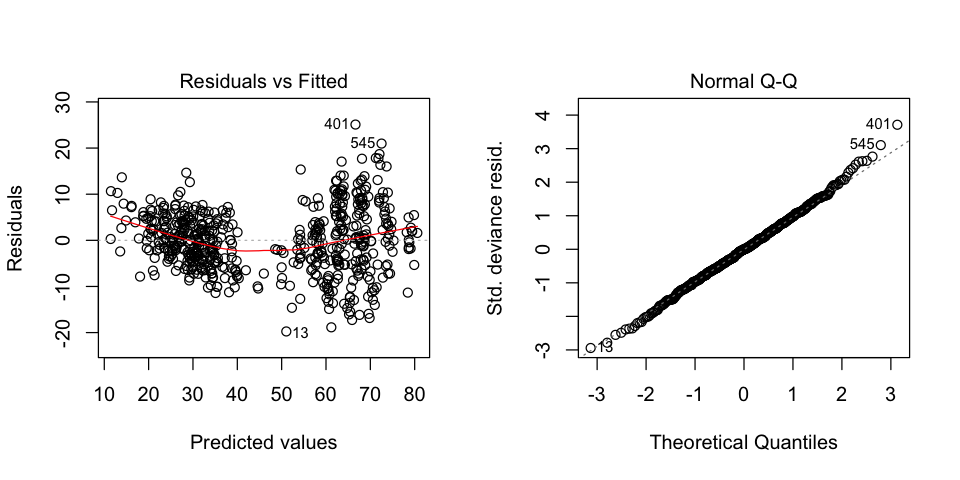

In [71]:
glm.r <- glm(Energy ~., data=train_reg)

options(repr.plot.width = 8, repr.plot.height = 4) 
par(mfrow=c(1,2))
plot(glm.r, which=1:2)

***Commentaires :***
Le graphe précédent nous permet de visualiser si les hypothèses de linéarité et d'homoscédasticité du modèle.

Les résidus sont centrés mais il semble y avoir une dépendance entre la valeur prédite et l'erreur (quand valeur prédite élevée : erreur forte); graphe en forme de banane.

In [72]:
summary(glm.r)


Call:
glm(formula = Energy ~ ., data = train_reg)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-19.7532   -4.4395   -0.0136    4.3383   25.0980  

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   70.053515  36.180392   1.936   0.0533 .  
Relative.compactness         -79.009915  19.600580  -4.031 6.32e-05 ***
Wall.area                     -0.001957   0.024338  -0.080   0.9359    
Roof.area                     -0.159609   0.066237  -2.410   0.0163 *  
Overall.height                 9.947805   0.785361  12.667  < 2e-16 ***
orientationNorth               0.633189   0.808964   0.783   0.4341    
orientationSouth               0.472117   0.805219   0.586   0.5579    
orientationWest                0.792894   0.824611   0.962   0.3367    
Glazing.area                  32.708252   2.453284  13.332  < 2e-16 ***
Glazing.area.distr55% North    6.525857   1.380748   4.726 2.89e-06 ***
Glazing.area.distr

**Résultats :**

In [73]:
glm.r.pred <- predict(glm.r, newdata=test_reg)

In [74]:
Tab_score_reg <- Compute_Error(glm.r.pred,quali = FALSE, name_model = "Naive Regression");Tab_score_reg

Table de contingende de Naive Regression : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 34  6  4  0  0  0  0
       B  7  9  6  1  0  0  0
       C  4 10 14  0  0  0  0
       D  0  1  1  6  1  0  0
       E  0  0  1 11 20 11  1
       F  0  0  0  5  8 16  9
       G  0  0  0  0  0  0  6


Modele           Score1   Score2     RMSE    
1 Naive Regression 0.546875 0.07142857 7.053735

## b) Regression Linéaire Pénalisée : 

#### i) Lasso 

**Mise en place du modèle :**

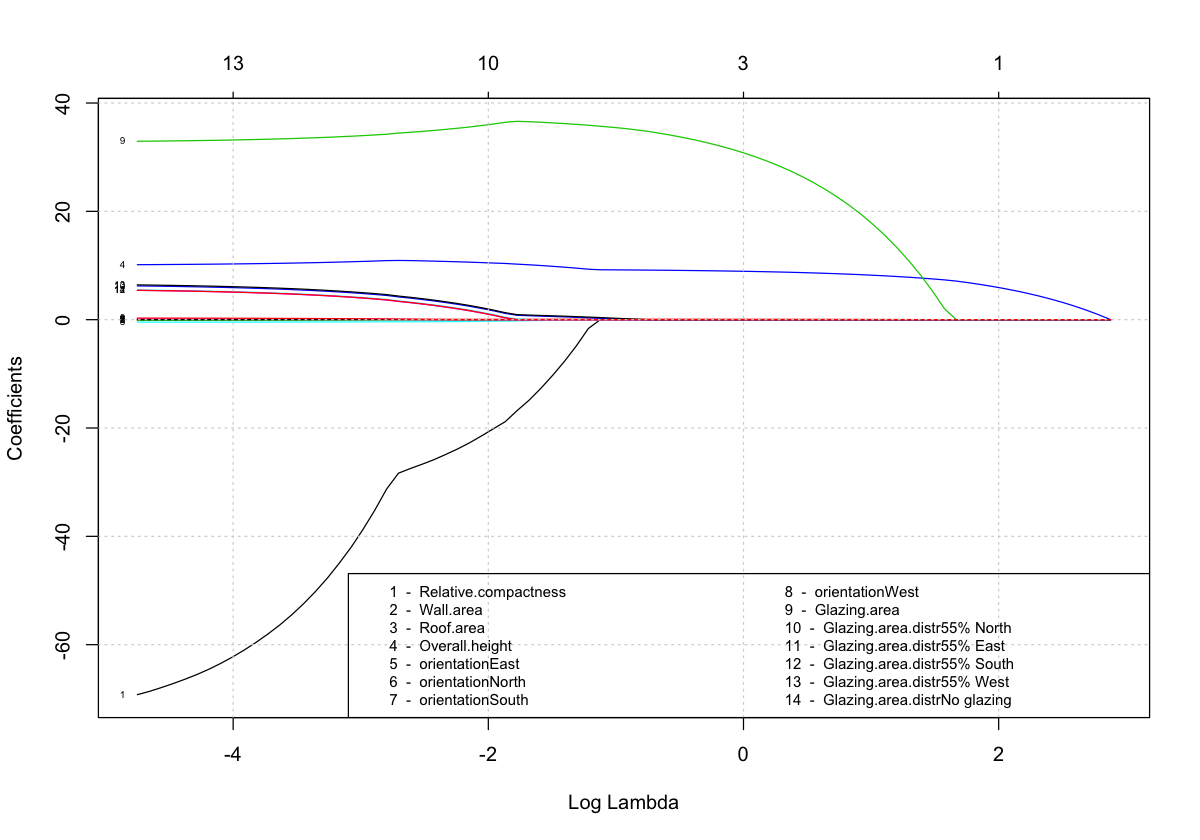

In [75]:
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle) 
x.mat.train <- model.matrix(Energy ~ . - 1, data = train_reg) #permet de gérer les variables catégorielles
lasso.r <- glmnet(y = y_train_reg, x = x.mat.train)
options(repr.plot.width = 10, repr.plot.height = 7)
plot(lasso.r, xvar = "lambda", label = TRUE)
grid()
legend("bottomright", 
       legend = paste(1:ncol(x.mat.train), " - ", colnames(x.mat.train)), ncol=2, cex=0.75)

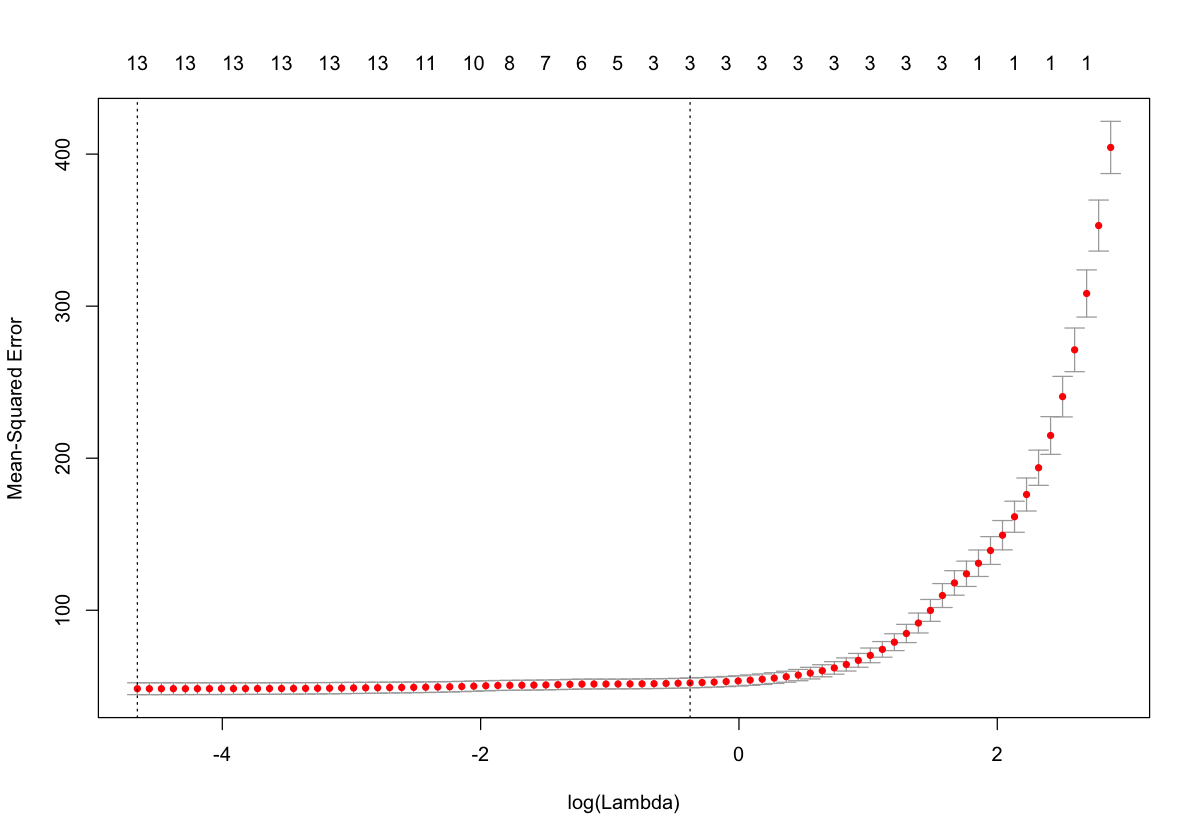

In [76]:
# choix du paramètre de régularisation par validation croisée
lasso.r.cv <- cv.glmnet(y = y_train_reg, x = x.mat.train)
plot(lasso.r.cv)

In [77]:
#Coefficients du modèle retenus par la pénalisation LASSO
coef(lasso.r.cv, s = "lambda.1se")

15 x 1 sparse Matrix of class "dgCMatrix"
                                        1
(Intercept)                  -33.44952970
Relative.compactness           .         
Wall.area                      0.07844157
Roof.area                      .         
Overall.height                 9.06476116
orientationEast                .         
orientationNorth               .         
orientationSouth               .         
orientationWest                .         
Glazing.area                  33.17005960
Glazing.area.distr55% North    .         
Glazing.area.distr55% East     .         
Glazing.area.distr55% South    .         
Glazing.area.distr55% West     .         
Glazing.area.distrNo glazing   .         

**Résultats :**

In [78]:
x.mat.test <- model.matrix(Energy ~ . - 1, data = test_reg)
lasso.r.cv.pred <- predict(lasso.r.cv, s = "lambda.1se", newx = x.mat.test) #valeur predite sur le jeu de train
#res.lasso <- datappr$O3obs - fit.lasso

In [79]:
Tab_score_reg <- Compute_Error(lasso.r.cv.pred,quali = FALSE, name_model = "Lasso penalisation");Tab_score_reg

Table de contingende de Lasso penalisation : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 30  5  5  0  0  0  0
       B 10 10  5  1  0  0  0
       C  5 10 13  0  0  0  0
       D  0  0  1  1  0  0  0
       E  0  1  2 19 20  9  2
       F  0  0  0  2  9 18  8
       G  0  0  0  0  0  0  6


Modele             Score1    Score2       RMSE    
1 Naive Regression   0.5468750  0.071428571 7.053735
2 Lasso penalisation 0.5104167 -0.008928571 7.365062

On arrive pas à rendre le modèle aussi bon que le modèle complet avec de la pénalisation LASSO (prise à 1 SE) on va donc étudier une autre méthode de pénalisation.

#### ii) Akaike Information Criterion (AIC) :  

**Mise en place du modèle :**

In [80]:
#Test sur le modèle sans les intéractions
glm.r <- glm(Energy~ ., data=train_reg)
glm.r.step <- step(glm.r, direction = "backward")
anova(glm.r.step, test='F')

Start:  AIC=3866.04
Energy ~ Relative.compactness + Wall.area + Roof.area + Overall.height + 
    orientation + Glazing.area + Glazing.area.distr

                       Df Deviance    AIC
- orientation           3    26367 3861.1
- Wall.area             1    26319 3864.0
<none>                       26318 3866.0
- Roof.area             1    26590 3870.0
- Relative.compactness  1    27079 3880.5
- Glazing.area.distr    5    27519 3881.7
- Overall.height        1    33832 4008.7
- Glazing.area          1    34643 4022.3

Step:  AIC=3861.11
Energy ~ Relative.compactness + Wall.area + Roof.area + Overall.height + 
    Glazing.area + Glazing.area.distr

                       Df Deviance    AIC
- Wall.area             1    26368 3859.1
<none>                       26367 3861.1
- Roof.area             1    26634 3864.9
- Relative.compactness  1    27128 3875.5
- Glazing.area.distr    5    27563 3876.7
- Overall.height        1    33935 4004.4
- Glazing.area          1    34725 4017.7

Step:

Df Deviance  Resid. Df Resid. Dev F          
NULL                 NA        NA 575       233397.06           NA
Relative.compactness  1 87754.364 574       145642.70  1883.719115
Roof.area             1 94202.957 573        51439.74  2022.143431
Overall.height        1  9665.730 572        41774.01   207.482791
Glazing.area          1 14208.596 571        27565.42   304.999129
Glazing.area.distr    5  1197.913 566        26367.50     5.142835
                     Pr(>F)       
NULL                            NA
Relative.compactness 3.230728e-182
Roof.area            5.624243e-189
Overall.height        2.657831e-40
Glazing.area          5.940557e-55
Glazing.area.distr    1.267108e-04

**Résultats :**

In [81]:
glm.r.step.pred <- predict(glm.r.step, newdata=test_reg)
Tab_score_reg <- Compute_Error(glm.r.step.pred,quali = FALSE, name_model = "AIC penalisation");Tab_score_reg

Table de contingende de AIC penalisation : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 33  5  5  0  0  0  0
       B  8 10  5  1  0  0  0
       C  4 10 14  0  0  0  0
       D  0  1  1  6  1  0  0
       E  0  0  1 11 21 11  1
       F  0  0  0  5  7 16  9
       G  0  0  0  0  0  0  6


Modele             Score1    Score2       RMSE    
1 Naive Regression   0.5468750  0.071428571 7.053735
2 Lasso penalisation 0.5104167 -0.008928571 7.365062
3 AIC penalisation   0.5520833  0.071428571 7.067490

**Mise en place du modèle 2 :**

Pour appliquer la méthode qui va minimiser le critère AIC (penalise les modèles avec beaucoup de variables) on part d'un modèle avec les intéractions du second ordre (modèle quadratique) puis on réalise la pénalisation au sens d'Akaike de façon descendante et on étudie les résultats.

In [82]:
glm.2.r <- glm(Energy~ .^2, data=train_reg)
# du critère d'Akaïke par méthode descendante
glm.2.r.step <- step(glm.2.r, direction = "backward")

Start:  AIC=3765.77
Energy ~ (Relative.compactness + Wall.area + Roof.area + Overall.height + 
    orientation + Glazing.area + Glazing.area.distr)^2

                                          Df Deviance    AIC
- orientation:Glazing.area.distr          15    18167 3752.5
- Roof.area:Glazing.area.distr             5    17681 3756.9
- Relative.compactness:Glazing.area.distr  5    17687 3757.1
- Wall.area:Glazing.area.distr             5    17693 3757.3
- Overall.height:Glazing.area.distr        5    17700 3757.5
- Glazing.area:Glazing.area.distr          5    17797 3760.7
- Relative.compactness:orientation         3    17710 3761.9
- Wall.area:orientation                    3    17718 3762.1
- Roof.area:orientation                    3    17754 3763.3
- orientation:Glazing.area                 3    17764 3763.6
- Wall.area:Glazing.area                   1    17646 3763.8
- Overall.height:Glazing.area              1    17647 3763.8
- Relative.compactness:Glazing.area        1    17647 37

In [83]:
#On réalise un test de fischer sur le résultat pour confirmer que toutes les variables retenues sont bien significatives
anova(glm.2.r.step, test='F')

Df Deviance    Resid. Df Resid. Dev
NULL                                NA          NA 575       233397.06 
Relative.compactness                 1 87754.36370 574       145642.70 
Wall.area                            1 77073.82466 573        68568.87 
Roof.area                            1 19656.39765 572        48912.48 
Overall.height                       1  7175.69269 571        41736.78 
orientation                          3    86.14291 568        41650.64 
Glazing.area                         1 14131.41358 567        27519.23 
Glazing.area.distr                   5  1200.81364 562        26318.41 
Relative.compactness:Roof.area       1   271.41253 561        26047.00 
Relative.compactness:Overall.height  1  1842.78832 560        24204.21 
Relative.compactness:Glazing.area    1  1604.47116 559        22599.74 
Wall.area:Roof.area                  1   122.73102 558        22477.01 
Wall.area:Overall.height             1  2163.59480 557        20313.42 
Wall.area:Glazing.area               1   283.47811 556        20029.94 
Roof.area:Overall.height             1   524.91194 555        19505.03 
Overall.height:orientation           3   227.83755 552        19277.19 
Overall.height:Glazing.area.distr    5   418.99992 547        18858.19 
                                    F            Pr(>F)       
NULL                                          NA            NA
Relative.compactness                2545.4002429 6.584276e-208
Wall.area                           2235.6008722 2.302984e-195
Roof.area                            570.1528362  7.224248e-87
Overall.height                       208.1379109  3.235031e-40
orientation                            0.8328862  4.761510e-01
Glazing.area                         409.8953265  1.944937e-68
Glazing.area.distr                     6.9661524  2.540210e-06
Relative.compactness:Roof.area         7.8725832  5.197701e-03
Relative.compactness:Overall.height   53.4518586  9.462443e-13
Relative.compactness:Glazing.area     46.5392388  2.386869e-11
Wall.area:Roof.area                    3.5599321  5.971949e-02
Wall.area:Overall.height              62.7571609  1.315140e-14
Wall.area:Glazing.area                 8.2225569  4.296816e-03
Roof.area:Overall.height              15.2255789  1.072925e-04
Overall.height:orientation             2.2028829  8.674964e-02
Overall.height:Glazing.area.distr      2.4306996  3.406448e-02

**Résultats :**

In [84]:
glm.2.r.step.pred <- predict(glm.2.r.step, newdata=test_reg)

In [85]:
Tab_score_reg <- Compute_Error(glm.2.r.step.pred,quali = FALSE, name_model = "AIC penalisation quadra");Tab_score_reg

Table de contingende de AIC penalisation quadra : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 35  7  5  0  0  0  0
       B  7 16 13  1  0  0  0
       C  3  2  6  1  0  0  0
       D  0  1  1  8  2  0  0
       E  0  0  1  8 16 13  0
       F  0  0  0  5 11 13  4
       G  0  0  0  0  0  1 12


Modele                  Score1    Score2       RMSE    
1 Naive Regression        0.5468750  0.071428571 7.053735
2 Lasso penalisation      0.5104167 -0.008928571 7.365062
3 AIC penalisation        0.5520833  0.071428571 7.067490
4 AIC penalisation quadra 0.5520833  0.089285714 6.534417

### c) Optimal Tree :  

**Mise en place du modèle :**

In [86]:
options(repr.plot.width = 15, repr.plot.height = 10)
tree.r=rpart(Energy~.,data=train_reg,control=rpart.control(cp=0.001))

cp opti : 0.001067266

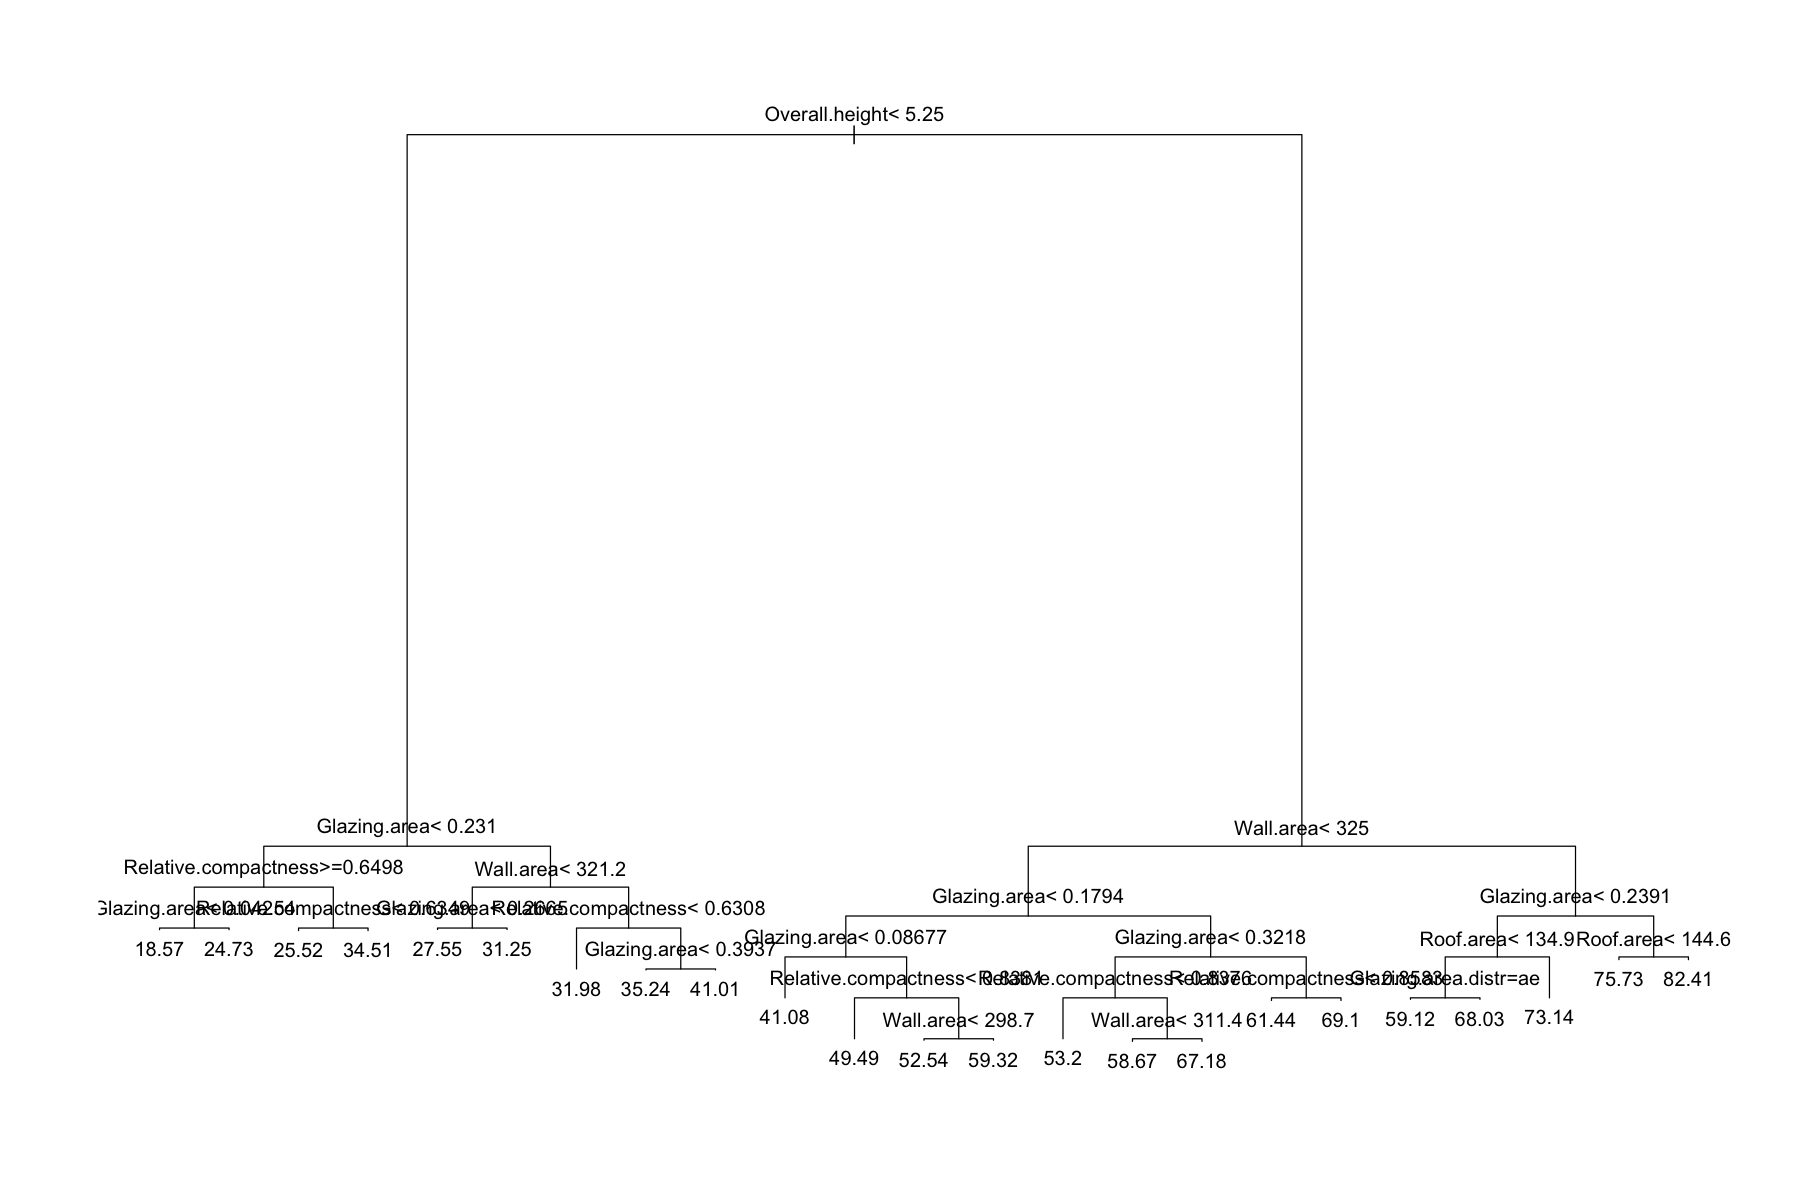

In [87]:
xmat=xpred.rpart(tree.r, xval = 10)
#levels(datappr[,"Survived"]) <- c(1,2)
xerr <- (xmat-as.numeric(y_train_reg))^2
CVerr=apply(xerr,2,sum)
#CVerr  #    CP           erreur
cp_opti = as.numeric(attributes(which.min(CVerr))$names); 

cat('cp opti :', cp_opti)

tree.opti.r=rpart(Energy~.,data=train_reg,control=rpart.control(cp=cp_opti))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(tree.opti.r)
text(tree.opti.r)

**Résultats :**

In [88]:
tree.opti.r.pred <- predict(tree.opti.r, newdata = test_reg)
Tab_score_reg <- Compute_Error(tree.opti.r.pred,quali = FALSE, name_model = "Tree Opti");Tab_score_reg


Table de contingende de Tree Opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 33  5  2  0  0  0  0
       B 12 15 11  0  0  0  0
       C  0  6 12  3  1  0  0
       D  0  0  1 12  2  0  0
       E  0  0  0  8 19  7  0
       F  0  0  0  0  6 18  2
       G  0  0  0  0  1  2 14


Modele                  Score1    Score2       RMSE    
1 Naive Regression        0.5468750  0.071428571 7.053735
2 Lasso penalisation      0.5104167 -0.008928571 7.365062
3 AIC penalisation        0.5520833  0.071428571 7.067490
4 AIC penalisation quadra 0.5520833  0.089285714 6.534417
5 Tree Opti               0.6406250  0.348214286 5.433275

###  d) Random Forest :  

**Mise en place du modèle :**

In [89]:
set.seed(69)
rf.r <- randomForest(Energy ~ ., data = train_reg, 
                       xtest = x_test_reg, ytest = y_test_reg,
                       ntree = 500,do.trace = 50, importance = TRUE)



     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |    24.38     6.02 |    21.44     5.96 |
 100 |    23.18     5.72 |    21.07     5.86 |
 150 |    22.79     5.62 |    21.52     5.98 |
 200 |    22.58     5.57 |    21.64     6.02 |
 250 |    22.56     5.57 |    21.62     6.01 |
 300 |    22.35     5.52 |    21.34     5.93 |
 350 |    22.26     5.49 |    21.27     5.91 |
 400 |    22.19     5.48 |    21.29     5.92 |
 450 |    22.23     5.49 |    21.18     5.89 |
 500 |    22.19     5.48 |    21.25     5.91 |


**Résultats :**

In [90]:
rf.r.pred <- rf.r$test$predicted
Tab_score_reg <- Compute_Error(rf.r.pred,quali = FALSE, name_model = "Random Forest");Tab_score_reg

Table de contingende de Random Forest : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 33  7  1  0  0  0  0
       B 12 16 13  0  0  0  0
       C  0  3 11  2  0  0  0
       D  0  0  1 14  0  0  0
       E  0  0  0  7 26  9  0
       F  0  0  0  0  3 17  1
       G  0  0  0  0  0  1 15


Modele                  Score1    Score2       RMSE    
1 Naive Regression        0.5468750  0.071428571 7.053735
2 Lasso penalisation      0.5104167 -0.008928571 7.365062
3 AIC penalisation        0.5520833  0.071428571 7.067490
4 AIC penalisation quadra 0.5520833  0.089285714 6.534417
5 Tree Opti               0.6406250  0.348214286 5.433275
6 Random Forest           0.6875000  0.455357143 4.610049

**Mise en place du modèle optimisé :**

In [91]:
set.seed(69)
cvControl <- trainControl(method = "cv", number = 10)
mtryTrials <- train(train_reg, y_train_reg, method = "rf", tuneLength = 7,
               trControl = cvControl, trace = FALSE)
mtryTrials

Random Forest 

576 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 518, 518, 518, 519, 519, 517, ... 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  2     2.0720197  0.9901779  1.4566318
  3     1.4169308  0.9953309  0.9206298
  4     0.9680224  0.9977795  0.5746020
  5     0.6937482  0.9988367  0.3796017
  6     0.4814076  0.9994204  0.2441893
  7     0.3354750  0.9997045  0.1607323
  8     0.2651198  0.9998022  0.1188605

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 8.

In [92]:
set.seed(69)
rf.opti.r <- randomForest(Energy ~ ., data = train_reg, 
                       xtest = x_test_reg, ytest = y_test_reg,
                       ntree = 500,mtry=mtryTrials$bestTune$mtry,do.trace = 50, importance = TRUE)

Warning message in randomForest.default(m, y, ...):
“invalid mtry: reset to within valid range”

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |    24.02     5.93 |       23     6.40 |
 100 |    23.73     5.86 |    22.68     6.31 |
 150 |    23.15     5.71 |    22.63     6.29 |
 200 |    23.05     5.69 |    22.43     6.24 |
 250 |    22.87     5.64 |     22.5     6.26 |
 300 |    22.83     5.63 |    22.17     6.16 |
 350 |    22.77     5.62 |    22.03     6.13 |
 400 |    22.72     5.61 |    21.97     6.11 |
 450 |    22.77     5.62 |    22.04     6.13 |
 500 |    22.67     5.60 |    22.05     6.13 |


**Résultats :**

In [93]:
rf.opti.r.pred <- rf.opti.r$test$predicted
Tab_score_reg <- Compute_Error(rf.opti.r.pred,quali = FALSE, name_model = "Random Forest Opti");Tab_score_reg

Table de contingende de Random Forest Opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 35  7  1  0  0  0  0
       B 10 12  9  0  0  0  0
       C  0  7 15  2  0  0  0
       D  0  0  1 13  2  0  0
       E  0  0  0  8 21  7  0
       F  0  0  0  0  5 19  1
       G  0  0  0  0  1  1 15


Modele                  Score1    Score2       RMSE    
1 Naive Regression        0.5468750  0.071428571 7.053735
2 Lasso penalisation      0.5104167 -0.008928571 7.365062
3 AIC penalisation        0.5520833  0.071428571 7.067490
4 AIC penalisation quadra 0.5520833  0.089285714 6.534417
5 Tree Opti               0.6406250  0.348214286 5.433275
6 Random Forest           0.6875000  0.455357143 4.610049
7 Random Forest Opti      0.6770833  0.428571429 4.695429

### e) Boosting :  

**Mise en place du modèle :**

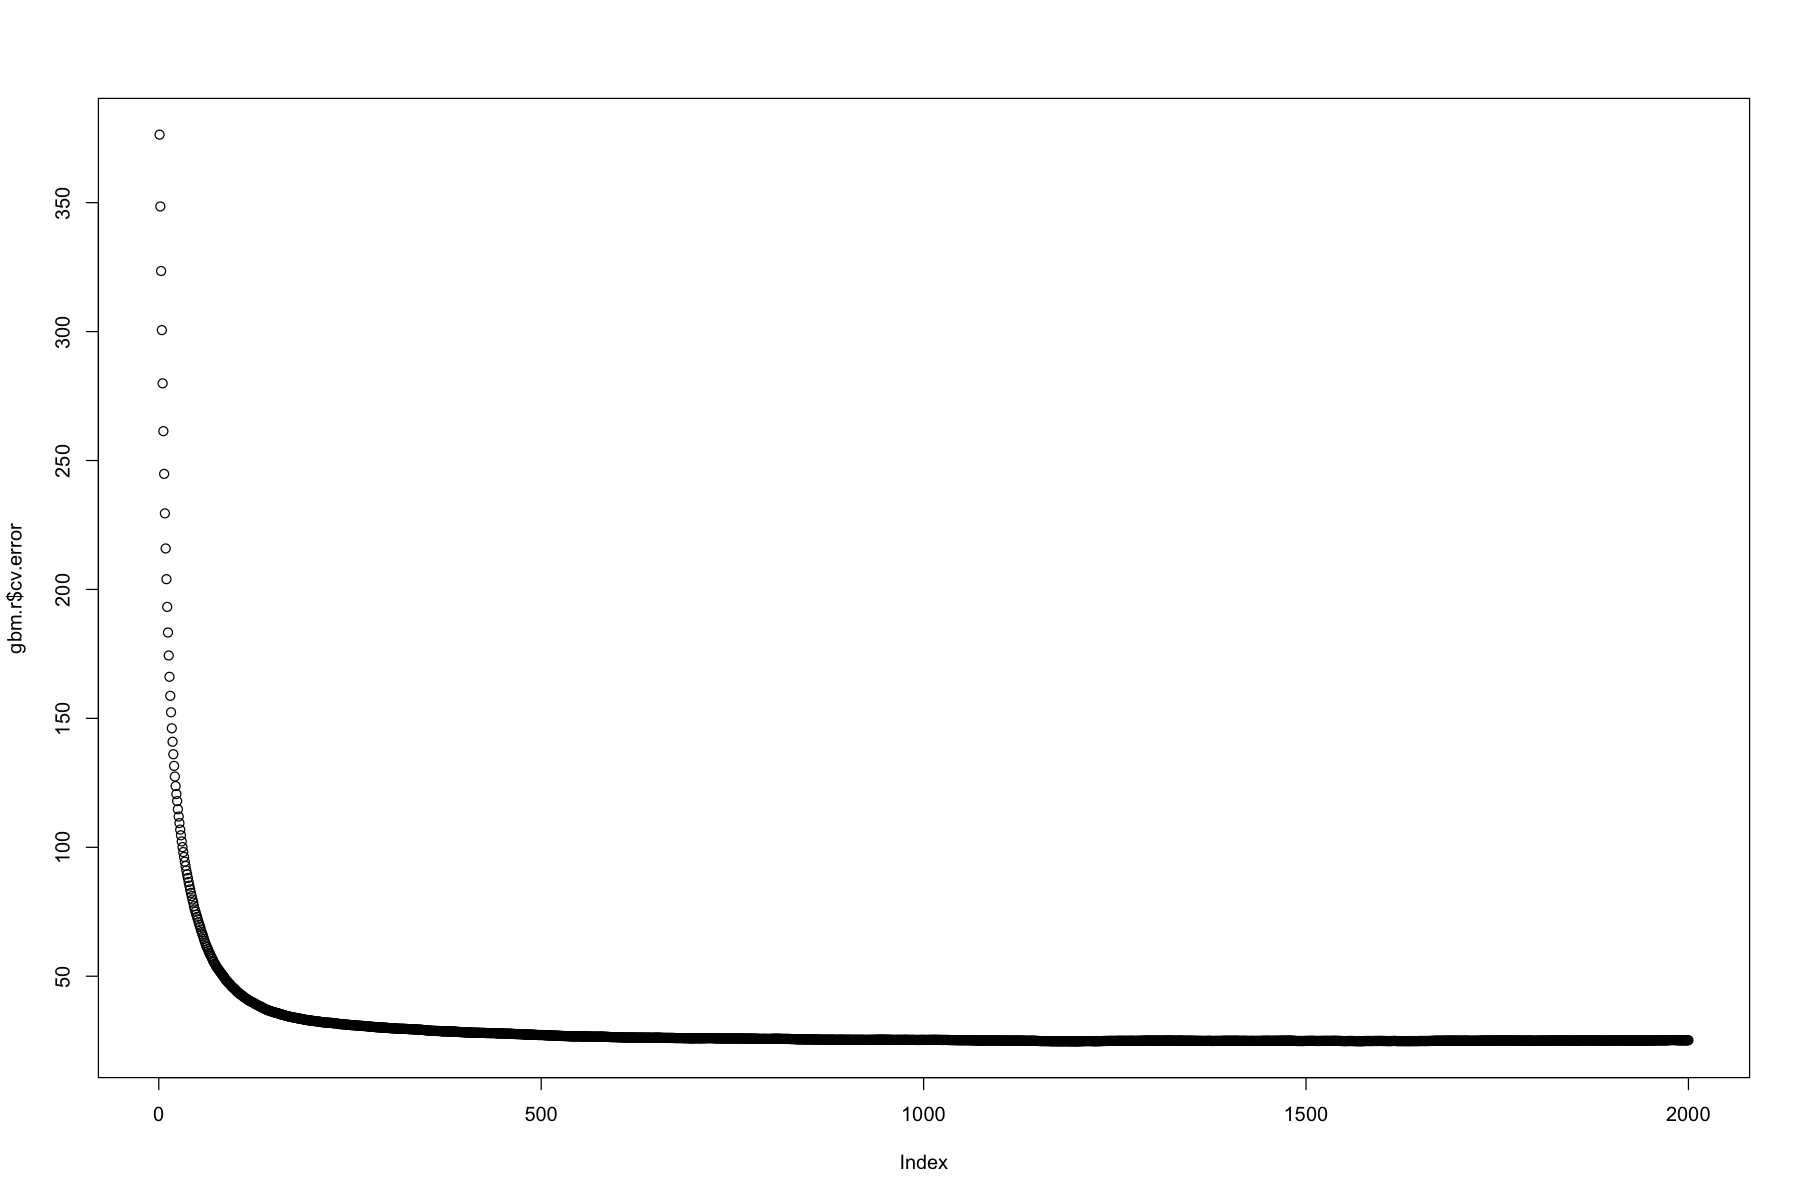

In [95]:
gbm.r=gbm(Energy~., data=train_reg,distribution="gaussian",n.trees=2000, cv.folds=10,
        n.minobsinnode = 5,shrinkage=0.05,verbose=FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(gbm.r$cv.error)

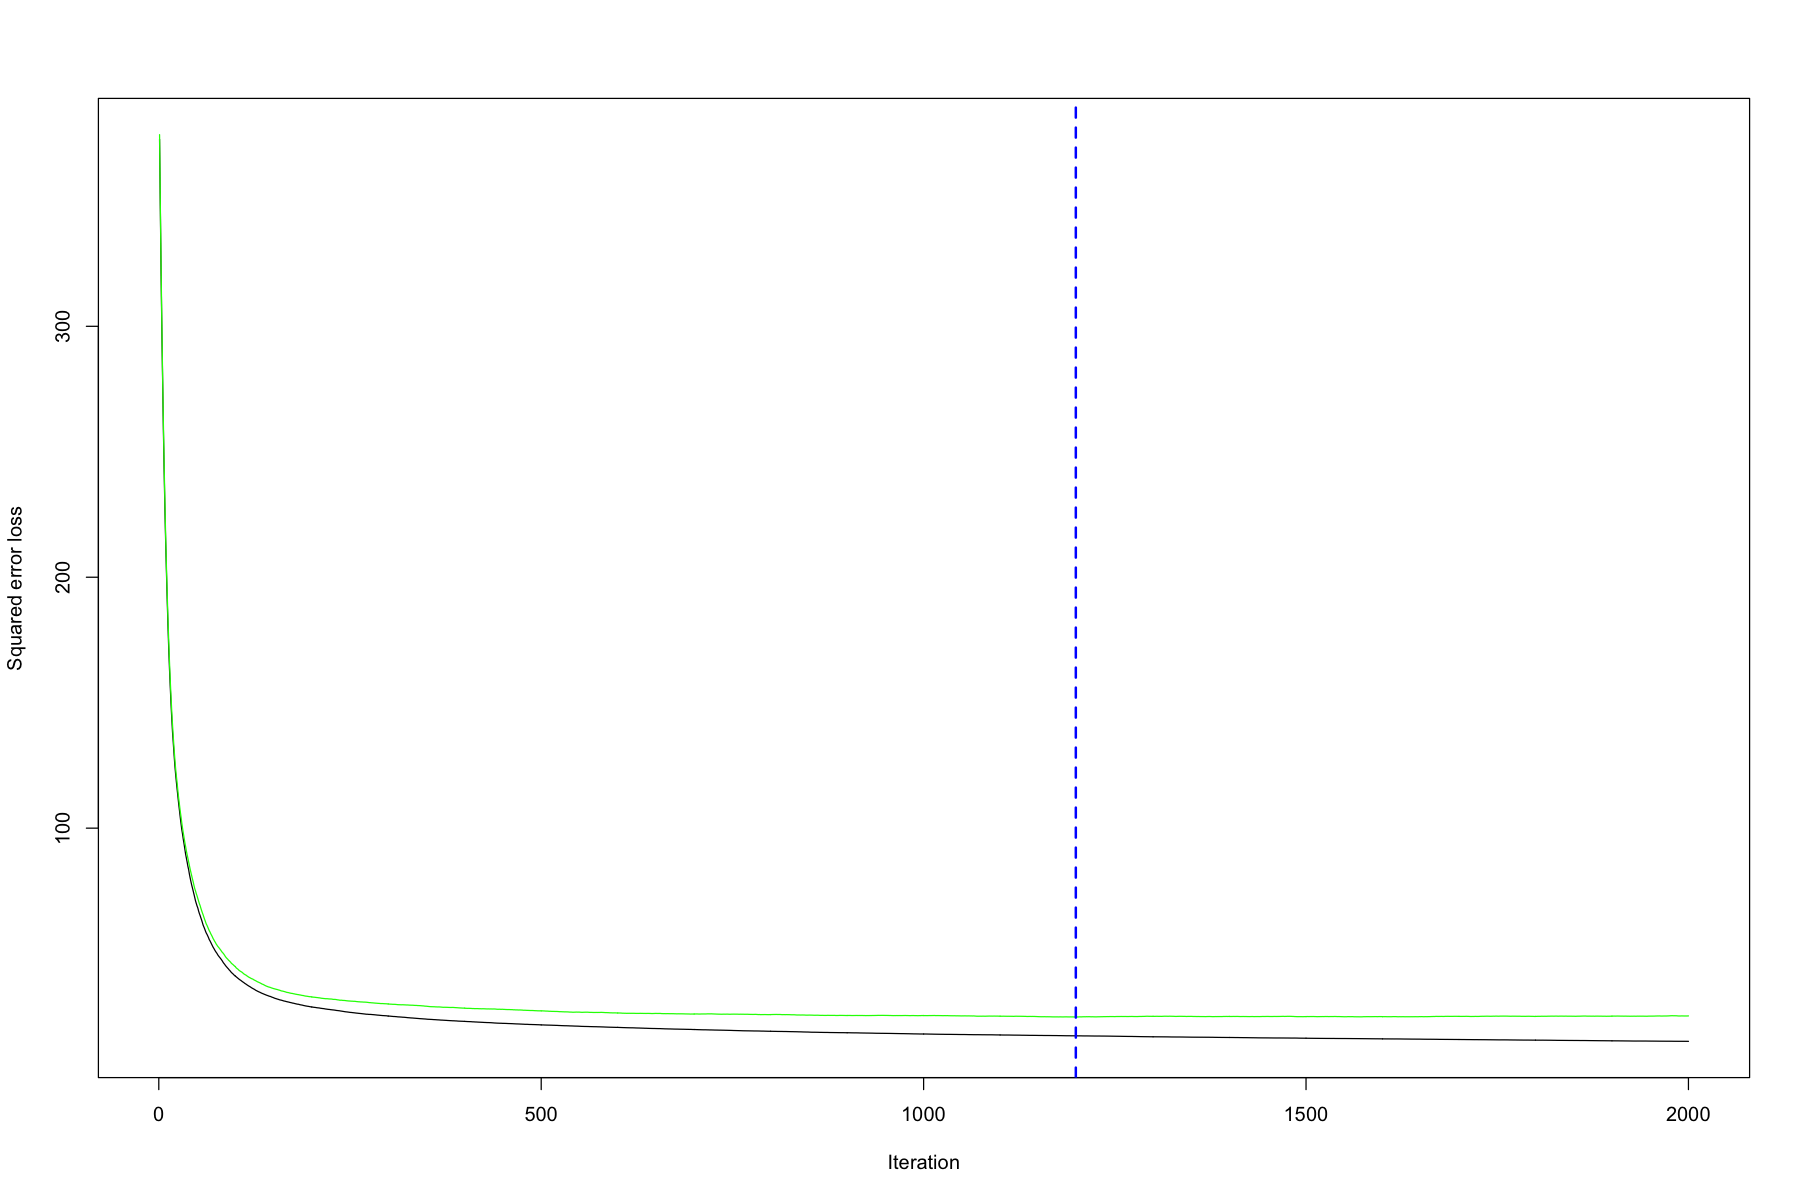

In [96]:
# nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(gbm.r,method="cv")

#noir : apprentissage
#vert : validation croisée

In [97]:
best.iter

[1] 1199

In [98]:
gbm.r.pred=predict(gbm.r,newdata=test_reg,n.trees=best.iter)

Tab_score_reg <- Compute_Error(gbm.r.pred,quali = FALSE, name_model = "GBM Naive");Tab_score_reg



Table de contingende de GBM Naive : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 33  5  1  0  0  0  0
       B 10 13 11  0  0  0  0
       C  2  7 10  2  0  0  0
       D  0  1  4 10  0  0  0
       E  0  0  0 11 26 11  0
       F  0  0  0  0  3 15  4
       G  0  0  0  0  0  1 12


Modele                  Score1    Score2       RMSE    
1 Naive Regression        0.5468750  0.071428571 7.053735
2 Lasso penalisation      0.5104167 -0.008928571 7.365062
3 AIC penalisation        0.5520833  0.071428571 7.067490
4 AIC penalisation quadra 0.5520833  0.089285714 6.534417
5 Tree Opti               0.6406250  0.348214286 5.433275
6 Random Forest           0.6875000  0.455357143 4.610049
7 Random Forest Opti      0.6770833  0.428571429 4.695429
8 GBM Naive               0.6197917  0.312500000 5.294499

**Mise en place du modèle optimisé:**

In [99]:
#faire varier : n_tree, shrinkage=learning_rate, interaction_depth=profondeur des arbres

In [100]:
cvControlRandom = trainControl(method = "cv", number = 10, search='random')
gbm.tune.r = train(x_train_reg, y_train_reg, method='gbm', tuneLength=4, trControl=cvControlRandom)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1      395.6988             nan     0.0140   10.2935
     2      385.7313             nan     0.0140    9.3348
     3      375.7368             nan     0.0140    9.3660
     4      366.0844             nan     0.0140    8.6160
     5      356.6347             nan     0.0140    8.3705
     6      347.7284             nan     0.0140    9.5976
     7      338.8512             nan     0.0140    8.8233
     8      330.4524             nan     0.0140    8.1019
     9      322.3593             nan     0.0140    8.1321
    10      314.2589             nan     0.0140    7.6144
    20      245.1043             nan     0.0140    6.5167
    40      152.3515             nan     0.0140    3.3705
    60       98.6712             nan     0.0140    2.0290
    80       67.1320             nan     0.0140    1.2242
   100       48.0179             nan     0.0140    0.6375
   120       36.6603             nan     0.0140    0.4100
   140       2

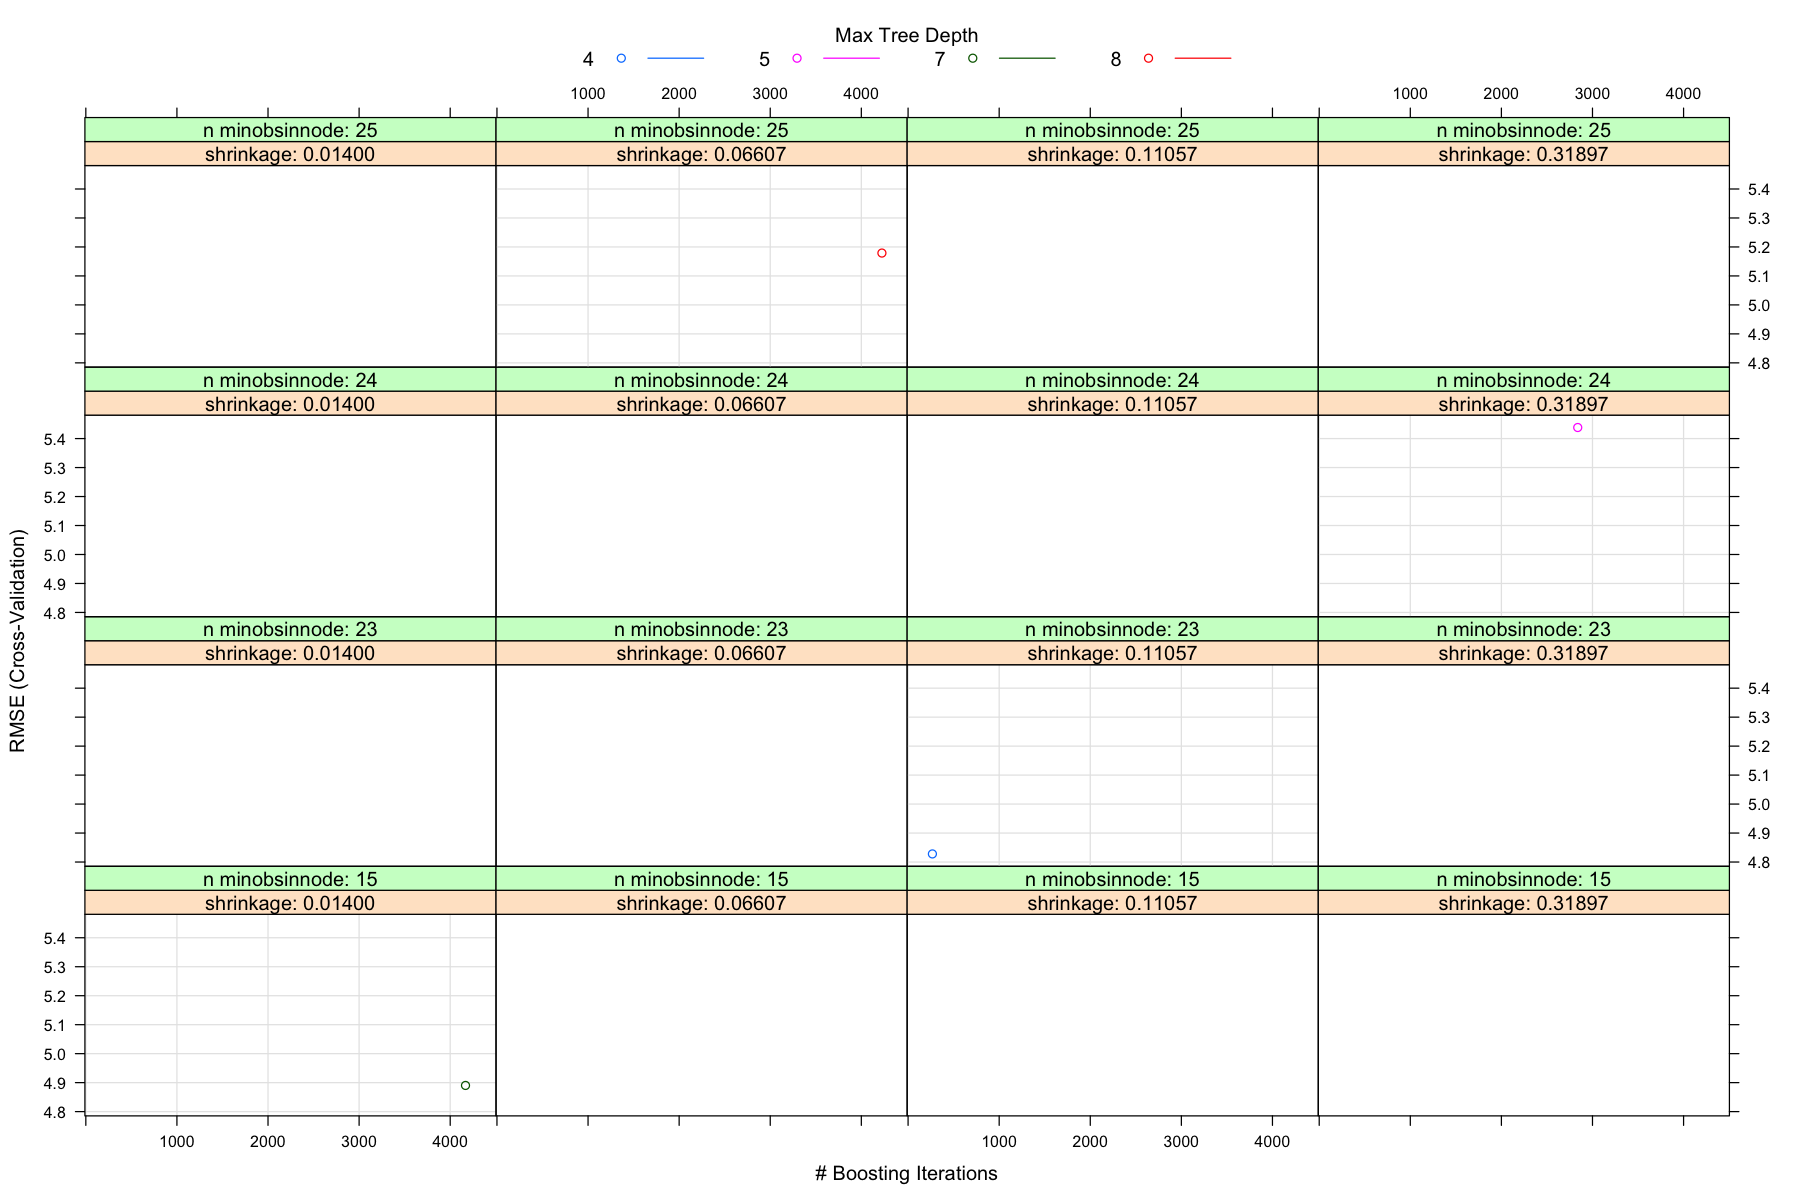

In [101]:
plot(gbm.tune.r)

In [102]:
gbm.tune.r

Stochastic Gradient Boosting 

576 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 518, 520, 519, 519, 518, 516, ... 
Resampling results across tuning parameters:

  shrinkage   interaction.depth  n.minobsinnode  n.trees  RMSE      Rsquared 
  0.01399622  7                  15              4168     4.890305  0.9423410
  0.06607032  8                  25              4226     5.178945  0.9355497
  0.11056815  4                  23               267     4.827975  0.9432121
  0.31897127  5                  24              2838     5.438198  0.9290995
  MAE     
  3.931543
  4.145009
  3.838199
  4.357441

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were n.trees = 267, interaction.depth =
 4, shrinkage = 0.1105682 and n.minobsinnode = 23.

**Résultats :**

In [103]:
gbm.tune.r.pred = predict(gbm.tune.r, newdata = x_test_reg)

In [104]:
Tab_score_reg <- Compute_Error(gbm.tune.r.pred, quali = FALSE, 
                               name_model = "GBM Opti");Tab_score_reg

Table de contingende de GBM Opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 33 11  1  0  0  0  0
       B 10  7 12  0  0  0  0
       C  2  8 12  3  0  0  0
       D  0  0  1 12  1  0  0
       E  0  0  0  7 22  8  0
       F  0  0  0  1  5 17  3
       G  0  0  0  0  1  2 13


Modele                  Score1    Score2       RMSE    
1 Naive Regression        0.5468750  0.071428571 7.053735
2 Lasso penalisation      0.5104167 -0.008928571 7.365062
3 AIC penalisation        0.5520833  0.071428571 7.067490
4 AIC penalisation quadra 0.5520833  0.089285714 6.534417
5 Tree Opti               0.6406250  0.348214286 5.433275
6 Random Forest           0.6875000  0.455357143 4.610049
7 Random Forest Opti      0.6770833  0.428571429 4.695429
8 GBM Naive               0.6197917  0.312500000 5.294499
9 GBM Opti                0.6041667  0.276785714 5.072625

### f) SVM : 

**Mise en place du modèle optimisé:**

In [105]:
svm.tune.r = tune.svm(Energy~.,data=train_reg,cost=c(1,1.25,1.5,1.75,2), gamma = seq(0.1, 2, by = 0.2))
#plot(svm.tune.r)

**Résultats :**

In [106]:
svm.opti.r.pred=predict(svm.tune.r$best.model,newdata=test_reg)
Tab_score_reg <- Compute_Error(svm.opti.r.pred,quali = FALSE, name_model = "SVM Opti");Tab_score_reg

Table de contingende de SVM Opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 31  8  6  0  0  0  0
       B 10 14 10  0  0  0  0
       C  4  3  8  2  0  0  0
       D  0  1  2  8  7  2  0
       E  0  0  0 11 12 15  0
       F  0  0  0  2 10  8  7
       G  0  0  0  0  0  2  9


Modele                  Score1    Score2       RMSE    
1  Naive Regression        0.5468750  0.071428571 7.053735
2  Lasso penalisation      0.5104167 -0.008928571 7.365062
3  AIC penalisation        0.5520833  0.071428571 7.067490
4  AIC penalisation quadra 0.5520833  0.089285714 6.534417
5  Tree Opti               0.6406250  0.348214286 5.433275
6  Random Forest           0.6875000  0.455357143 4.610049
7  Random Forest Opti      0.6770833  0.428571429 4.695429
8  GBM Naive               0.6197917  0.312500000 5.294499
9  GBM Opti                0.6041667  0.276785714 5.072625
10 SVM Opti                0.4687500 -0.044642857 6.883614

### Bilan sur la regression : 

In [107]:
cat("Bilan des scores en passant par la Regression  : \n " )
Tab_score_reg

Bilan des scores en passant par la Regression  : 
 

Modele                  Score1    Score2       RMSE    
1  Naive Regression        0.5468750  0.071428571 7.053735
2  Lasso penalisation      0.5104167 -0.008928571 7.365062
3  AIC penalisation        0.5520833  0.071428571 7.067490
4  AIC penalisation quadra 0.5520833  0.089285714 6.534417
5  Tree Opti               0.6406250  0.348214286 5.433275
6  Random Forest           0.6875000  0.455357143 4.610049
7  Random Forest Opti      0.6770833  0.428571429 4.695429
8  GBM Naive               0.6197917  0.312500000 5.294499
9  GBM Opti                0.6041667  0.276785714 5.072625
10 SVM Opti                0.4687500 -0.044642857 6.883614

In [108]:
#notes : approfondir avec best glm

# Classification hiérarchique : 

Nous avons vu de part le clustering et l'ACP, deux classes se distinguaient bien (ABC vs DEFG) nous allons donc mettre en place une classification hiérarchique :

**Première Etape :**  Mise en place d'un modèle de prédiction binaire : Bonne ou mauvaise Conso ? 

In [109]:
#On fait une nouvelle data_frame relabellisée : 
x_bin = x

In [110]:
Conso = ifelse(x$Energy<=45,"Faible","Forte") 
x_bin = cbind(x_bin,Conso)
x_bin$Conso <- factor(x_bin$Conso)

In [111]:
head(x_bin)

Relative.compactness Wall.area Roof.area Overall.height orientation
1 0.9829276            306.4846  112.0027  7              North      
2 0.9835473            299.7763  110.0480  7              East       
3 0.9794535            303.3744  106.4084  7              South      
4 0.9777325            292.8122  113.0559  7              West       
5 0.9030294            316.2361  118.3664  7              North      
6 0.8909102            314.9162  121.8437  7              East       
  Glazing.area Glazing.area.distr Energy   Energy.efficiency Conso 
1 1.609490e-02 Uniform            34.26394 B                 Faible
2 2.294522e-02 Uniform            34.58975 B                 Faible
3 2.414785e-02 Uniform            38.77805 C                 Faible
4 9.554434e-06 Uniform            37.94781 C                 Faible
5 2.912889e-02 Uniform            47.67586 D                 Forte 
6 2.601517e-02 Uniform            41.90847 C                 Faible

In [112]:
train_bin <- x_bin[train_ind, ]
test_bin <- x_bin[-train_ind, ]


train_bin <- dplyr::select(train_bin, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Conso)
test_bin <- dplyr::select(test_bin, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Conso)

In [113]:
prems <- glm(Conso ~., data=train_bin, family = binomial(link = "logit"))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [114]:
res.fit <- predict(prems, newdata = test_bin, type="response")

In [115]:
t1=table(res.fit>0.5,test_bin$Conso);t1
score = sum(diag(t1)/sum(t1))
print(score)

       
        Faible Forte
  FALSE     94     2
  TRUE       3    93

[1] 0.9739583


In [116]:
train_bin <- x_bin[train_ind, ]
train_bin_Forte <-train_bin[which(train_bin$Conso=='Forte'),]
train_bin_Faible <-train_bin[which(train_bin$Conso=='Faible'),]

train_bin_Forte <- dplyr::select(train_bin_Forte, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Energy.efficiency)
train_bin_Faible <- dplyr::select(train_bin_Faible, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Energy.efficiency)

test_bin <- x_bin[-train_ind, ]
test_bin_Forte <-test_bin[which(res.fit > 0.5),]
test_bin_Faible <-test_bin[which(res.fit < 0.5),]

test_bin_Forte <- dplyr::select(test_bin_Forte, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Energy.efficiency)
test_bin_Faible <- dplyr::select(test_bin_Faible, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Energy.efficiency)





## Modèle Forte

In [117]:
x_train_bin_Forte <- dplyr::select(train_bin_Forte, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr)
y_train_bin_Forte<-train_bin_Forte$Energy.efficiency

x_test_bin_Forte <- dplyr::select(test_bin_Forte, Relative.compactness, Wall.area,Roof.area,Overall.height,orientation, Glazing.area,Glazing.area.distr)
y_test_bin_Forte<-test_bin_Forte$Energy.efficiency

In [118]:
y_test_bin_Forte

[1] C B E D D F E C F F E F E F D D E D E D D E F F F D E E E D G F D E D D D F
[39] E D E F G E F E G D F F F F E D E D G D E E F D E G F E F F G F D G G G E F
[77] G E F F G G F E E D E F F E E E G G G G
Levels: A < B < C < D < E < F < G

In [119]:
cvControl <- trainControl(method = "cv", number = 10)
mtryTrials <- train(x_train_bin_Forte, y_train_bin_Forte, method = "rf", tuneLength = 6,
               trControl = cvControl, trace = FALSE)

rf.c.opti <- randomForest(Energy.efficiency ~ ., data = train_class, 
                       xtest = x_test_class, ytest = y_test_class,
                       ntree = 500,mtry=mtryTrials$bestTune$mtry,do.trace = 50, importance = TRUE)

ERROR: Error: One or more factor levels in the outcome has no data: 'A', 'B', 'C'


In [ ]:
x_train_bin_Forte

In [ ]:
set.seed(69)
cvControl <- trainControl(method = "cv", number = 10)
mtryTrials <- train(x_train_bin_Forte, y_train_bin_Forte, method = "rf", tuneLength = 6,
               trControl = cvControl, trace = FALSE)



In [ ]:

rf.opti.forte <- randomForest(Energy.efficiency ~ ., data = train_bin_Forte, 
                       xtest = x_test_bin_Forte, ytest = y_test_bin_Forte,
                       ntree = 500,mtry=mtryTrials$bestTune$mtry,do.trace = 50, importance = TRUE)
rf.opti.forte.pred <- rf.opti.forte$test$predicted
Compute_Error(rf.opti.forte.pred,quali = True, name_model = "Random Forest Opti");

In [ ]:
#x_test_bin[which(res.fit > 0.5),]

In [ ]:
#Reste à faire :  
# 1 - Faire un modele pour predire ABC (choper la dataframe à partir des faibles consos de x_bin)
# 2 - Faire un modele pour predire DEFG (choper la dataframe à partir des fortes consos de x_bin)
# 3 - à partir des res.fit > 0.5 (ie: forte conso): appliquer le modèle 2
#     à partir des res.fit < 0.5 (ie: faible conso): appliquer le modèle 1
# 4 - On va obtenir 2 data_frame, les merge 
#(il faudra sans doute lors d'une etape precedente garder en memoire des indices pour pouvoir la reformer)
#faire la table de contingence
#Conclure

#Assembling